

# __<center>Ridershare Uber and Lyft</center>__

# Latar Belakang
Uber dan Lyft telah mengubah perjalanan menjadi lebih nyaman dan aman, khususnya bagi mereka yang tidak memiliki kendaraan pribadi. Pengguna reguler dari layanan ini sering menghadapi fluktuasi harga yang tidak terduga untuk rute dan tujuan tertentu. Pengembangan model bertujuan dapat memprediksi tarif dengan akurat akan membantu konsumen dalam membuat pilihan terbaik untuk perjalanan mereka.

# Gambaran Dataset
Dataset yang dapat dibuat dari permasalahan yang dialami 2 perusahaan transportasi online. Data ini mencakup beberapa fitur yang relevan untuk memprediksi tarif perjalanan Uber dan Lyft. Dataset semacam ini akan memungkinkan untuk pengembangan model prediksi tarif yang akurat untuk membantu konsumen dalam membuat keputusan terbaik untuk perjalanan mereka. 

# Objective
* Program ini dibuat untuk memprediksi harga perjalanan platform ride-hailing berdasarkan korelasi antar variabel untuk menentukan faktor apa yang mempengaruhi harga kemudian membangun model LinearRegression untuk memperoleh output harga perjalanan berdasarkan faktor-faktor tersebut
* Merumuskan prediksi tarif model bagi perusahaan ride-hailing Uber dan Lyft di Wilayah America/Newyork. Mengembangkan beberapa model regresi linier untuk kedua perusahaan tersebut, sambil membandingkan perbedaan dalam strategi penetapan harga mereka.
---


### **Sumber Data**
- [Klik disini (Kaggle)](https://www.kaggle.com/datasets/brllrb/uber-and-lyft-dataset-boston-ma) 


### **Daftar Konten**

1. Data Loading
2. Exploratory Data Analysis 
3. Feature Engineering
4. Model Definition
5. Model Training
6. Model Evaluation
7. Model Saving
8. Model Inference
9. Kesimpulan

# Import Library

In [1]:
# Modul untuk EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from feature_engine.outliers import Winsorizer

# Modul feature engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr, spearmanr, kendalltau

# Modul untuk modelling
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.stattools import durbin_watson

# Modul penyimpanan model
import pickle
import json

# 1. Data Loading

In [2]:
# Menampilkan dataset 
Dataset = pd.read_csv('rideshare_kaggle.csv')
display(Dataset.head(),Dataset.tail())

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

id     timestamp  hour  day  month  \
693066  616d3611-1820-450a-9845-a9ff304a4842  1.543708e+09    23    1     12   
693067  633a3fc3-1f86-4b9e-9d48-2b7132112341  1.543708e+09    23    1     12   
693068  64d451d0-639f-47a4-9b7c-6fd92fbd264f  1.543708e+09    23    1     12   
693069  727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e  1.543708e+09    23    1     12   
693070  e7fdc087-fe86-40a5-a3c3-3b2a8badcbda  1.543708e+09    23    1     12   

                   datetime          timezone    source destination cab_type  \
693066  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693067  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693068  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693069  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   
693070  2018-12-01 23:53:05  America/New_York  West End   North End     Uber   

        ... precipIntensityMax uvIndexTime  temperatureMin  \
693066  ...                0.0  1543683600           31.42   
693067  ...                0.0  1543683600           31.42   
693068  ...                0.0  1543683600           31.42   
693069  ...                0.0  1543683600           31.42   
693070  ...                0.0  1543683600           31.42   

        temperatureMinTime  temperatureMax  temperatureMaxTime  \
693066          1543658400           44.76          1543690800   
693067          1543658400           44.76          1543690800   
693068          1543658400           44.76          1543690800   
693069          1543658400           44.76          1543690800   
693070          1543658400           44.76          1543690800   

        apparentTemperatureMin  apparentTemperatureMinTime  \
693066                   27.77                  1543658400   
693067                   27.77                  1543658400   
693068                   27.77                  1543658400   
693069                   27.77                  1543658400   
693070                   27.77                  1543658400   

        apparentTemperatureMax apparentTemperatureMaxTime  
693066                   44.09                 1543690800  
693067                   44.09                 1543690800  
693068                   44.09                 1543690800  
693069                   44.09                 1543690800  
693070                   44.09                 1543690800  

[5 rows x 57 columns]

In [3]:
# Melihat informasi kolomD
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 


-   Dataset terdiri dari 693070 baris dan 57 kolom.
-   Terdapat 29 fitur yang valuesnya bertipe float, 17 bertype integer dan 11 lainnya bertipe object.
-   Ada beberapa fitur tipe datanya tidak sesuai untuk kebutuhan analisa yang nanti akan dirubah tipe datanya sesuai kebutuhan analisa nantinya
-   Tidak terdapat missing values.

In [4]:
# Mengecek statistik sederhana dataset
Dataset.describe().T

count          mean            std  \
timestamp                    693071.0  1.544046e+09  689192.492586   
hour                         693071.0  1.161914e+01       6.948114   
day                          693071.0  1.779436e+01       9.982286   
month                        693071.0  1.158668e+01       0.492429   
price                        637976.0  1.654513e+01       9.324359   
distance                     693071.0  2.189430e+00       1.138937   
surge_multiplier             693071.0  1.013870e+00       0.091641   
latitude                     693071.0  4.233817e+01       0.047840   
longitude                    693071.0 -7.106615e+01       0.020302   
temperature                  693071.0  3.958439e+01       6.726084   
apparentTemperature          693071.0  3.588122e+01       7.918707   
precipIntensity              693071.0  8.922153e-03       0.026901   
precipProbability            693071.0  1.460758e-01       0.328938   
humidity                     693071.0  7.411187e-01       0.138595   
windSpeed                    693071.0  6.186253e+00       3.148223   
windGust                     693071.0  8.469860e+00       5.289179   
windGustTime                 693071.0  1.544049e+09  692824.402315   
visibility                   693071.0  8.467970e+00       2.602888   
temperatureHigh              693071.0  4.504098e+01       5.996541   
temperatureHighTime          693071.0  1.544050e+09  693792.107470   
temperatureLow               693071.0  3.415074e+01       6.383163   
temperatureLowTime           693071.0  1.544102e+09  692292.331984   
apparentTemperatureHigh      693071.0  4.161405e+01       7.666138   
apparentTemperatureHighTime  693071.0  1.544050e+09  694169.873815   
apparentTemperatureLow       693071.0  3.013982e+01       8.057468   
apparentTemperatureLowTime   693071.0  1.544099e+09  692737.825155   
dewPoint                     693071.0  3.165626e+01       9.142355   
pressure                     693071.0  1.010095e+03      13.472899   
windBearing                  693071.0  2.200559e+02      99.102736   
cloudCover                   693071.0  6.865020e-01       0.358534   
uvIndex                      693071.0  2.489081e-01       0.474097   
visibility.1                 693071.0  8.467970e+00       2.602888   
ozone                        693071.0  3.135136e+02      27.953061   
sunriseTime                  693071.0  1.544027e+09  691139.271721   
sunsetTime                   693071.0  1.544060e+09  690663.392963   
moonPhase                    693071.0  5.790655e-01       0.244705   
precipIntensityMax           693071.0  3.737441e-02       0.055214   
uvIndexTime                  693071.0  1.544044e+09  691202.767272   
temperatureMin               693071.0  3.345777e+01       6.467224   
temperatureMinTime           693071.0  1.544042e+09  690195.441408   
temperatureMax               693071.0  4.526131e+01       5.645046   
temperatureMaxTime           693071.0  1.544047e+09  690135.337190   
apparentTemperatureMin       693071.0  2.973100e+01       7.110494   
apparentTemperatureMinTime   693071.0  1.544048e+09  687186.191494   
apparentTemperatureMax       693071.0  4.199734e+01       6.936841   
apparentTemperatureMaxTime   693071.0  1.544048e+09  691077.651975   

                                      min           25%           50%  \
timestamp                    1.543204e+09  1.543444e+09  1.543737e+09   
hour                         0.000000e+00  6.000000e+00  1.200000e+01   
day                          1.000000e+00  1.300000e+01  1.700000e+01   
month                        1.100000e+01  1.100000e+01  1.200000e+01   
price                        2.500000e+00  9.000000e+00  1.350000e+01   
distance                     2.000000e-02  1.280000e+00  2.160000e+00   
surge_multiplier             1.000000e+00  1.000000e+00  1.000000e+00   
latitude                     4.221480e+01  4.235030e+01  4.235190e+01   
longitude                   -7.110540e+01 -7.108100e+01 -7.106310e+01   
temperature

Berdasarkan hasil perhitungan statistik sederhana, hampir semua fitur memiliki nilai rata-rata yang jauh dari nilai maksimum, yang artinya kemungkinan data tidak terdistribusi normal sehingga akan dilakukan pengecekan lebih lanjut.

# 2. Exploratory Data Analysis (EDA)

**Cardinality**

Tujuan cardinality mengetahui nilai - nilai dalam dataset untuk nantinya kolom - kolom itu akan kita lakukan pembersihan yang tujuannya untuk mempermudah saat melakukan modelling. Berikut adalah tahap - tahapannya:
* Melihat nilai unique di setiap kolom name
* Melihat missing value
* Melihat data duplikat
* Melihat data yang memilki nilai "NULL"

In [5]:

# Membuat list untuk menyimpan data
cardinality_dict = []

# Menghitung dan menyimpan cardinality untuk setiap kolom
for column in Dataset.columns:
    cardinality = Dataset[column].nunique()
    cardinality_dict.append({'column_name': column, 'Cardinality': cardinality})

# Membuat DataFrame dari list
cardinality_df = pd.DataFrame(cardinality_dict)

# Menyortir DataFrame berdasarkan kardinalitas (Cardinality) secara menurun
sorted_cardinality_df = cardinality_df.sort_values(by='Cardinality', ascending=False)

# Menampilkan DataFrame yang telah disortir
print("Cardinality Kolom")
print(sorted_cardinality_df.to_string())


Cardinality Kolom
                    column_name  Cardinality
0                            id       693071
1                     timestamp        36179
5                      datetime        31350
13                     distance          549
18          apparentTemperature          319
38                     pressure          316
37                     dewPoint          313
17                  temperature          308
24                    windSpeed          291
25                     windGust          286
43                        ozone          274
42                 visibility.1          227
27                   visibility          227
39                  windBearing          195
12                        price          147
53       apparentTemperatureMin          137
34       apparentTemperatureLow          136
30               temperatureLow          133
49               temperatureMin          131
28              temperatureHigh          129
51               temperatureMax      

kesimpulan
- Terlihat fitur yang memiliki kardinalitas tinggi yaitu yang memiliki nilai unik tinggi. Fitur yang memiliki kardinalitas tinggi yaitu **id**, kemudian diikuti oleh **timestamp**, dan **datetime** karena memiliki nilai unique ratusan ribu sampai ribuan.
- Fitur yang memiliki kardinalitas rendah seperti **timezone**, **cab_type**, **month** dan **uvIndex** biasanya merupakan kolom kategorikal.

**Melihat Missing Value**

In [6]:
# Melihat missing value
Dataset.isna().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [7]:
# Persentase missing value
Dataset.isna().sum()/Dataset.shape[0]*100

id                             0.000000
timestamp                      0.000000
hour                           0.000000
day                            0.000000
month                          0.000000
datetime                       0.000000
timezone                       0.000000
source                         0.000000
destination                    0.000000
cab_type                       0.000000
product_id                     0.000000
name                           0.000000
price                          7.949402
distance                       0.000000
surge_multiplier               0.000000
latitude                       0.000000
longitude                      0.000000
temperature                    0.000000
apparentTemperature            0.000000
short_summary                  0.000000
long_summary                   0.000000
precipIntensity                0.000000
precipProbability              0.000000
humidity                       0.000000
windSpeed                      0.000000


Dari data diatas banyak terdapat missing value dari kolom `price` sebesar 7,9%, terdapat dua cara dalam menangani *missing value*, yaitu :
* Cara pertama dengan menghapus baris/kolom yang berisi *missing value*.
* Cara kedua dengan mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Jika masih ada kolom yang tidak bisa diisi, bisa diisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

Setelah melihat informasi mengenai anomali yang ada pada dataset secara garis besar, langkah selanjutnya dapat dilakukan penanganan terhadap anomali yang ada secara lebih mendalam yang bertujuan untuk memudahkan nantinya dalam proses analisa.

**Melihat jenis missing value**

Dari data diatas kolom yang memiliki missing value adalah **Price** selanjutnya kita akan membuat visualisasi antara **price** dan **cab_type** untuk mengetahui lebih dalam nilai missing valuenya

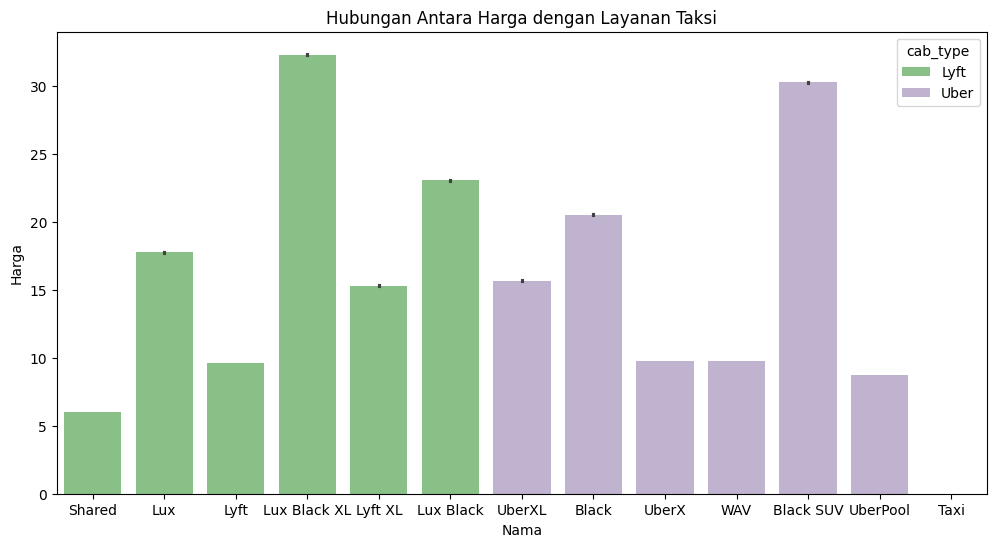

In [8]:
# Melihat hubungan antara price dan jenis layanan
plt.figure(figsize=(12, 6))
sns.barplot(x='name', y='price', data=Dataset, hue='cab_type', palette='Accent')
plt.title('Hubungan Antara Harga dengan Layanan Taksi')
plt.xlabel('Nama')
plt.ylabel('Harga')
plt.show()

Kesimpulan

Dari gambar diatas kolom "Taxi" menunjukkan tidak adanya harga yang muncul, menandakan bahwa missing value pada kolom price itu hanya berada di "Taxi" dan tidak ada di yang lainnya sehingga missing value seperti ini telah ditemukan polanya, karena muncul pola yang terlihat, missing value ini dikategorikan **MAR (Missing At Random)** karena keberadaan atau ketiadaan suatu missing value tidak berkaitan dengan nilai yang hilang itu sendiri, tetapi mungkin berkaitan dengan kolom feature yang lain

In [9]:
# Membuat DataFrame dari data
df = pd.DataFrame(Dataset)

# Mengelompokkan data berdasarkan kolom 'name', 'cab_type', dan 'product_id'
kelompok_data = df.groupby(['name', 'cab_type', 'product_id'])

# Menghitung jumlah nilai yang hilang pada kolom 'price' untuk setiap kelompok
tabel_kontingensi = kelompok_data['price'].apply(lambda x: x.isnull().sum())

# Menampilkan hasil
print("\nTabel Layanan Missing Value Kolom price")
print(tabel_kontingensi)



Tabel Layanan Missing Value Kolom price
name          cab_type  product_id                          
Black         Uber      6c84fd89-3f11-4782-9b50-97c468b19529        0
Black SUV     Uber      6d318bcc-22a3-4af6-bddd-b409bfce1546        0
Lux           Lyft      lyft_premier                                0
Lux Black     Lyft      lyft_lux                                    0
Lux Black XL  Lyft      lyft_luxsuv                                 0
Lyft          Lyft      lyft                                        0
Lyft XL       Lyft      lyft_plus                                   0
Shared        Lyft      lyft_line                                   0
Taxi          Uber      8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a    55095
UberPool      Uber      997acbb5-e102-41e1-b155-9df7de0a73f2        0
UberX         Uber      55c66225-fbe7-4fd5-9072-eab1ece5e23e        0
UberXL        Uber      6f72dfc5-27f1-42e8-84db-ccc7a75f6969        0
WAV           Uber      9a0e7b09-b92b-4c41-9779-2ad22b4d77

Kesimpulan

Mengetahui jumlah missing value dari informasi yang lebih dalam yaitu disertai dengan nama, cab_type, dan product ID. Maka dapat dikatakan bahwa missing value pada kolom price memang hanya pada "Taxi" saja. Ini menandakan adanya sebuah pola.

**Melihat data duplikat**

In [10]:
# Melihat duplikat data
duplicates_df = Dataset[Dataset.duplicated()]
duplicates_df

Empty DataFrame
Columns: [id, timestamp, hour, day, month, datetime, timezone, source, destination, cab_type, product_id, name, price, distance, surge_multiplier, latitude, longitude, temperature, apparentTemperature, short_summary, long_summary, precipIntensity, precipProbability, humidity, windSpeed, windGust, windGustTime, visibility, temperatureHigh, temperatureHighTime, temperatureLow, temperatureLowTime, apparentTemperatureHigh, apparentTemperatureHighTime, apparentTemperatureLow, apparentTemperatureLowTime, icon, dewPoint, pressure, windBearing, cloudCover, uvIndex, visibility.1, ozone, sunriseTime, sunsetTime, moonPhase, precipIntensityMax, uvIndexTime, temperatureMin, temperatureMinTime, temperatureMax, temperatureMaxTime, apparentTemperatureMin, apparentTemperatureMinTime, apparentTemperatureMax, apparentTemperatureMaxTime]
Index: []

[0 rows x 57 columns]

Dari informasi diatas tidak terdapat data duplikat yang artinya ini akan mempercepat kita mendapatkan data yang bersih untuk melakukan analisis

**Melihat nilai "NULL" dari dataset**

In [11]:
# Melihat NULL values
print('{} of data is NuLL'.format(
    str(round(Dataset.isna().sum().sum() / Dataset.size * 100,3))+'%'))

0.139% of data is NuLL


<Axes: >

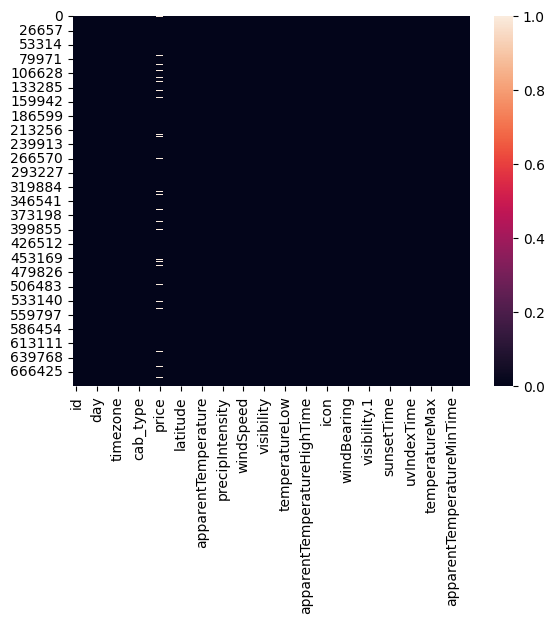

In [12]:
# Menampilkan NULL values menggunakan heatmap
cols = Dataset.columns
sns.heatmap(Dataset[cols].isnull())

Kesimpulan

Dari gambar diatas menunjukkan masih adanya data yang "NULL" tetapi tidak banyak.
* Warna gelap (hitam) menunjukkan bahwa tidak ada nilai yang hilang (missing value) pada posisi tersebut.
* Warna terang (menuju putih) menunjukkan adanya nilai yang hilang pada posisi tersebut.

Terlihat bahwa sebagian besar dataset berwarna hitam, yang berarti tidak ada banyak nilai yang hilang. Namun ada price yang memiliki garis terang, menunjukkan bahwa ada nilai yang hilang pada kolom tersebut.

* Bar Warna di Kanan: Menunjukkan skala intensitas warna, dari 0 (tidak ada nilai yang hilang, warna gelap) hingga 1 (nilai yang hilang, warna terang).

Jadi, dari heatmap ini dapat disimpulkan bahwa sebagian besar kolom dalam dataset tidak memiliki banyak nilai yang hilang, kecuali beberapa kolom yang secara khusus memiliki nilai yang hilang di beberapa baris.

**Melihat distribusi dibeberapa fitur numerik**

In [13]:
# Melihat daftar fitur-fitur numerik pada dataset
num_fitur = Dataset.select_dtypes(include=['float64']).columns.tolist()
num_fitur

['timestamp',
 'price',
 'distance',
 'surge_multiplier',
 'latitude',
 'longitude',
 'temperature',
 'apparentTemperature',
 'precipIntensity',
 'precipProbability',
 'humidity',
 'windSpeed',
 'windGust',
 'visibility',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'dewPoint',
 'pressure',
 'cloudCover',
 'visibility.1',
 'ozone',
 'moonPhase',
 'precipIntensityMax',
 'temperatureMin',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax']

Tujuan melihat data - data diatas hanya ingin melihat tipe data numerik yang tujuannya nanti untuk menampilkan beberapa features/kolom untuk melihat distribusi datanya

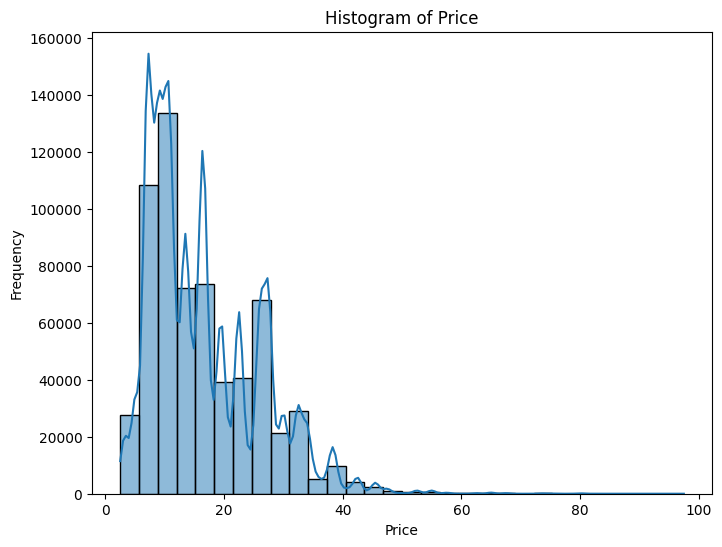

In [14]:
# mengecek distribusi fitur "Price"
plt.figure(figsize=(8, 6))
sns.histplot(Dataset['price'], kde=True, bins=30)
plt.title(f'Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Kesimpulan

Histogram menampilkan data "Price" mayoritas data terdistribusi di sisi kiri, menunjukkan harga rendah. Terdapat ekor panjang di sisi kanan untuk harga tinggi namun jumlahnya sedikit. Rentang harga terbanyak adalah antara 0 dan 10. Variasi harga terlihat dengan beberapa puncak kecil pada rentang tertentu. Setelah 40, data dengan harga tinggi sangat sedikit. Histogram menunjukkan beberapa kelompok data dengan harga tertentu. Puncak tertinggi berada di rentang 0-10 dengan frekuensi lebih dari 140,000. Mayoritas harga rendah dengan sedikit harga tinggi, menunjukkan pola distribusi positif skewed dengan outliers pada harga tinggi.

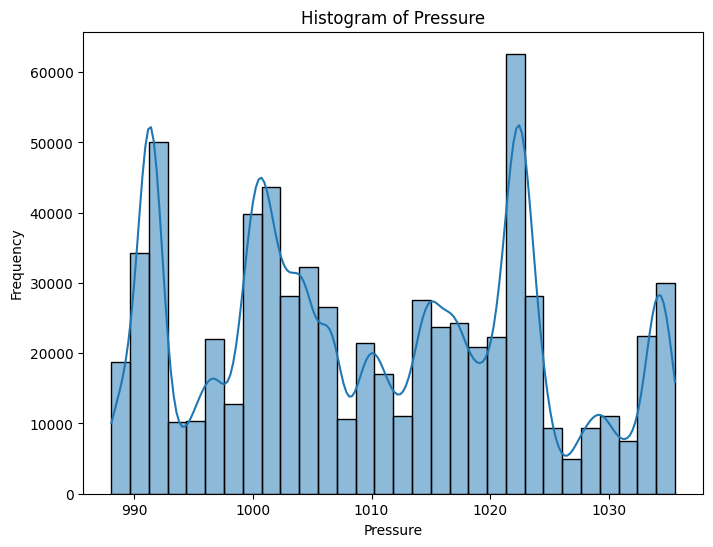

In [15]:
# mengecek distribusi fitur "Pressure"
plt.figure(figsize=(8, 6))
sns.histplot(Dataset['pressure'], kde=True, bins=30)
plt.title(f'Histogram of Pressure')
plt.xlabel('Pressure')
plt.ylabel('Frequency')
plt.show()

Kesimpulan

Grafik ini menampilkan histogram data "Pressure" data menunjukkan distribusi dengan beberapa puncak, menunjukkan adanya beberapa kelompok data dalam rentang tekanan tertentu. Terdapat puncak utama pada nilai 990, 1000, dan 1020, menunjukkan rentang tekanan yang lebih umum. Variasi frekuensi yang signifikan terlihat di seluruh rentang tekanan, dengan penurunan frekuensi setelah setiap puncak besar. Rentang tekanan berkisar dari 980 hingga 1035, dengan frekuensi tertinggi di sekitar 1020. Grafik juga menunjukkan distribusi fluktuatif dengan naik turun yang menunjukkan ketidaknormalan distribusi tekanan. Terdapat beberapa interval tekanan dengan frekuensi rendah yang mencerminkan variasi atau anomali dalam data tekanan.

**Melihat Distribusi Data?**

- Apakah data terdistribusi normal atau tidak?
- Apakah ada outliers dalam data?
- Box plot juga dapat memberikan informasi atau gambaran tentang distribusi data. Jika data terdistribusi normal, box plot akan menunjukkan bahwa median berada di tengah kotak (IQR) dan garis median box akan sejajar dengan garis tengah box. Outlier juga dapat dilihat pada box plot.

Tujuan dari melihat distribusi data adalah kita ingin mengetahui kualitas data kita lalu menentukan langkah apa yang kita akan lakukan buat ke proses selanjutnya.

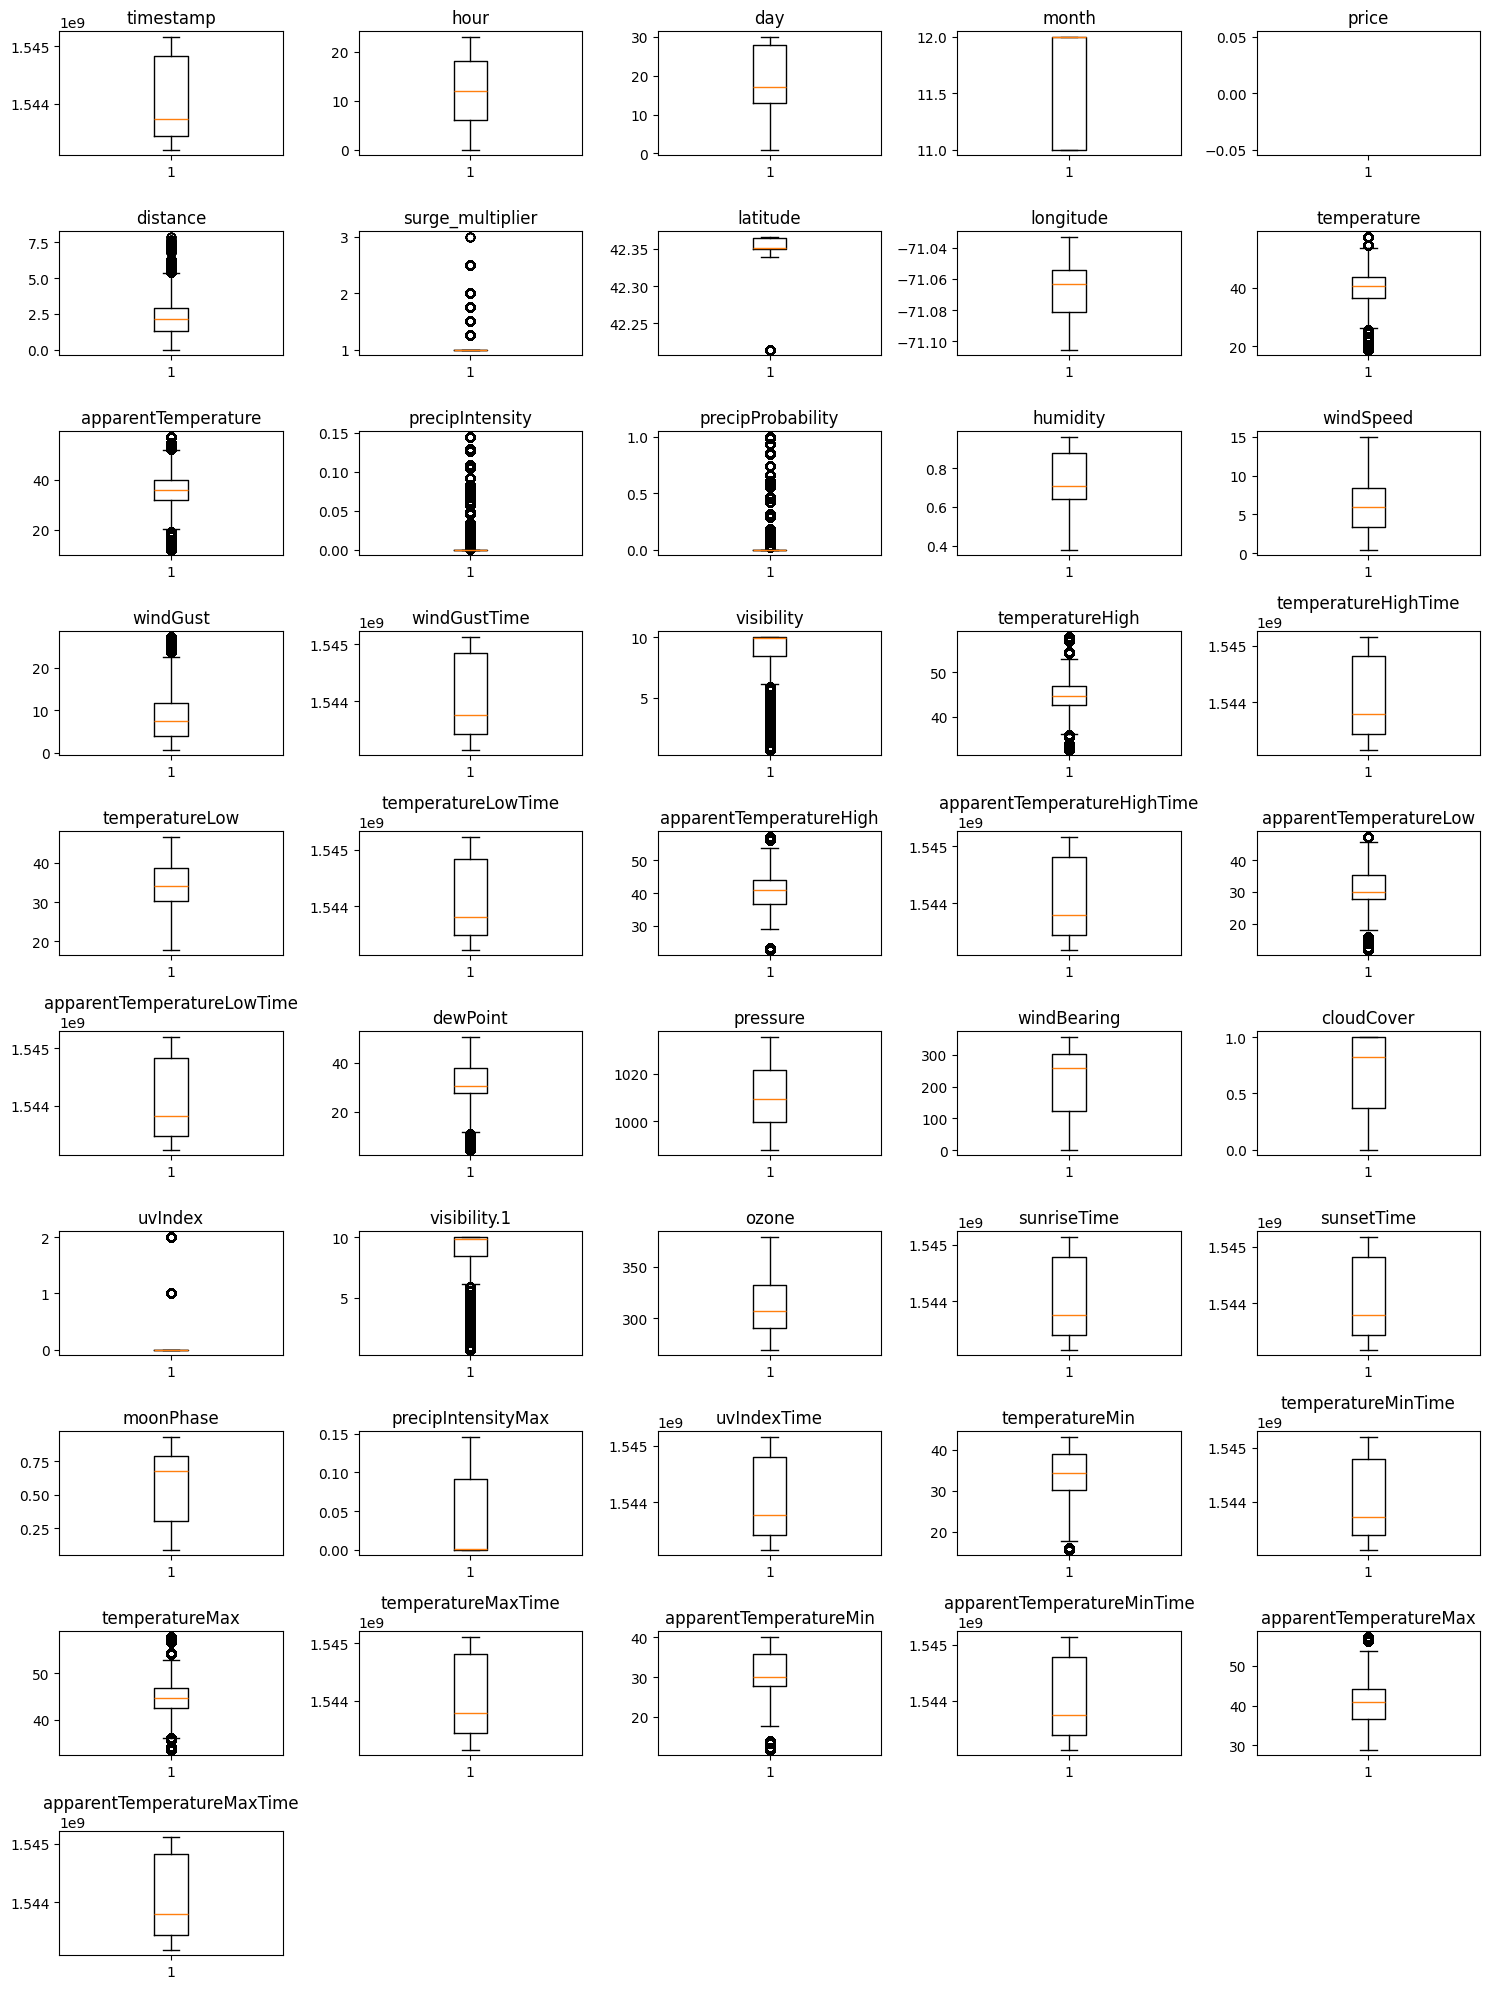

In [16]:
# Mengidentifikasi kolom numerik
kolom_numerik = Dataset.select_dtypes(include=['number']).columns

# Menentukan ukuran plot
fig, sumbu = plt.subplots(10, 5, figsize=(15, 20))
sumbu = sumbu.flatten()

# Membuat boxplot untuk setiap kolom numerik
for idx, kolom in enumerate(kolom_numerik):
    sumbu[idx].boxplot(Dataset[kolom])
    sumbu[idx].set_title(kolom)
    
# Menonaktifkan plot yang tidak terpakai
for idx_sisa in range(len(kolom_numerik), len(sumbu)):
    sumbu[idx_sisa].axis('off')

# Menata layout agar berantakan
plt.tight_layout()

# Menampilkan plot
plt.show()


Kesimpulan
-  Ada outlier di beberapa kolom seperti distance, surge_multiplier, latitude, temperature, apparentTemperature, precipIntensiy, precipProbability, windGust, Visibility, temperatureHigh, apparentTemperatureHigh, apparentTemperatureLow, dewPoint, Visibility.1, temperatureMin, temperatureMax, apparentTemperatureMin, apparentTemperatureMax.
- Terlihat beberapa memiliki distribusi normal seperti hour. Kolom lainnya terlihat ada yang terdistribusi normal tetapi memiliki distribusi yang condong ke bawah atau atas. 

Gambar - gambar boxplot diatas hanya ingin mengetahui seberapa banyak outlier dari setiap kolom yang tujuannya untuk memudahkan kita memilih outlier mana yang harus di potong tetapi dengan mempertimbangkan hubungan antar features/kolom


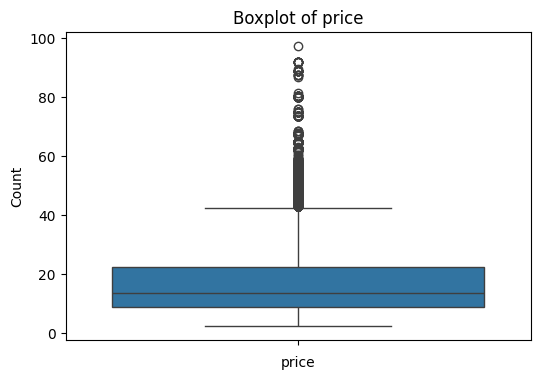

In [17]:
# Membuat boxplot untuk fitur Price
plt.figure(figsize=(6, 4))
sns.boxplot(Dataset['price'])
plt.title('Boxplot of price')
plt.xlabel('price')
plt.ylabel('Count')
plt.show()

Kesimpulan 

Gambar diatas merupakan kolom outlier paling tinggi terdapat banyak titik di atas kotak yang menunjukkan nilai harga di atas sekitar 40, dengan beberapa harga mencapai hampir 100. Ini menunjukkan adanya nilai-nilai harga yang cukup tinggi dibandingkan dengan sebagian besar data. Ini menunjukkan distribusi harga yang umumnya rendah, dengan beberapa nilai yang sangat tinggi, yang perlu dianalisis lebih lanjut untuk memahami alasan di balik nilai-nilai ekstrem tersebut. Tujuannya untuk mempermudah kita nanti melakukan modeling.

**Melihat kolerasi antar features**

- Apakah ada hubungan antara features dalam dataset?
- Bagaimana hubungan antara feature-feature tersebut?

Tujuan melihat kolerasi antar features adalah kita ingin mengetahui features apa saja yang memiliki kolerasi kuat untuk menentukkan features yang nantinya kita pakai atau kita hapus. langkah ini sangat berguna sebelum melakukan proses selanjutnya.

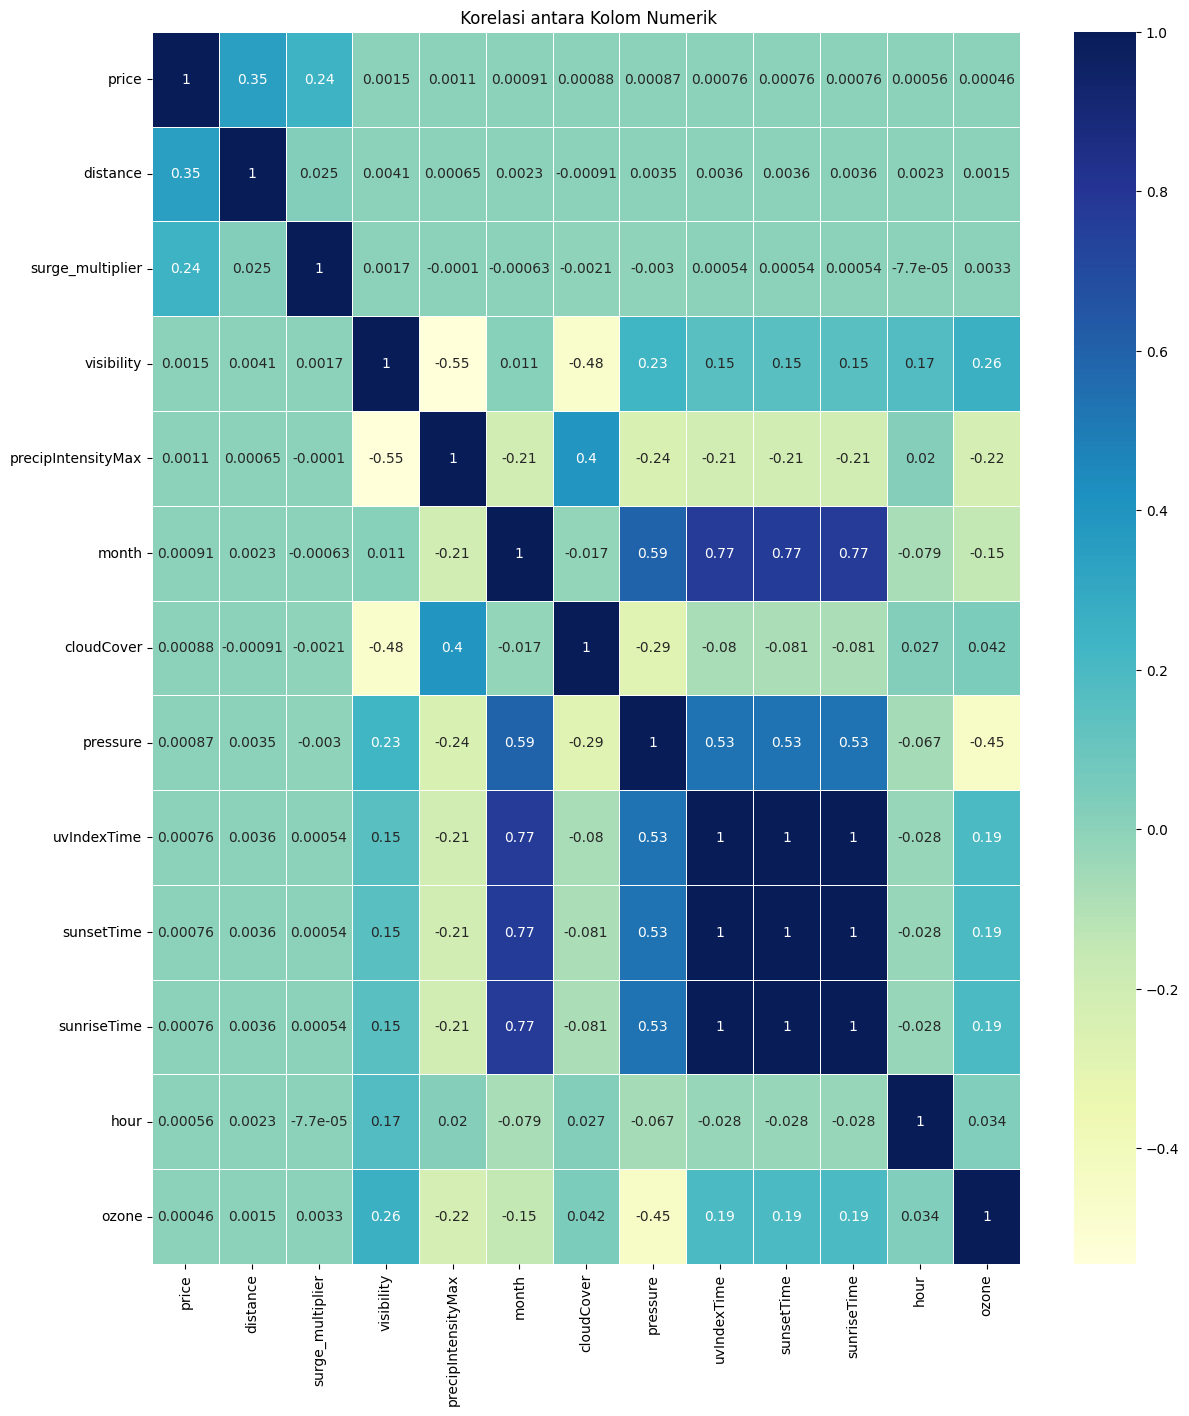

In [18]:
# Daftar kolom numerik yang akan diperiksa
kolom_numerik = ['price', 'distance', 'surge_multiplier', 'visibility', 'precipIntensityMax', 'month', 
                 'cloudCover', 'pressure', 
                 'uvIndexTime', 'sunsetTime', 'sunriseTime', 'hour', 'ozone']

# Membuat visualisasi korelasi
matriks_korelasi = Dataset[kolom_numerik].corr()
plt.figure(figsize=(14, 16))
sns.heatmap(matriks_korelasi, annot=True, cmap="YlGnBu", linewidths=.5)
plt.title(' Korelasi antara Kolom Numerik')
plt.show()


Kesimpulan

Kolom yang memiliki korelasi kuat yaitu :
- uvIndexTime dengan SunriseTime

Korelasi yang tidak kuat tapi dapat dikatakan berkorelasi :
- Price dengan distance, surge_multiplier
- Visibility dengan pressure, ozone
- Month dengan pressure, uvIndexTime, SunriseTime, SunsetTime

Setelah melihat kolerasi antar fitur kita sudah dapat simpulkan bahwa nantinya kita menghapus dan mempertahankan kolom apa saja yang mempengaruhi target

C:\Users\62811\AppData\Local\Temp\ipykernel_25460\3872225437.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cab_type', data=Dataset, palette='dark')


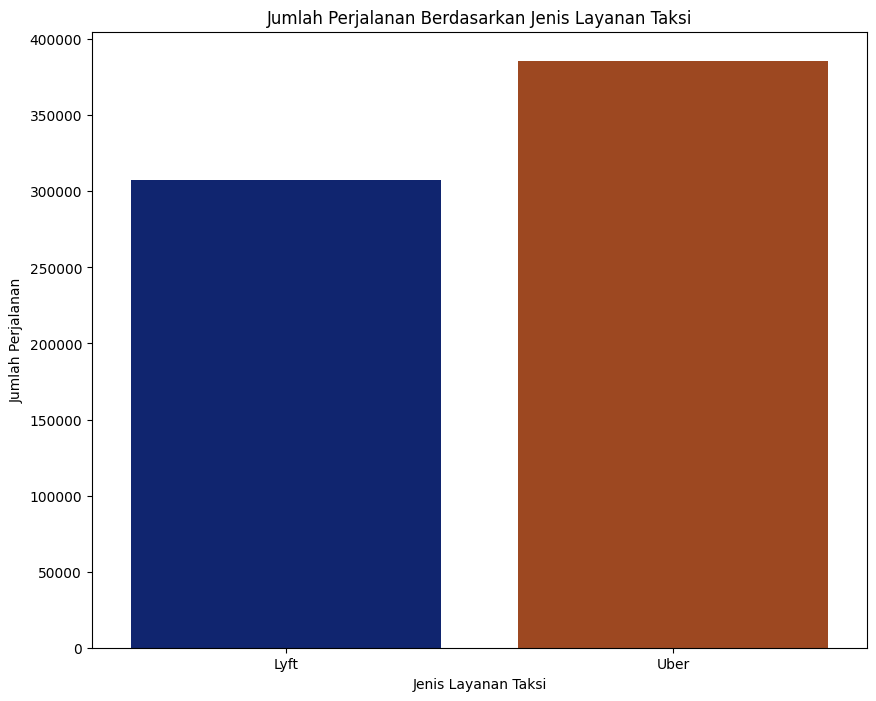

In [19]:
# Membuat plot berdasarkan jenis layanan taksi
plt.figure(figsize=(10, 8))
sns.countplot(x='cab_type', data=Dataset, palette='dark')
plt.title('Jumlah Perjalanan Berdasarkan Jenis Layanan Taksi')
plt.xlabel('Jenis Layanan Taksi')
plt.ylabel('Jumlah Perjalanan')
plt.show()

Kesimpulan 

Layanan taksi "Uber" lebih sering dipilih oleh konsumen dibandingkan dengan layanan taksi "Lyft", menandakan bahwa "Uber" memiliki tingkat popularitas yang lebih tinggi di kalangan pengguna. Popularitas yang lebih tinggi ini bisa disebabkan oleh berbagai faktor seperti ketersediaan kendaraan, harga, atau reputasi layanan. Sebaliknya, layanan taksi "Lyft" yang memiliki jumlah perjalanan lebih rendah namun ini dapat di manfaatkan sebagai peluang strategis. Dengan meningkatkan upaya pemasaran yang lebih agresif atau menawarkan insentif menarik, seperti diskon atau program loyalitas, "Lyft" bisa menarik lebih banyak pengguna untuk mencoba dan beralih ke layanan mereka. Inisiatif semacam ini tidak hanya dapat meningkatkan jumlah perjalanan tetapi juga memperkuat posisi "Lyft" di pasar yang kompetitif.

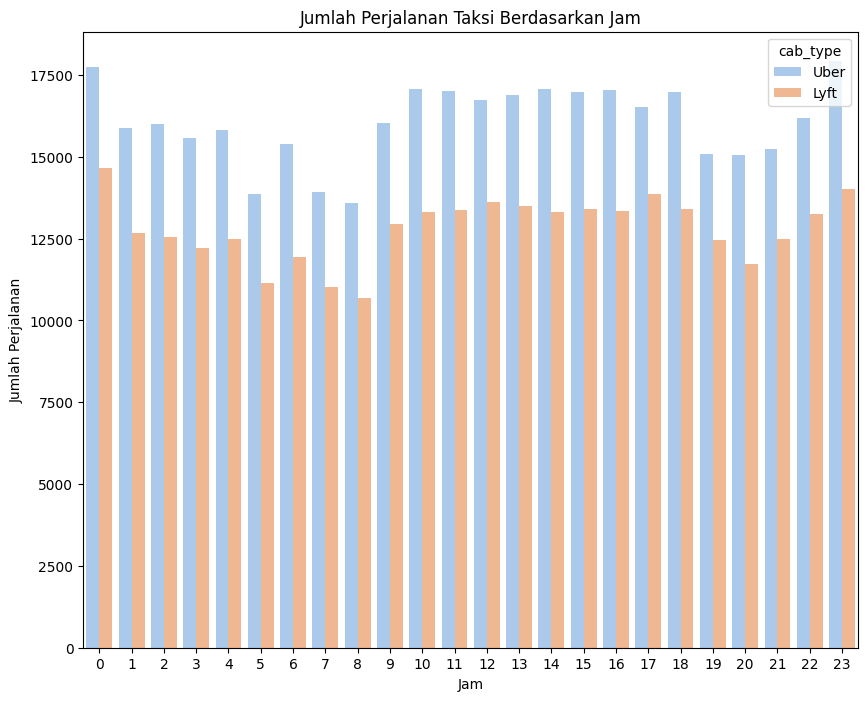

In [20]:
# Membuat plot jumlah perjalanan berdasarkan jam
plt.figure(figsize=(10, 8))
sns.countplot(x='hour', data=Dataset, hue='cab_type', palette='pastel')
plt.title('Jumlah Perjalanan Taksi Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Perjalanan')
plt.show()

Kesimpulan 

Berdasarkan plot tersebut, terlihat bahwa pada jam-jam tertentu, khususnya layanan taksi Uber, mengalami peningkatan aktivitas yang signifikan pada pukul 11 hingga 12 malam. Pada waktu-waktu tersebut, permintaan layanan taksi Uber meningkat tajam dibandingkan dengan jam-jam lainnya. Selain itu, periode jam sibuk juga dapat diamati mulai dari pukul 9 pagi hingga 6 sore. Pada jam-jam ini, jumlah aktivitas layanan taksi tetap tinggi dan konsisten, menunjukkan adanya kebutuhan yang stabil dan terus-menerus akan layanan transportasi online selama jam kerja dan setelahnya. Fenomena ini mungkin disebabkan oleh rutinitas harian masyarakat yang memerlukan transportasi online untuk berangkat dan pulang kerja, serta aktivitas sosial lainnya pada malam hari.

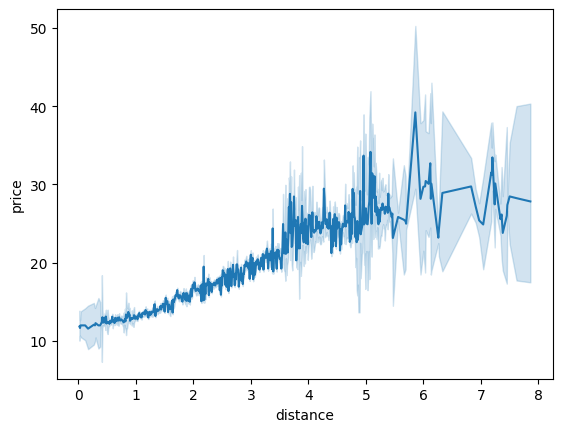

In [21]:
# Melihat kolerasi price dan distance 
sns.lineplot( x=Dataset['distance'] , y=Dataset['price'])
plt.show()

Kesimpulan
* hubungan antara harga dan jarak cenderung linier pada awalnya, di mana harga meningkat seiring dengan bertambahnya jarak.
* Fluktuasi signifikan dan variabilitas yang lebih tinggi pada jarak yang lebih besar mungkin menunjukkan adanya faktor-faktor lain yang mempengaruhi harga, seperti kondisi lalu lintas, waktu perjalanan, atau tarif dinamis.

ini menunjukkan bahwa ada hubungan positif antara jarak dan harga, namun dengan beberapa fluktuasi dan variabilitas yang meningkat pada jarak yang lebih jauh. Hal ini bisa menunjukkan kompleksitas dalam penentuan harga perjalanan berdasarkan jarak.

**Melihat kolerasi antar beberapa fitur**

In [22]:
# Memeriksa korelasi antara fitur price dan distance
korelasi_2fitur = Dataset[['price', 'distance']].corr().iloc[0, 1]
print(f'korelasi antara fitur price dan distance : {korelasi_2fitur}')

korelasi antara fitur price dan distance : 0.34506106627963956


Berdasarkan nilai korelasi yang ada antara fitur price dan distance yaitu sebesar 0.345 (korelasi lemah hingga sedang) Ini menunjukkan bahwa jarak adalah salah satu faktor yang mempengaruhi harga, namun bukan satu-satunya faktor yang signifikan.

In [23]:
# Memeriksa korelasi antara fitur surge_multiplier dan temperatur
korelasi_2fitur = Dataset[['surge_multiplier', 'temperature']].corr().iloc[0, 1]
print(f'korelasi antara fitur surge_multipler dan temperature : {korelasi_2fitur}')

korelasi antara fitur surge_multipler dan temperature : -0.0015720949521174708


Berdasarkan nilai korelasi yang ada antara fitur surge_multiplier dan temperature yaitu sebesar -0.001 (korelasi sangat lemah) Ini menunjukkan bahwa kedua fitur tersebut tidak memiliki kolerasi sama sekali.

**Split Train-Test Set**

- Tujuan split data untuk menentukan input dan outputnya. Dimana pada case ini untuk menentukan harga perjalanan sehingga y sebagai target/label dan x sebagai feature.
- Digunakannya test_size 20% untuk dialokasikan sebagai data pengujian.

Split antara x (features) dan y (target)

In [24]:
# Duplikasi data
df = Dataset.copy()

df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [25]:
# Memisahkan antara kolom x dan y 
X = df.drop(['price'], axis = 1)
y = df['price']

Tujuan dipisahnya kolom karena kita tidak ingin kolom y/target ikut dalam pemisahan kolom - kolom features karena kalau tidak dipisahkan kolom kita tidak bisa tahu kolom/features apa saja yang mempengaruhi target

In [26]:
# Memeriksa nilai X
X.head(5)

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime apparentTemperatureMax  \
0                   33.73                  1545012000                  38.07   
1                   36.20                  1543291200                  43.92   
2                   31.04                  1543377600                  44.12   
3                   30.30                  1543550400                  38.53   
4                   29.11                  1543392000                  35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 56 columns]

Kolom X hanya berisi feature - feature yang nantinya akan mempengaruhi kolom y

In [27]:
# Menghitung frekuensi setiap nilai unik dalam kolom 'price'
y.value_counts()

price
7.00     52314
16.50    44351
10.50    40590
13.50    33707
9.00     30884
         ...  
89.50        1
81.50        1
64.50        1
87.00        1
19.35        1
Name: count, Length: 147, dtype: int64

Kesimpulan

* Nilai 7.00 muncul 52,314 kali: Ini menunjukkan bahwa 7.00 adalah salah satu nilai paling umum dalam kolom price.
* Nilai 16.50 muncul 44,351 kali: Nilai 16.50 juga cukup umum, tetapi tidak sebanyak 7.00.
* Nilai yang muncul hanya 1 kali: Di bagian bawah daftar, ada nilai seperti 89.50, 81.50, 64.50, 87.00, dan 19.35 yang masing-masing hanya muncul sekali. Ini menunjukkan bahwa nilai-nilai ini sangat jarang dalam dataset.

Dengan melihat nilai - nilai diatas bisa bertujuan untuk Memahami 

* Distribusi Data: Mengetahui seberapa sering setiap nilai muncul membantu dalam memahami distribusi harga.
* Mengidentifikasi Outlier: Nilai yang sangat jarang muncul mungkin merupakan outlier atau kesalahan data yang memerlukan perhatian lebih lanjut. Mengingat kita juga belum menghapus outlier
 
Informasi ini bisa digunakan untuk strategi encoding dan normalisasi data dalam persiapan model machine learning.
Dengan melihat distribusi frekuensi ini, kita dapat mengambil keputusan yang lebih baik terkait analisis data dan pemrosesan lebih lanjut.

In [28]:
# Splitting antara train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 40)
print('Train Size: ', X_train.shape)
print('Test Size: ', X_test.shape)

Train Size:  (554456, 56)
Test Size:  (138615, 56)


Dataset sudah dibagi menjadi data train dan test:
-   Data train sebanyak 554456 baris dan 56 fitur/kolom.
-   Data test sebanyak 138615 baris dan 56 fitur/kolom.


**Missing Value Handling**

Ingin melihat missing value dari data y_train dan y_test

In [29]:
# Melihat missing value y_train
print("Jumlah missing value pada y_train: ", y_train.isnull().sum())

# Menghitung persentase nilai yang hilang di setiap kolom
total_entries = len(df)
missing_percentage = (y_train.isnull().sum() / total_entries) * 100
print("Persentase missing value y_train: ", missing_percentage)

# Melihat missing value y_test
print("Jumlah missing value pada y_test: ", y_test.isnull().sum())

# Menghitung persentase nilai yang hilang di setiap kolom
total_entries = len(df)
missing_percentage = (y_test.isnull().sum() / total_entries) * 100
print("Persentase missing value y_test: ", missing_percentage)

Jumlah missing value pada y_train:  44066
Persentase missing value y_train:  6.358078753836187
Jumlah missing value pada y_test:  11029
Persentase missing value y_test:  1.5913232554817616


Kesimpulan

* untuk memastikan kesesuaian jumlah baris antara y_train dan X_train, serta antara y_test dan X_test. Hal ini penting untuk menjaga konsistensi data selama proses pelatihan dan pengujian model.

In [30]:
# Menghapus missing value dari y_train
y_train.dropna(inplace=True)

# Menghapus missing value sesuai dengan indeks y_train_filtered
X_train = X_train.loc[y_train.index]

# Menghapus missing value dari y_test
y_test.dropna(inplace=True)

# Menghapus missing value sesuai dengan indeks y_test_filtered
X_test = X_test.loc[y_test.index]

# Menghapus kolom taxi dari features price
y_train_cleaned = y_train.dropna().filter(items=['Taxi'])
y_test_cleaned = y_test.dropna().filter(items=['Taxi'])
X_train_cleaned = X_train.dropna().filter(items=['Taxi'])
X_test_cleaned = X_test.dropna().filter(items=['Taxi'])

* Tujuan menghapus nilai yang hilang (missing value) pada dataset y_train, kita juga harus menghapus baris yang sesuai pada dataset X_train. Ini dilakukan agar jumlah baris pada kedua dataset tetap seimbang, memastikan tidak ada ketidaksesuaian yang dapat mempengaruhi kinerja model. Prinsip yang sama diterapkan pada dataset y_test dan X_test untuk menjaga integritas data selama fase pengujian. 
* kita sudah menghapus outlier dari y_train, x_train, y_test dan x_test selanjutkan kita akan melakukan outlier dari semua fitur
* Tujuan dari menghapus taxi dari kolom price karena hanya taxi sajalah yang memiliki missing value jadi harus dihapus karena kolom price adalah target

**Outlier Handling**

In [31]:
# Membuat variabel kolom numerik
num_column = X_train.columns[X_train.dtypes != object]

In [32]:
# Membuat plot untuk melihat outlier setiap feature
def diagnostic_plots(df, variable):
    # Define figure size
    plt.figure(figsize=(14, 6))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30, color='green')
    plt.title('Histogram')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable], color='orange')
    plt.title('Boxplot')

    plt.show()

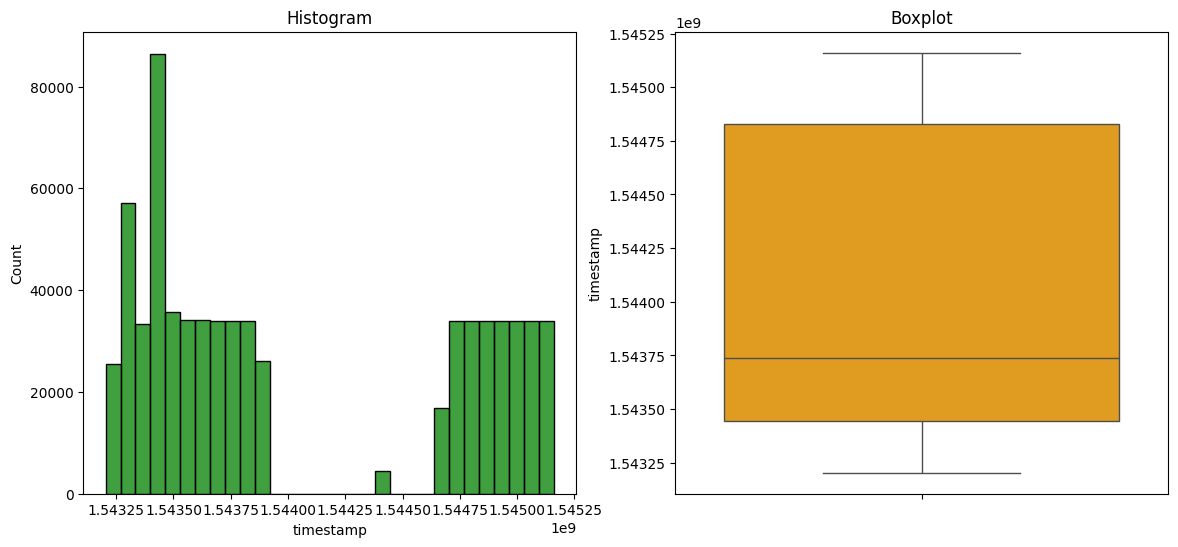

<Figure size 1400x600 with 0 Axes>

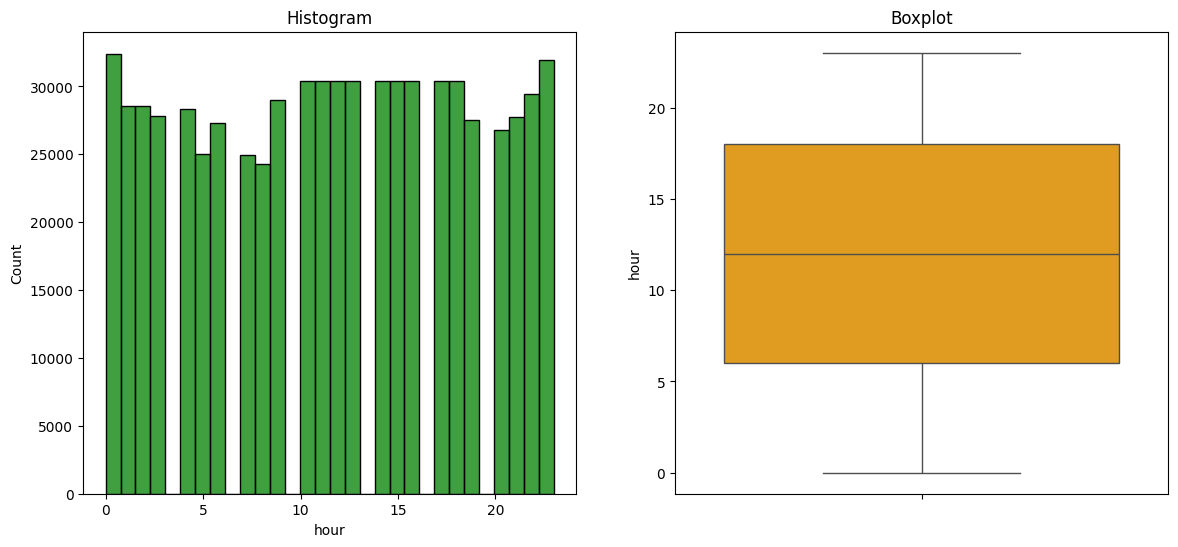

<Figure size 1400x600 with 0 Axes>

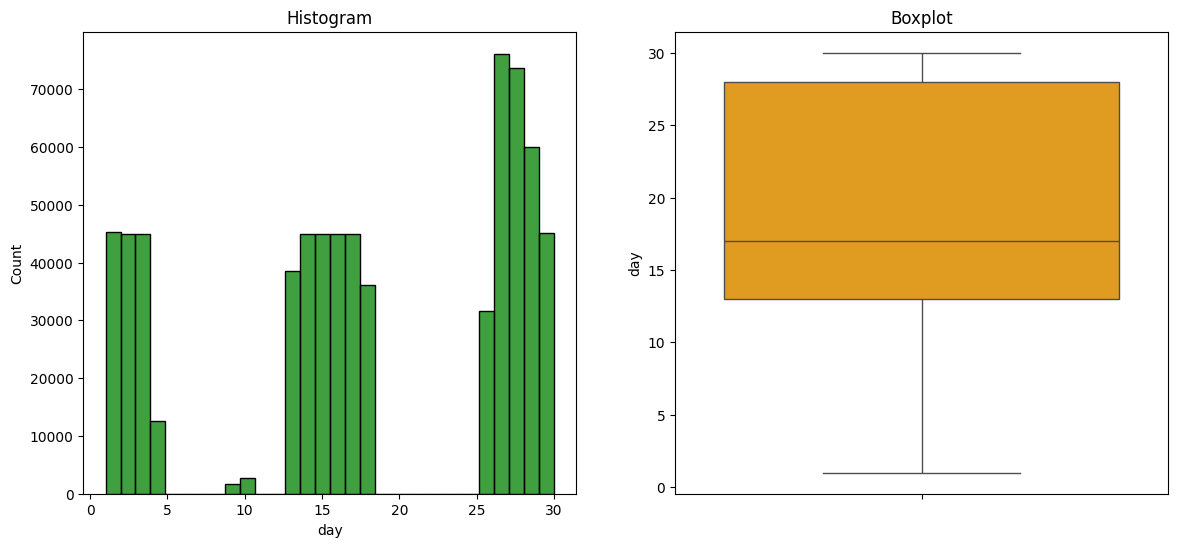

<Figure size 1400x600 with 0 Axes>

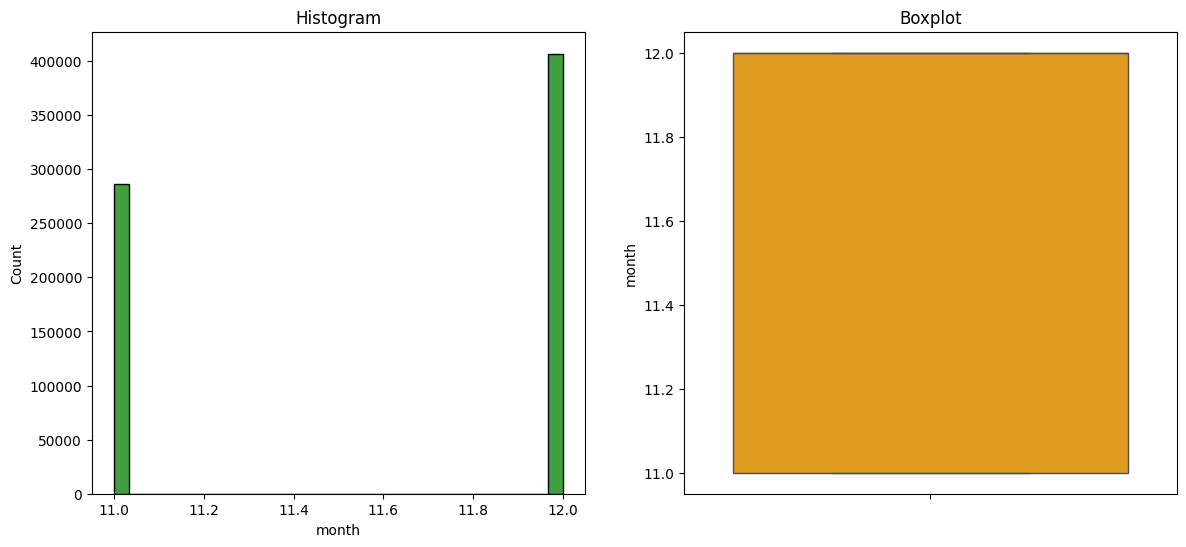

<Figure size 1400x600 with 0 Axes>

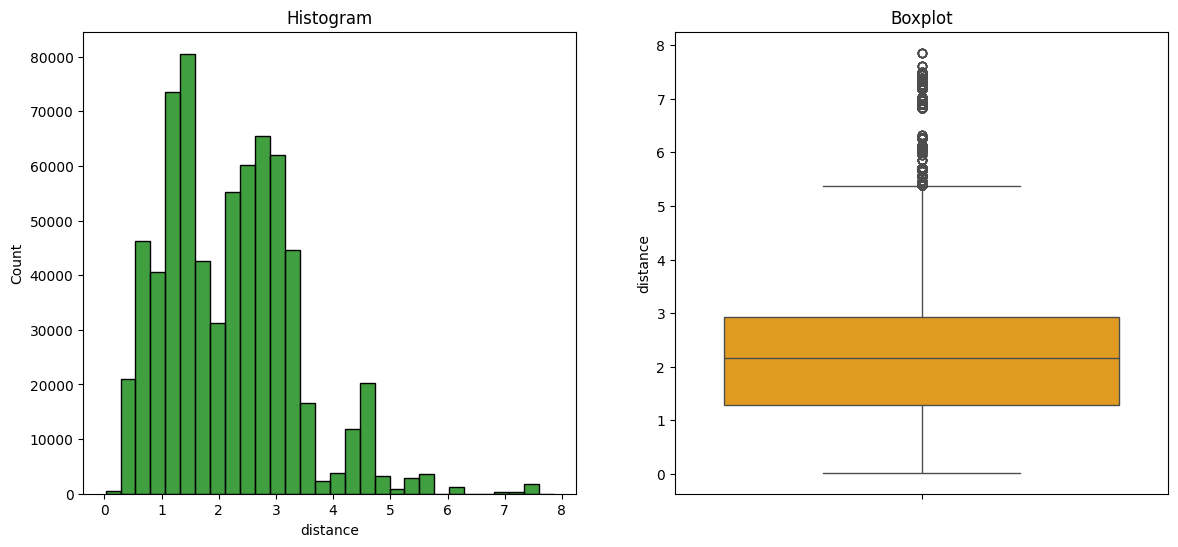

<Figure size 1400x600 with 0 Axes>

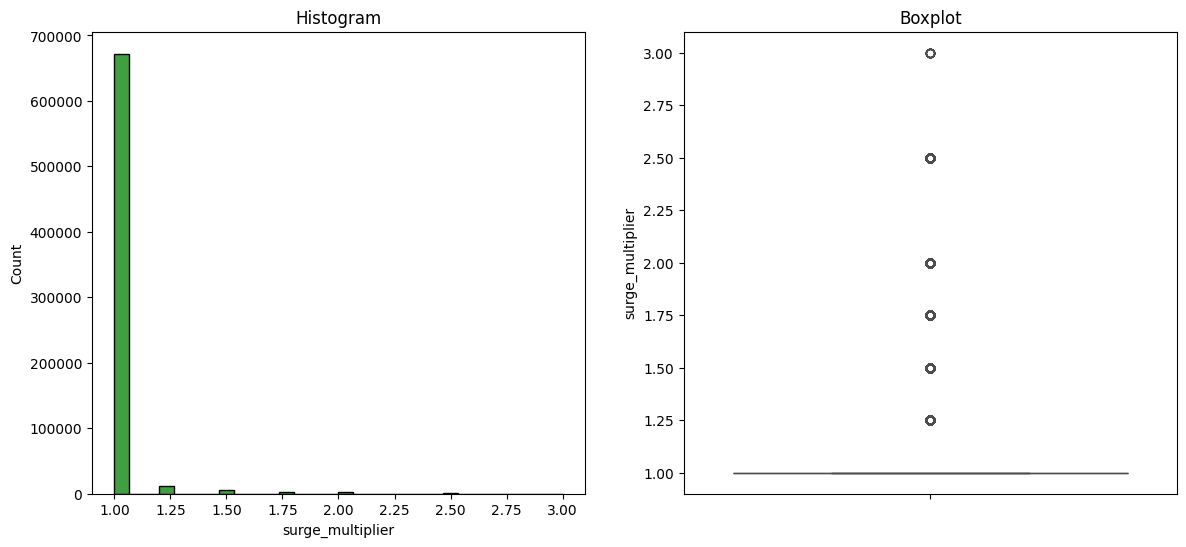

<Figure size 1400x600 with 0 Axes>

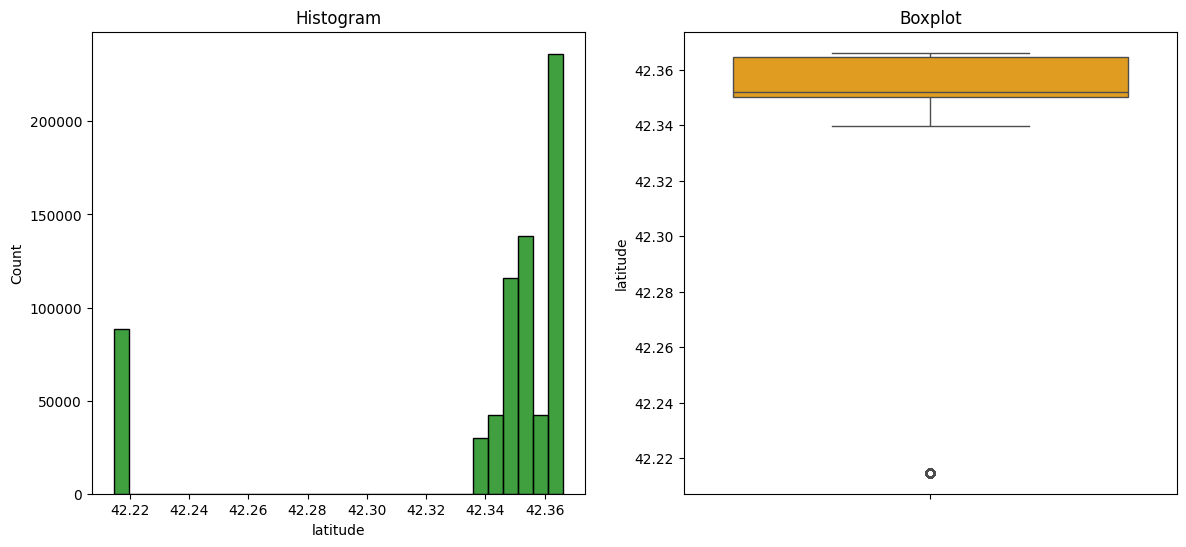

<Figure size 1400x600 with 0 Axes>

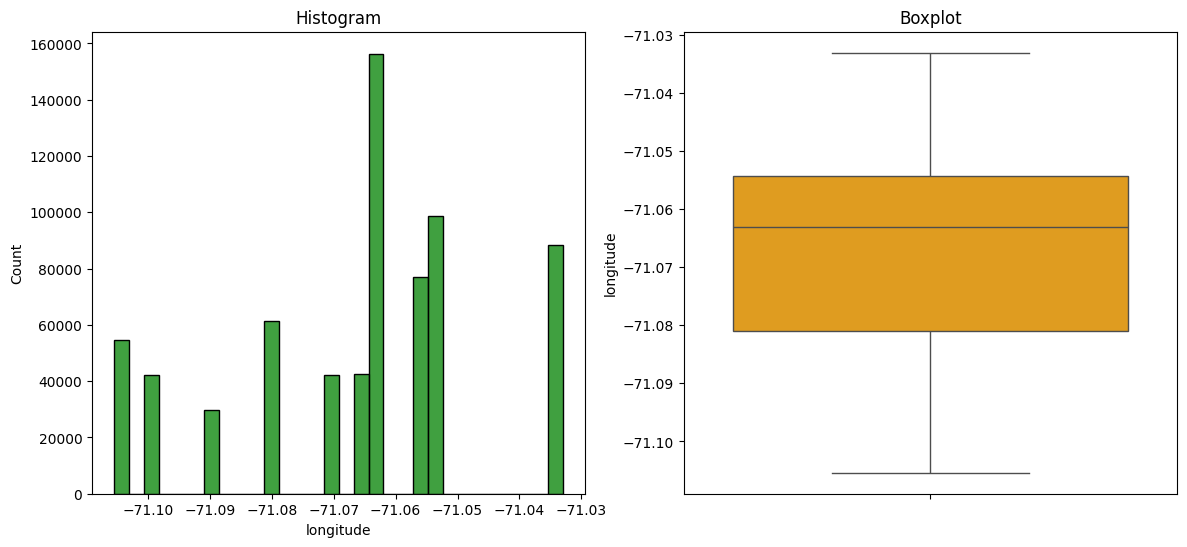

<Figure size 1400x600 with 0 Axes>

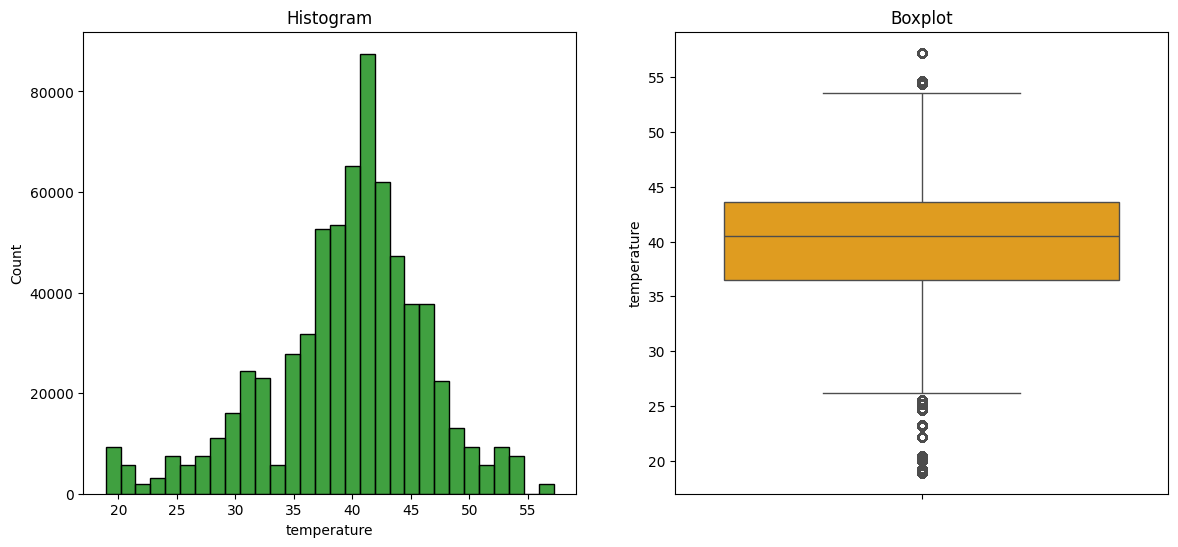

<Figure size 1400x600 with 0 Axes>

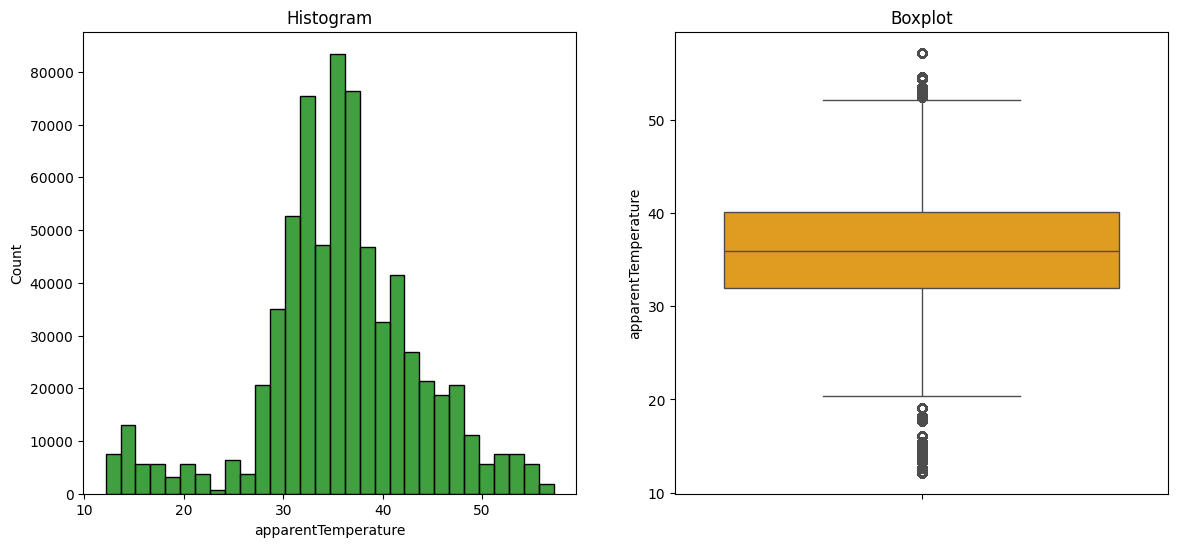

<Figure size 1400x600 with 0 Axes>

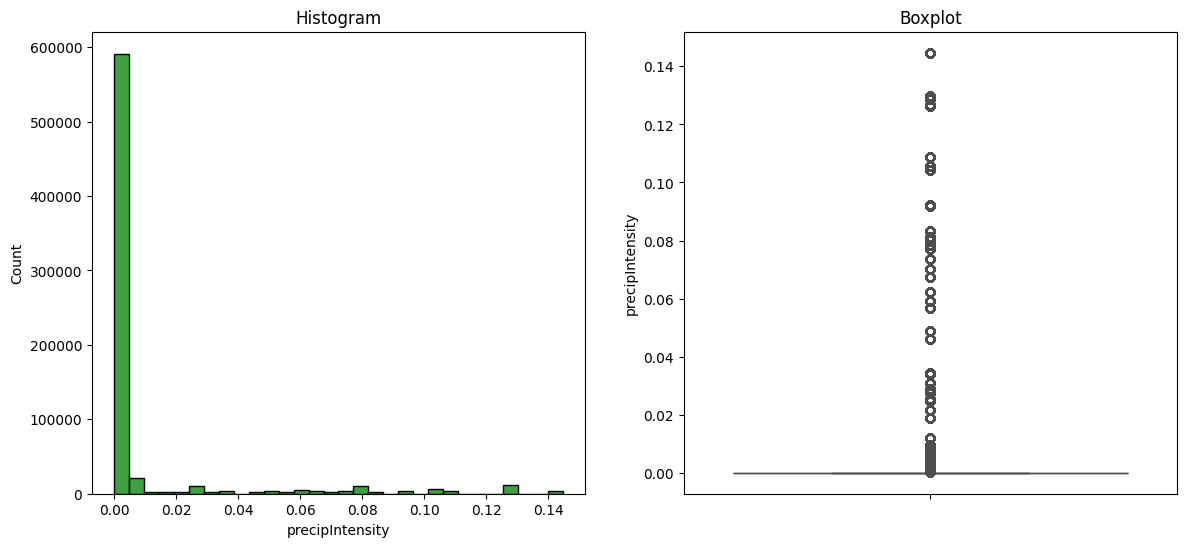

<Figure size 1400x600 with 0 Axes>

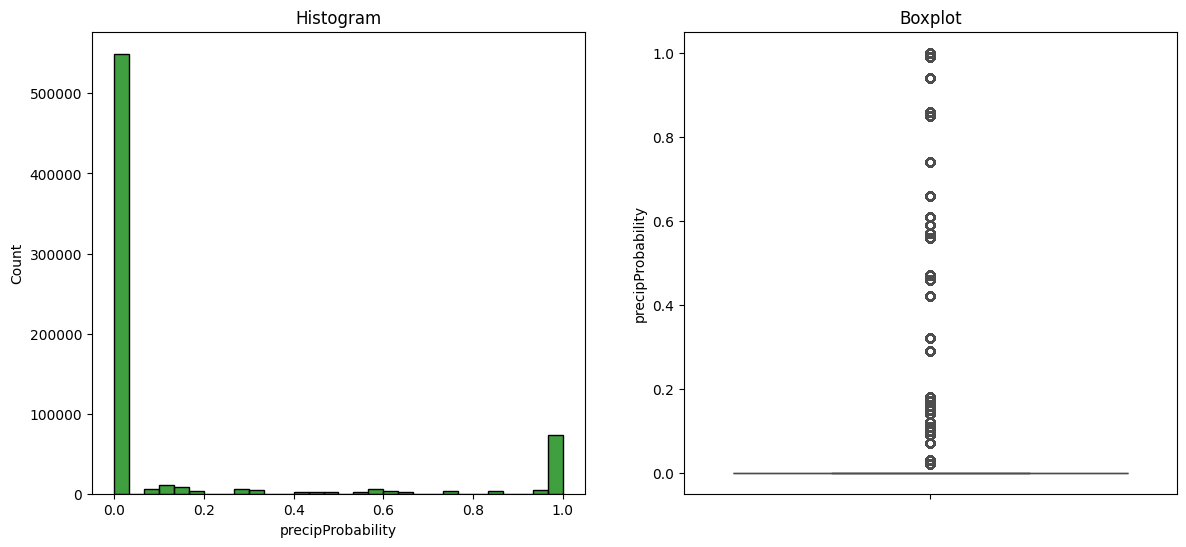

<Figure size 1400x600 with 0 Axes>

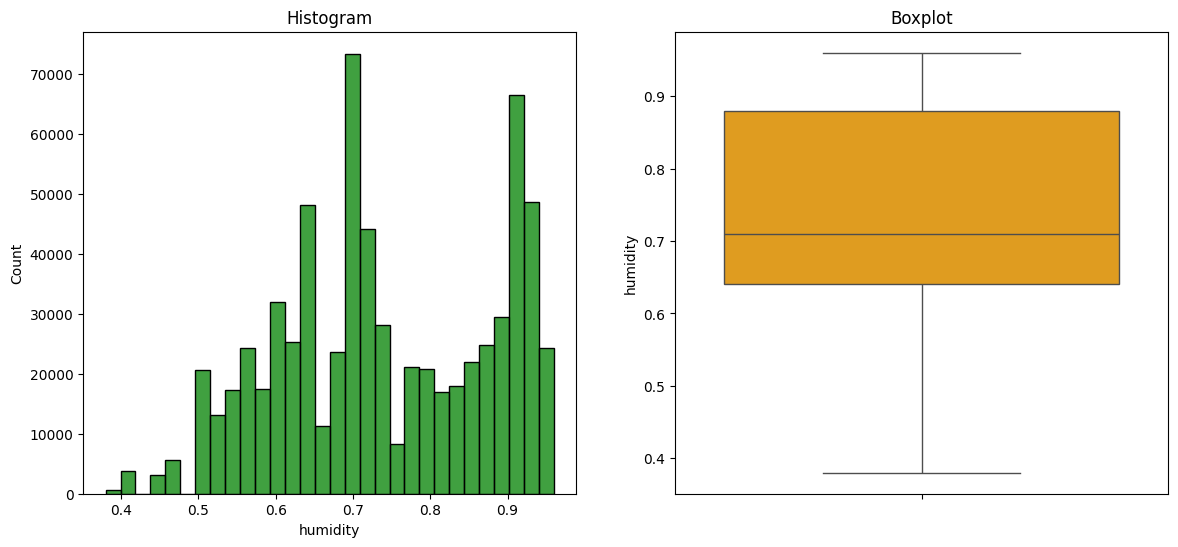

<Figure size 1400x600 with 0 Axes>

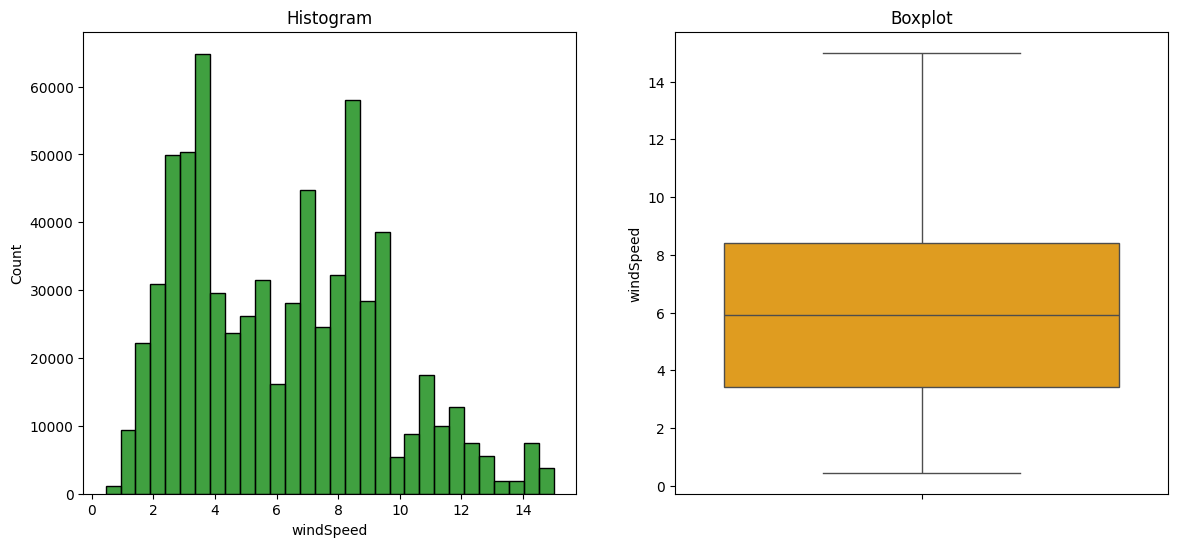

<Figure size 1400x600 with 0 Axes>

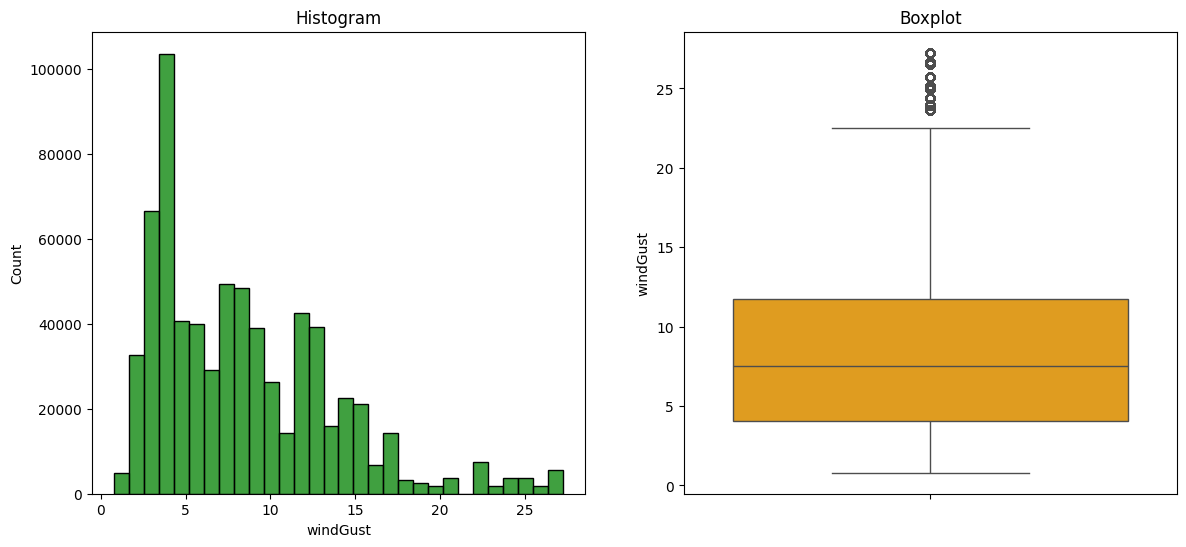

<Figure size 1400x600 with 0 Axes>

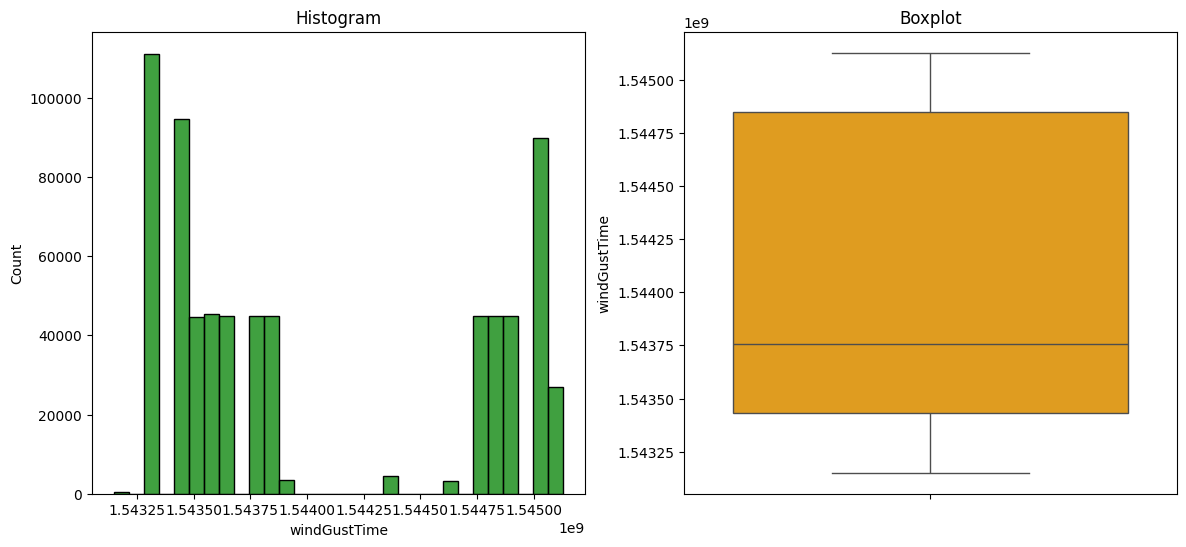

<Figure size 1400x600 with 0 Axes>

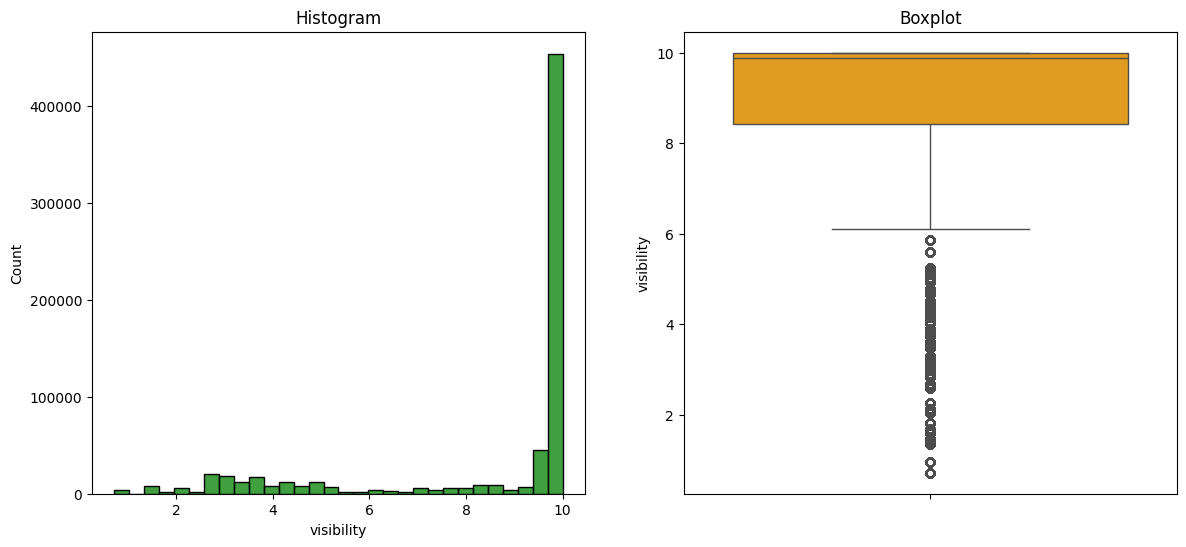

<Figure size 1400x600 with 0 Axes>

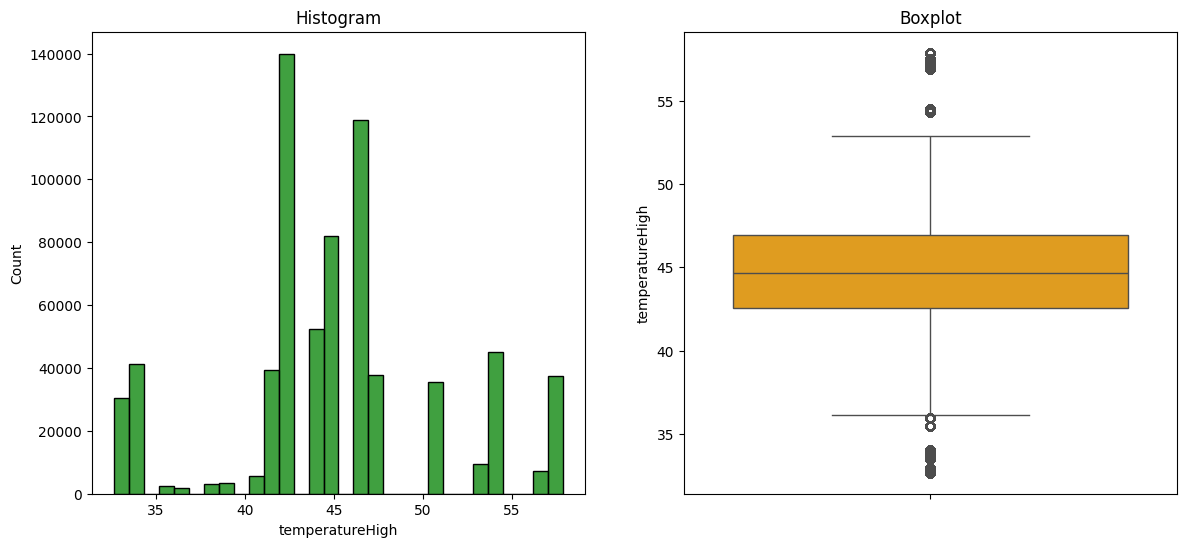

<Figure size 1400x600 with 0 Axes>

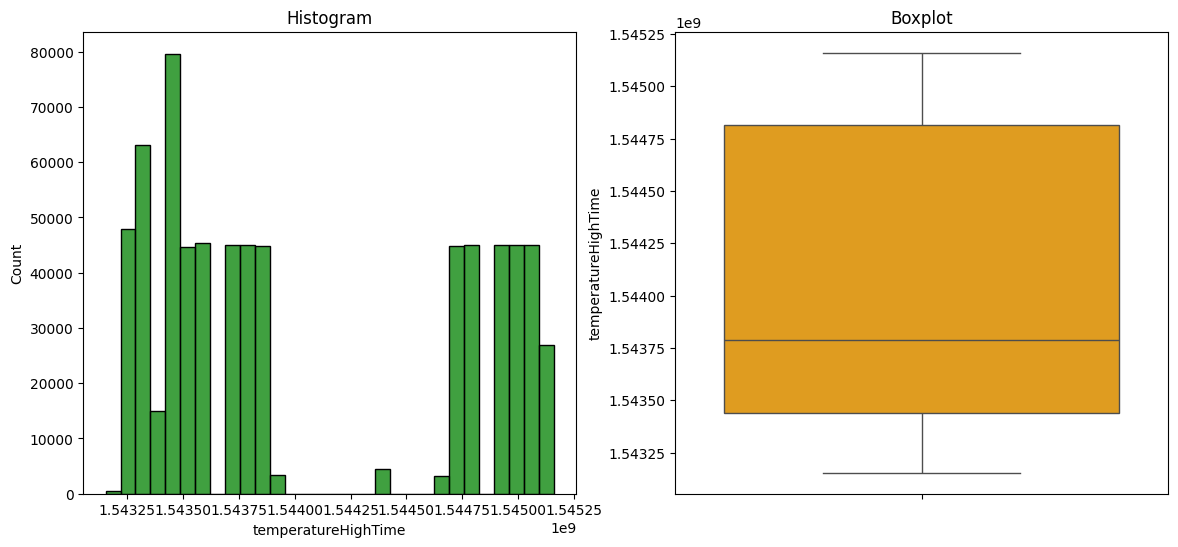

<Figure size 1400x600 with 0 Axes>

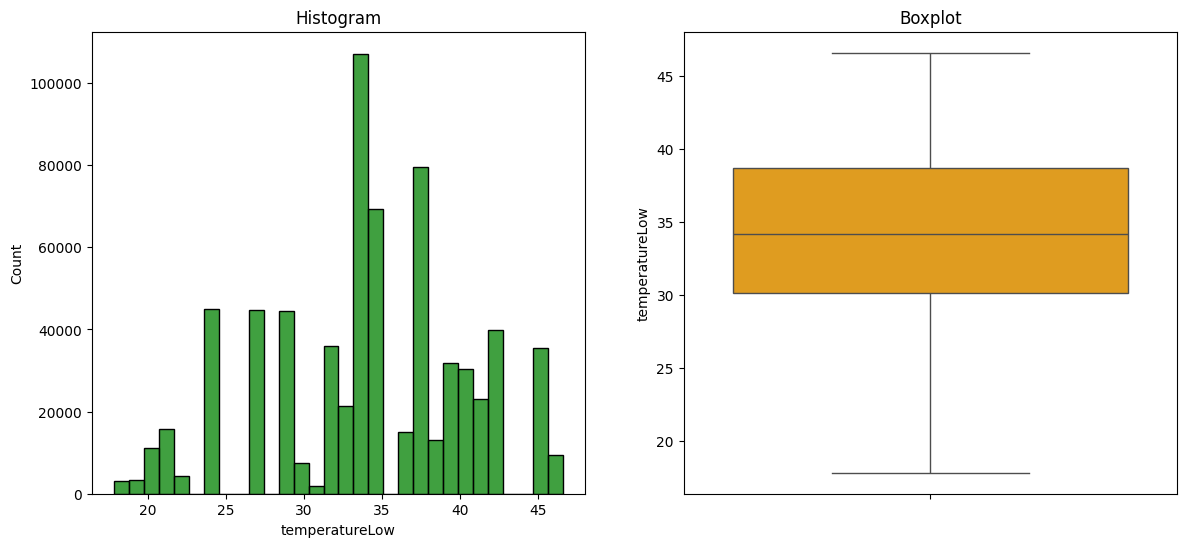

<Figure size 1400x600 with 0 Axes>

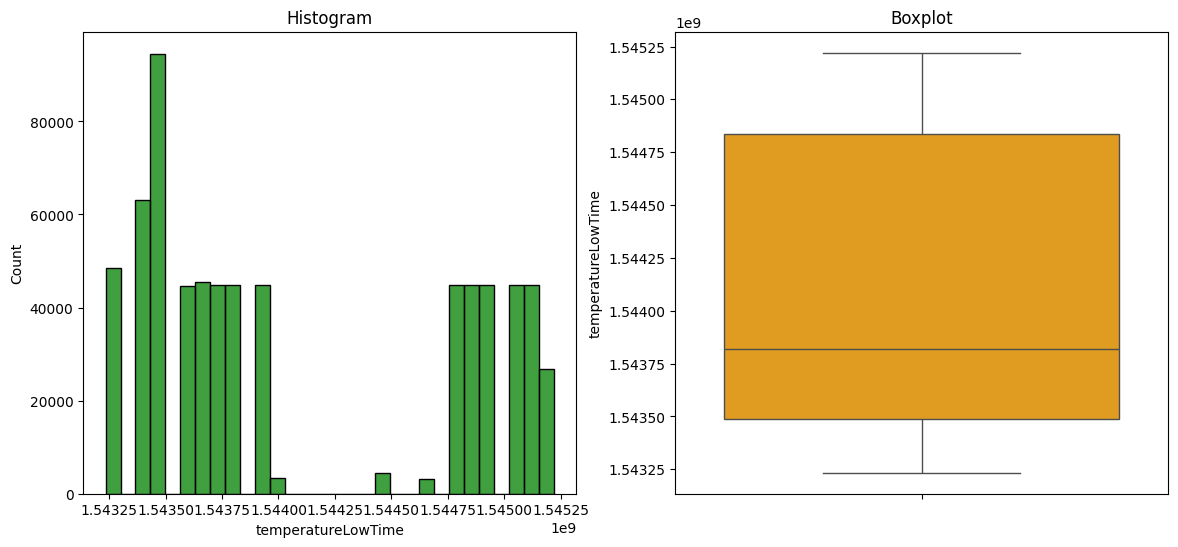

<Figure size 1400x600 with 0 Axes>

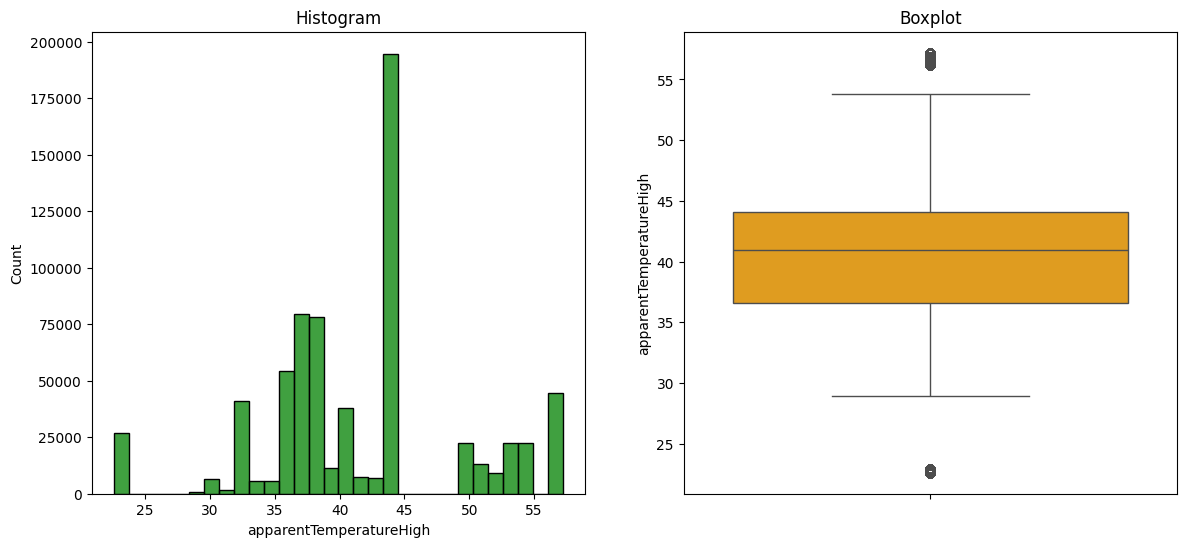

<Figure size 1400x600 with 0 Axes>

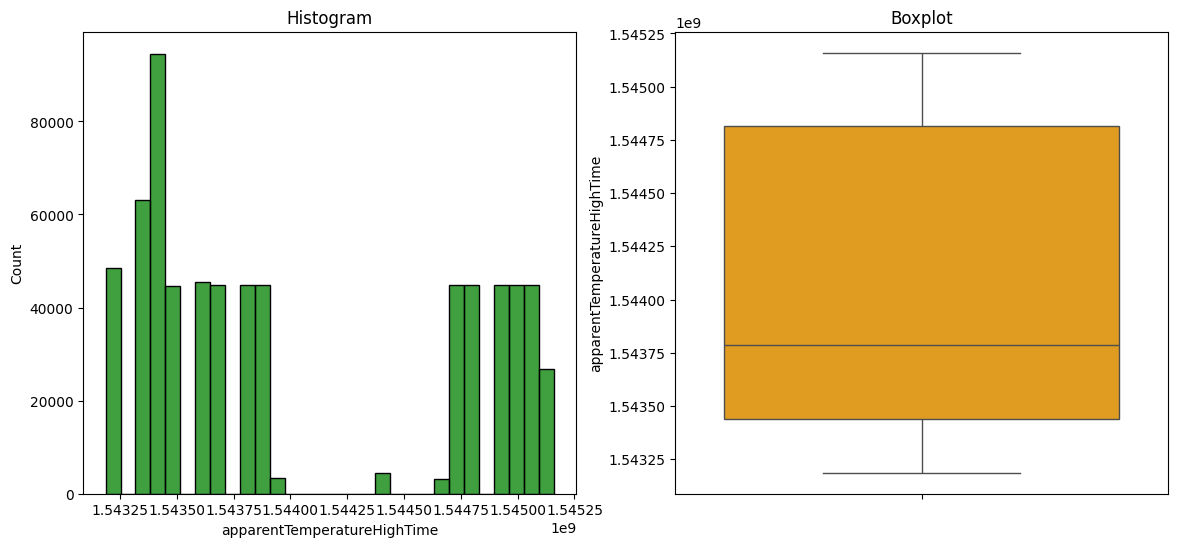

<Figure size 1400x600 with 0 Axes>

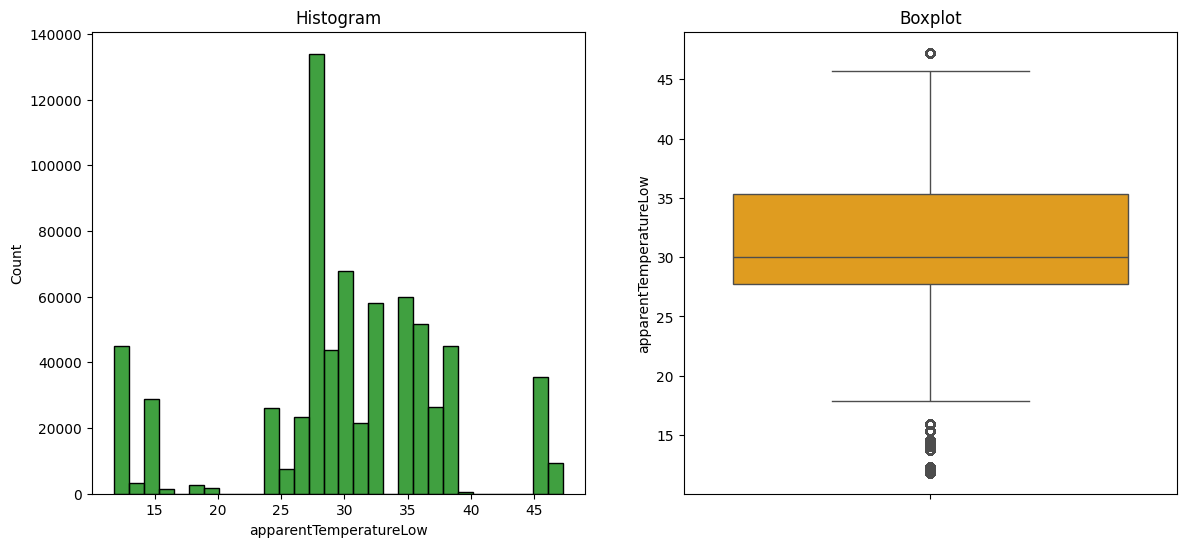

<Figure size 1400x600 with 0 Axes>

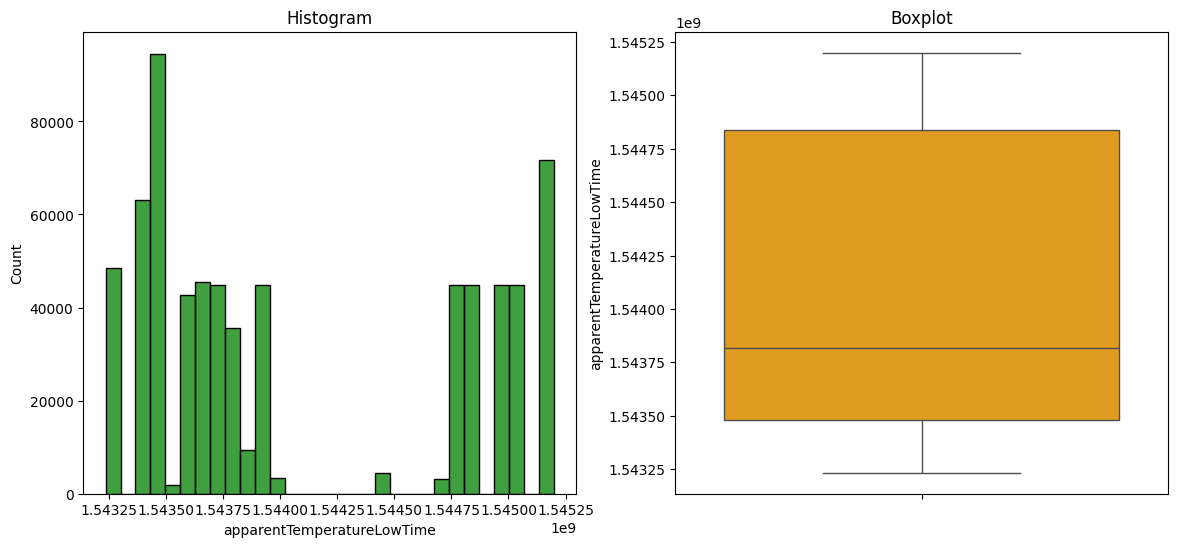

<Figure size 1400x600 with 0 Axes>

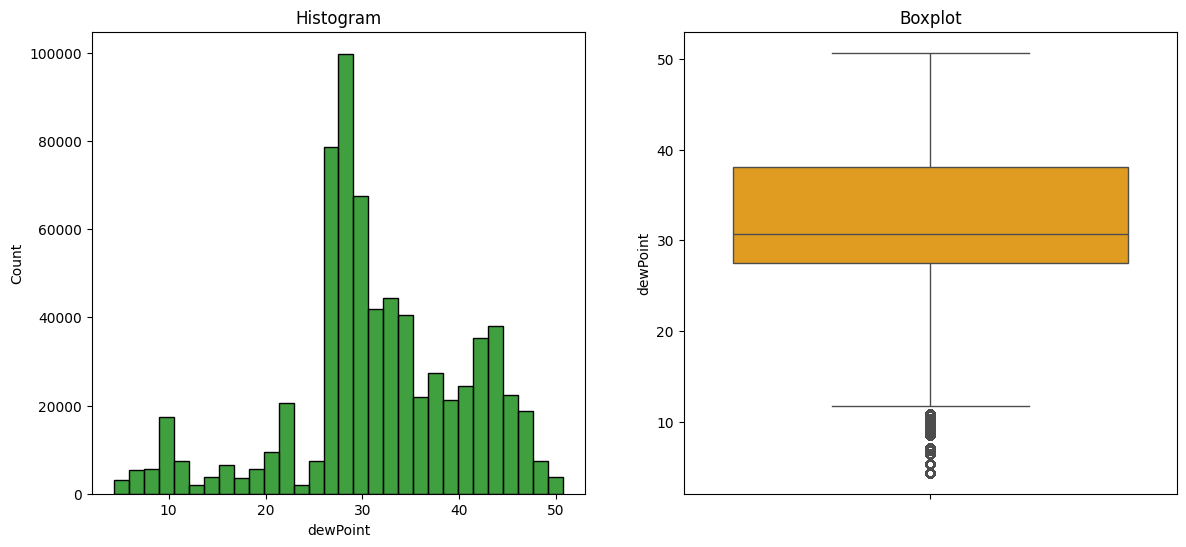

<Figure size 1400x600 with 0 Axes>

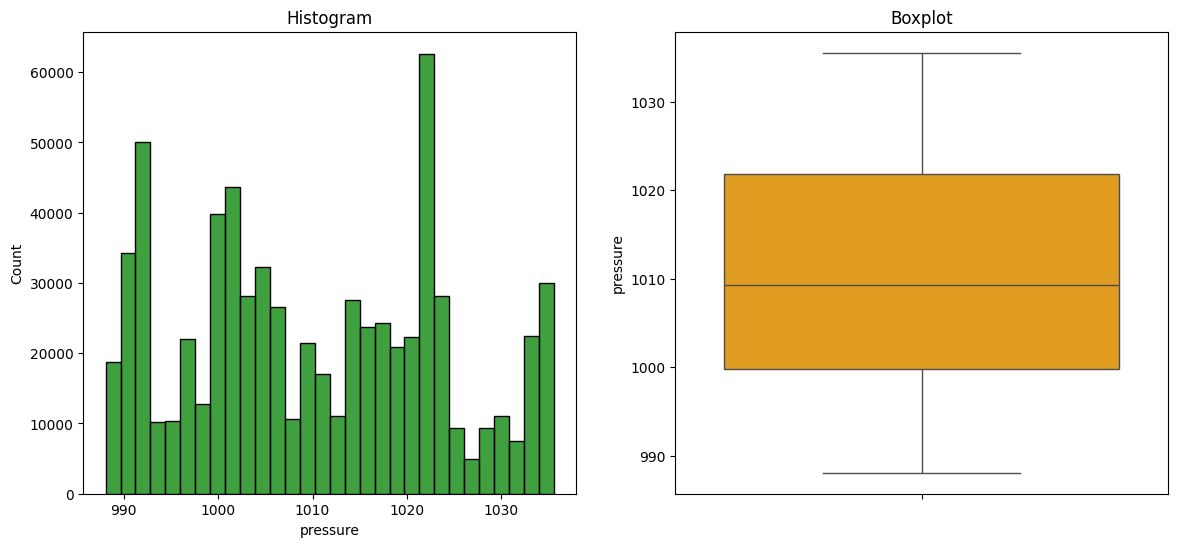

<Figure size 1400x600 with 0 Axes>

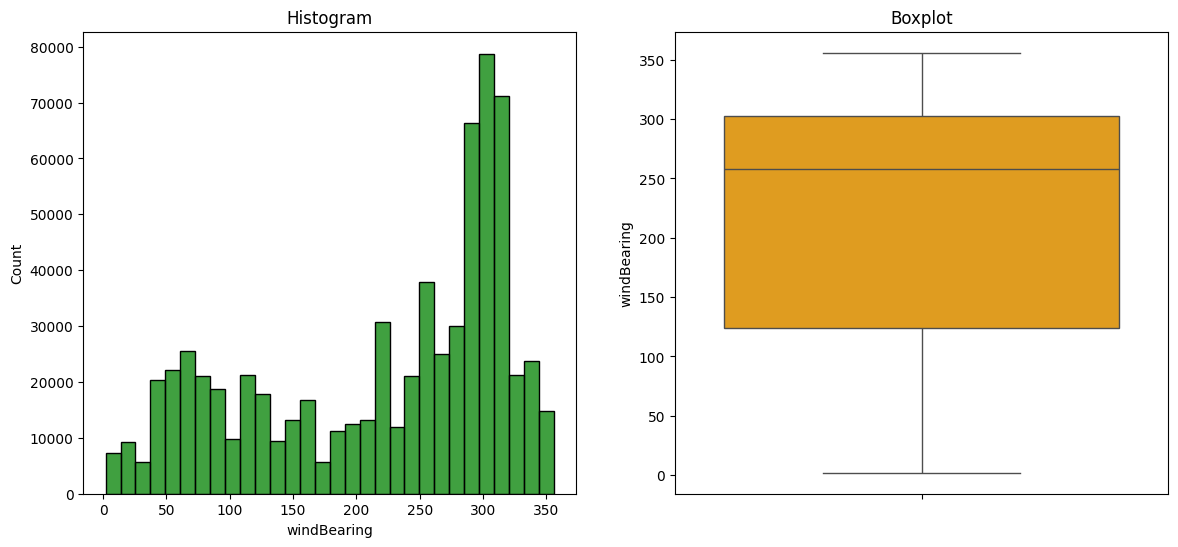

<Figure size 1400x600 with 0 Axes>

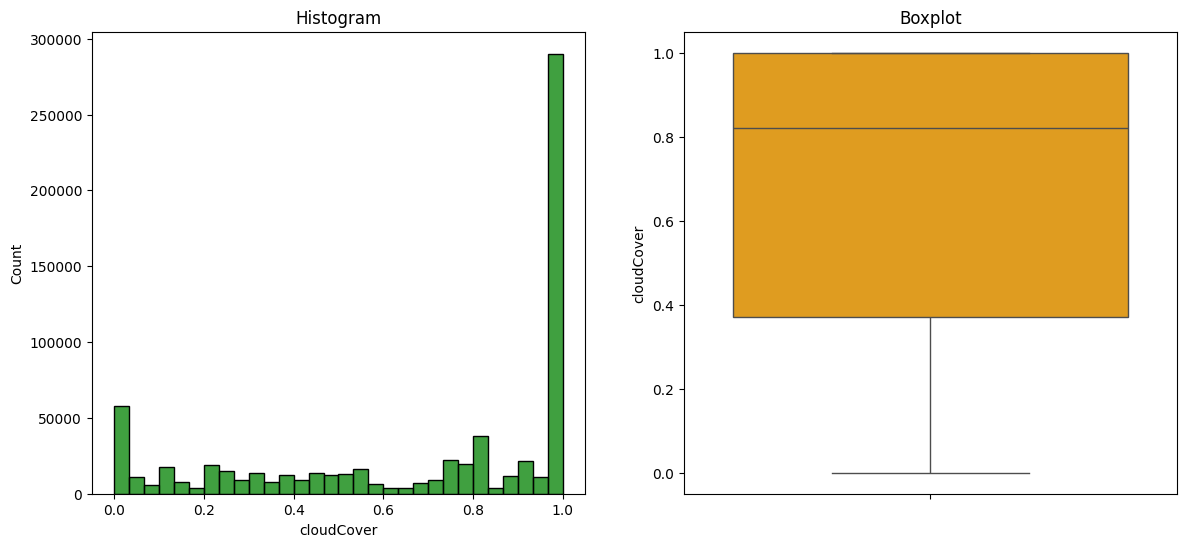

<Figure size 1400x600 with 0 Axes>

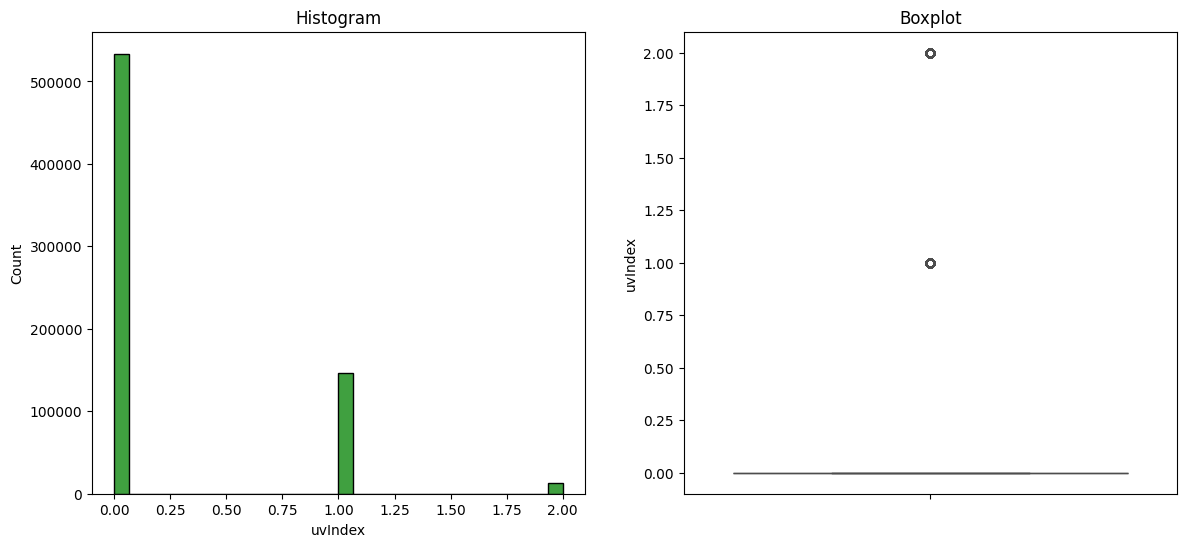

<Figure size 1400x600 with 0 Axes>

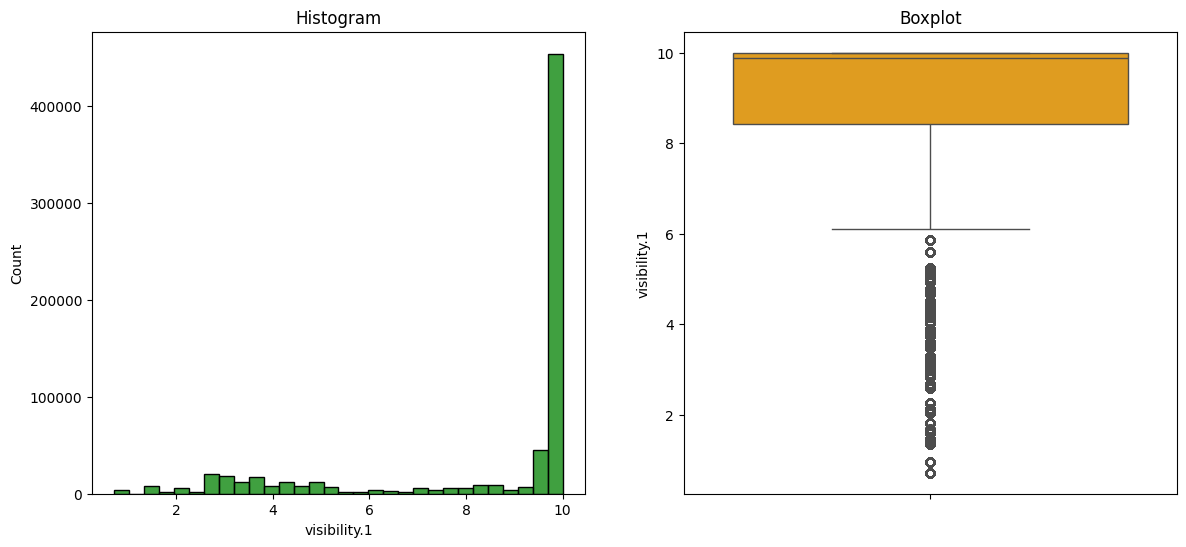

<Figure size 1400x600 with 0 Axes>

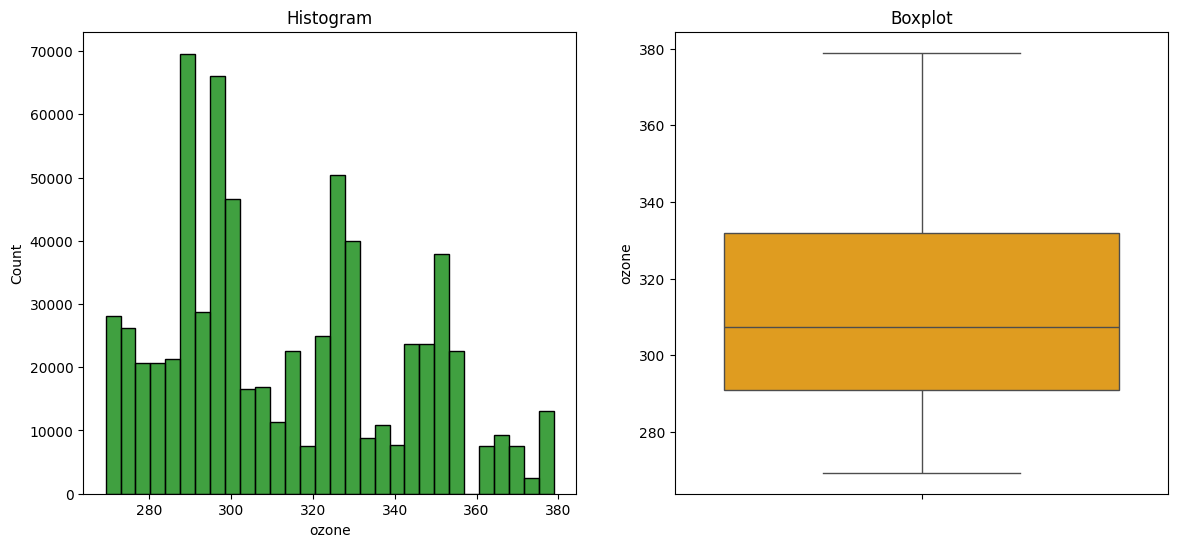

<Figure size 1400x600 with 0 Axes>

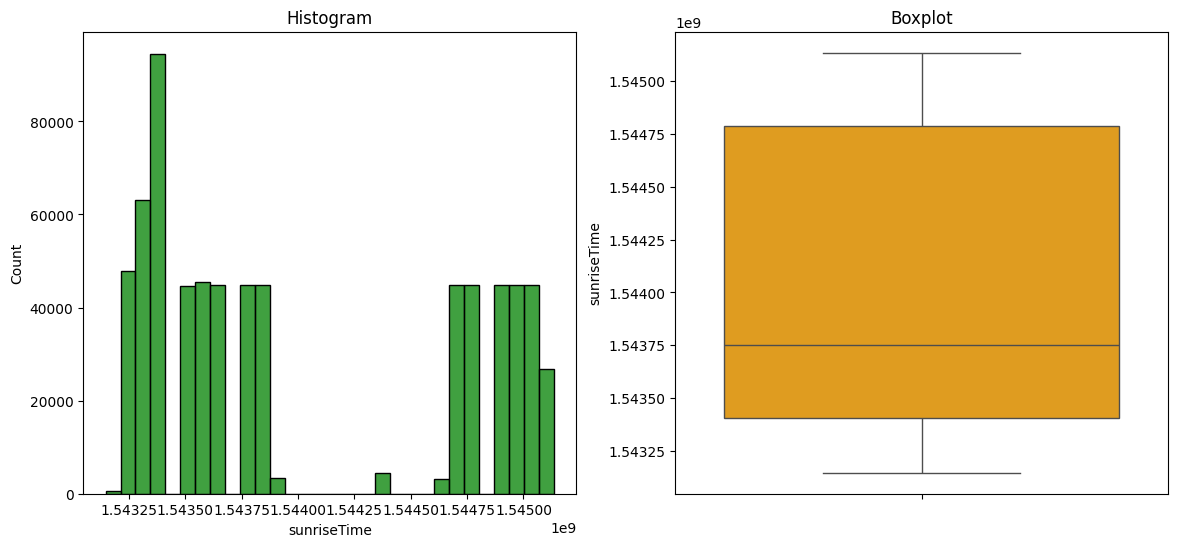

<Figure size 1400x600 with 0 Axes>

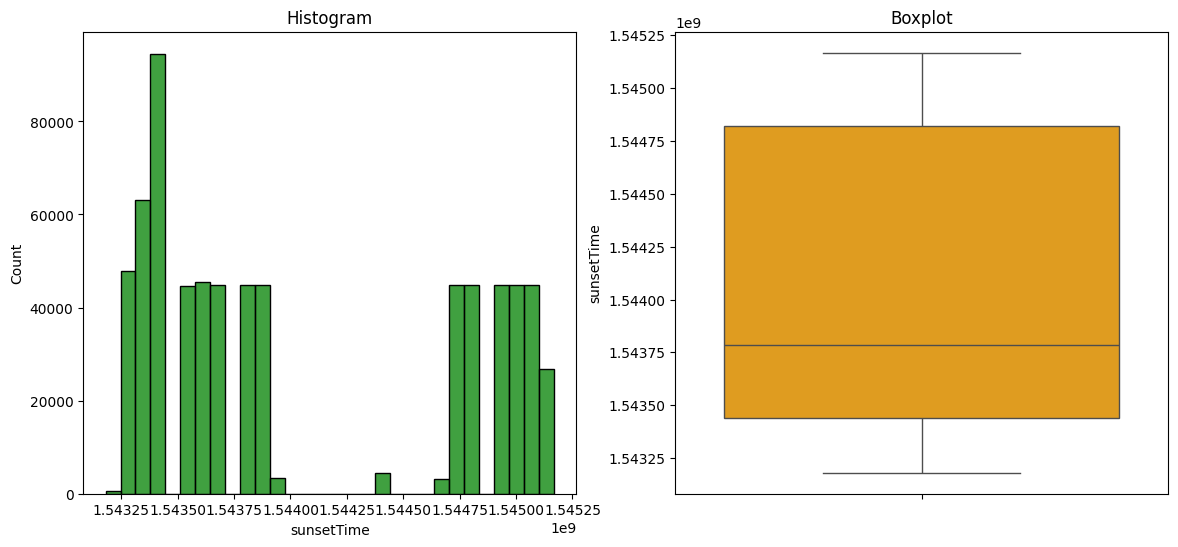

<Figure size 1400x600 with 0 Axes>

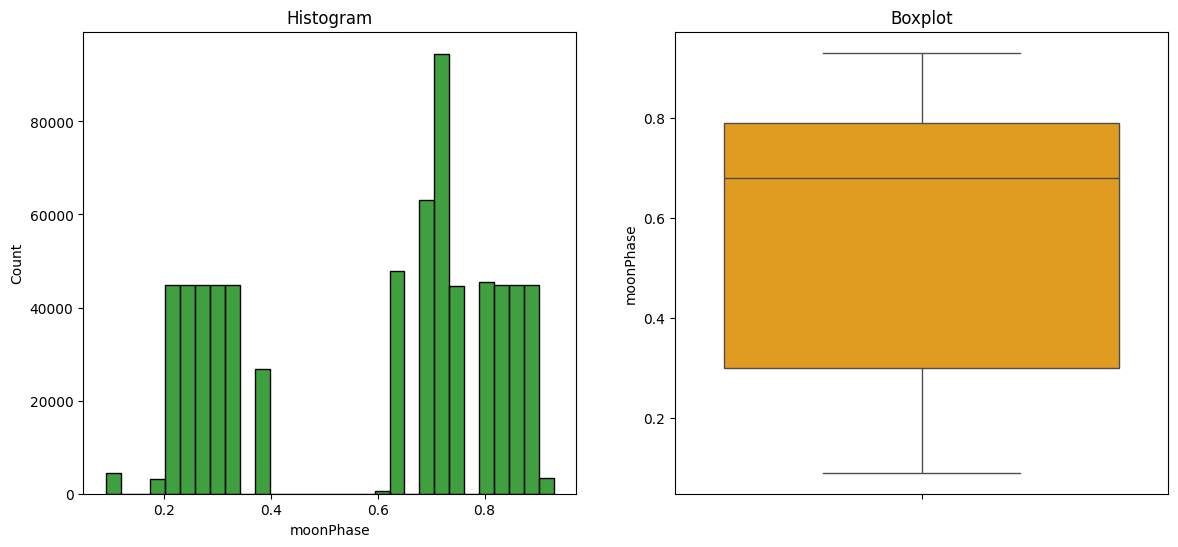

<Figure size 1400x600 with 0 Axes>

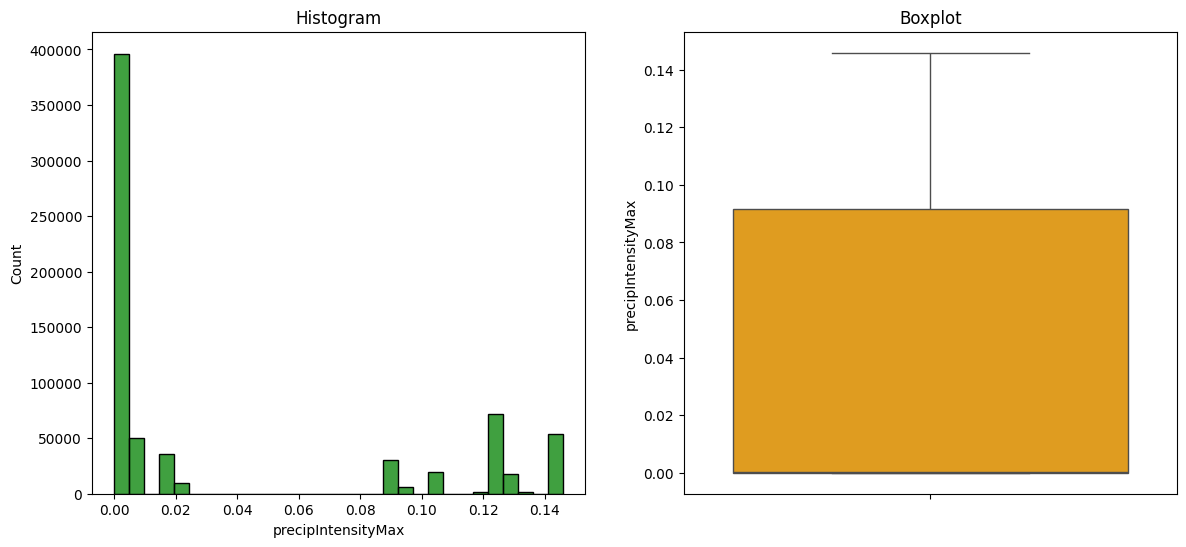

<Figure size 1400x600 with 0 Axes>

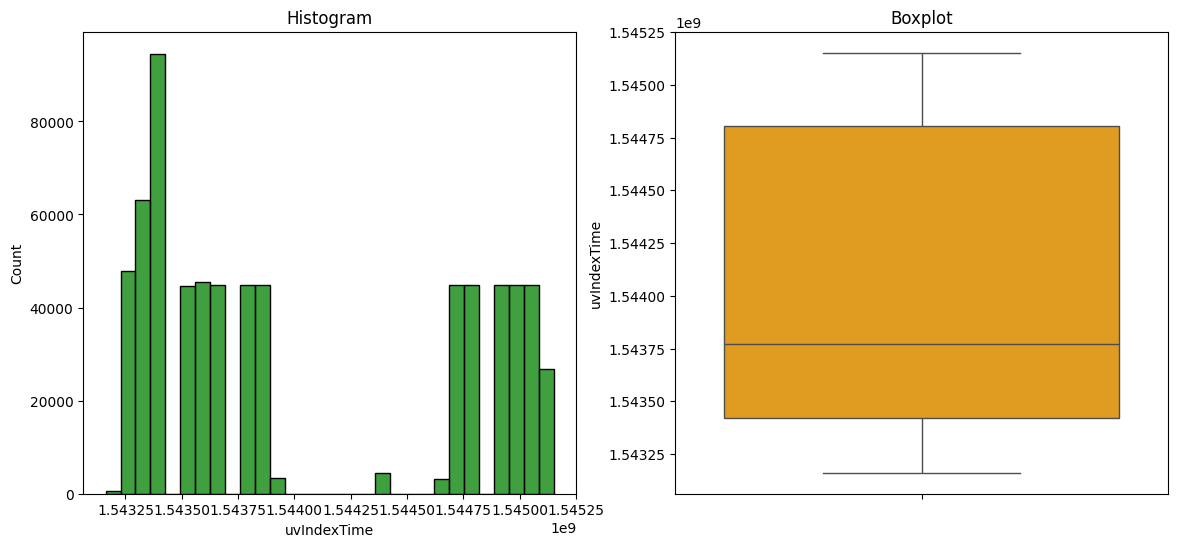

<Figure size 1400x600 with 0 Axes>

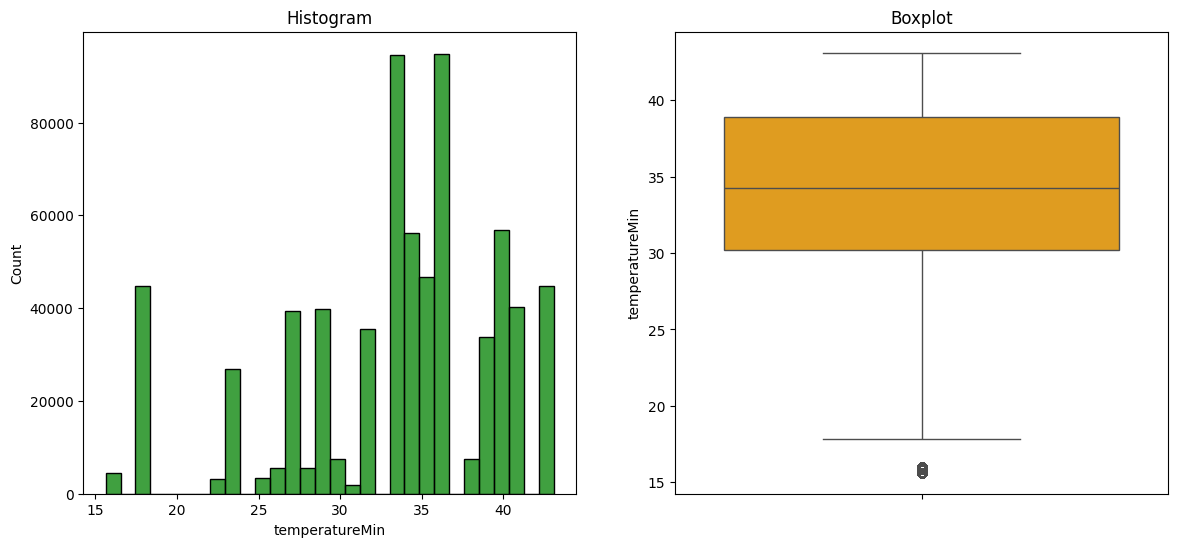

<Figure size 1400x600 with 0 Axes>

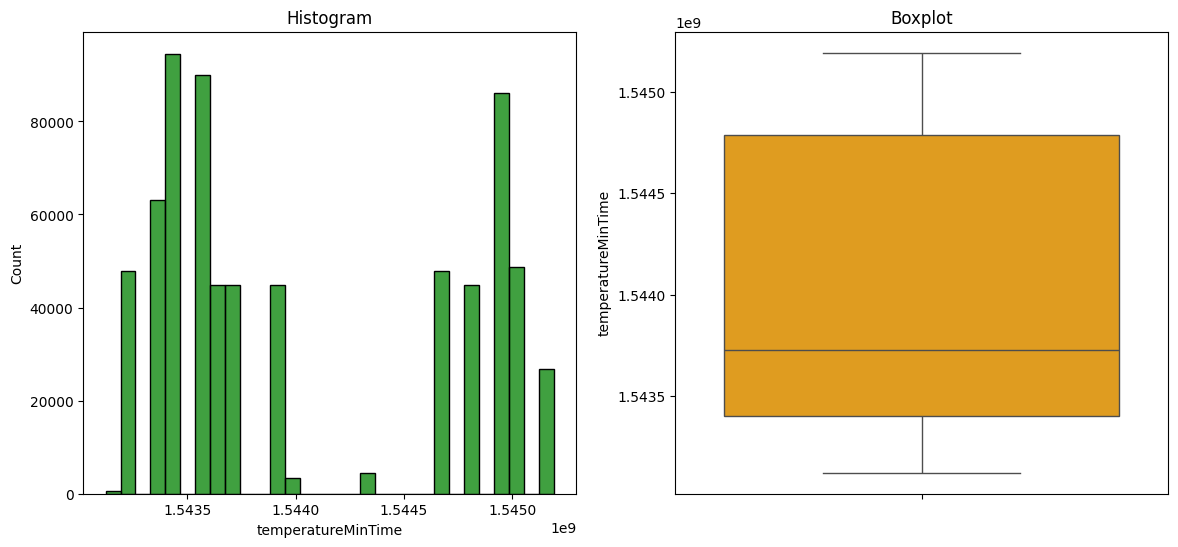

<Figure size 1400x600 with 0 Axes>

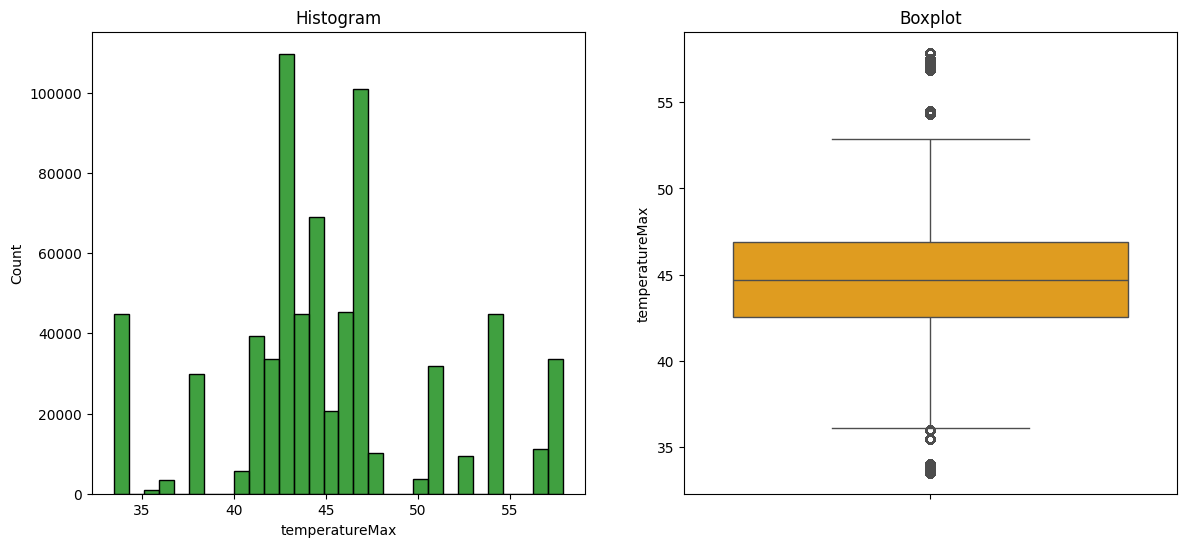

<Figure size 1400x600 with 0 Axes>

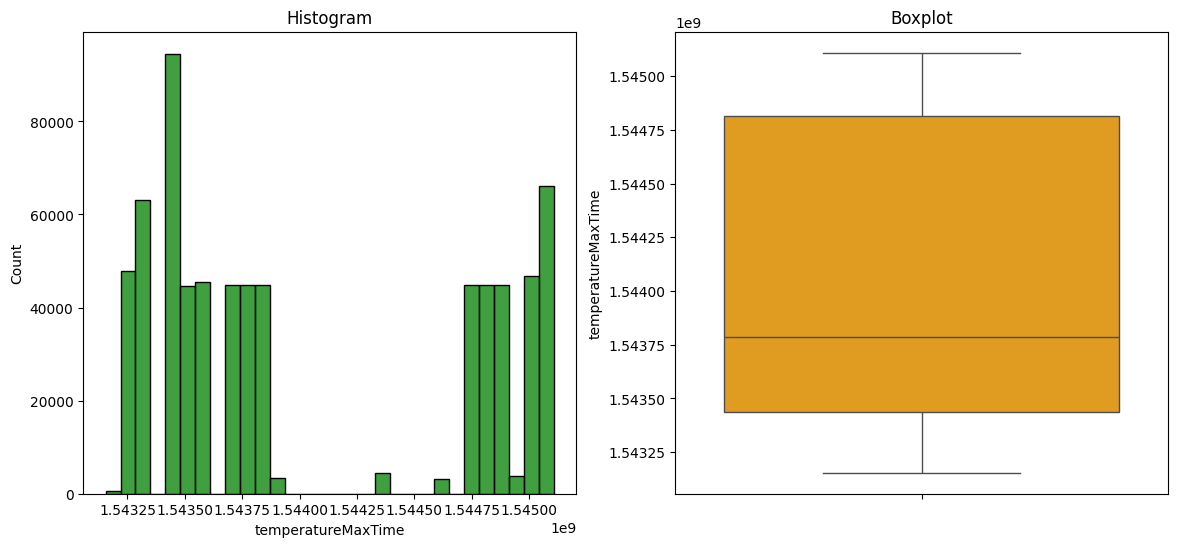

<Figure size 1400x600 with 0 Axes>

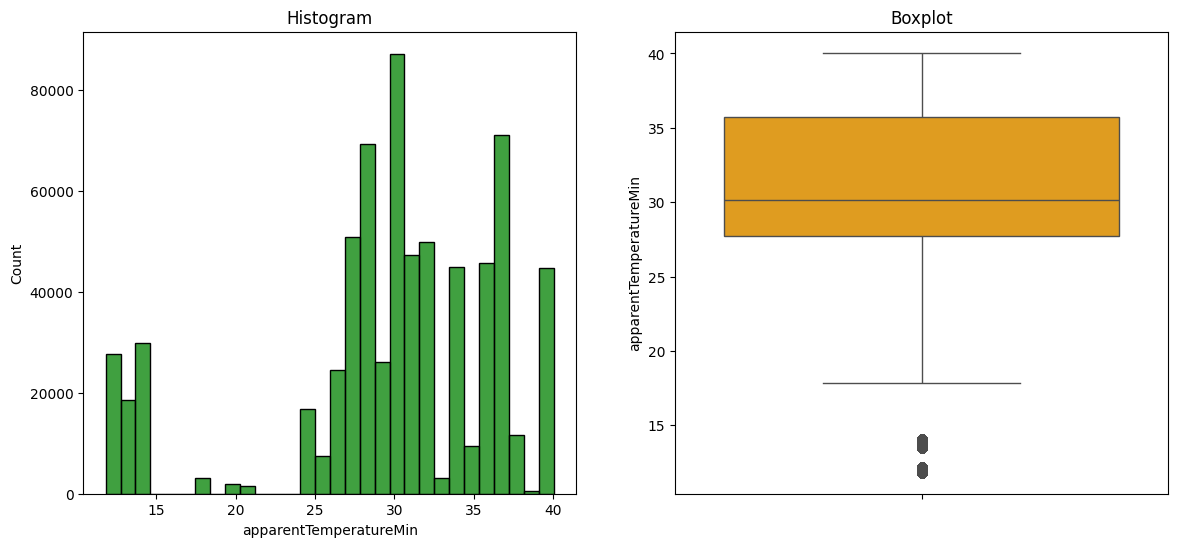

<Figure size 1400x600 with 0 Axes>

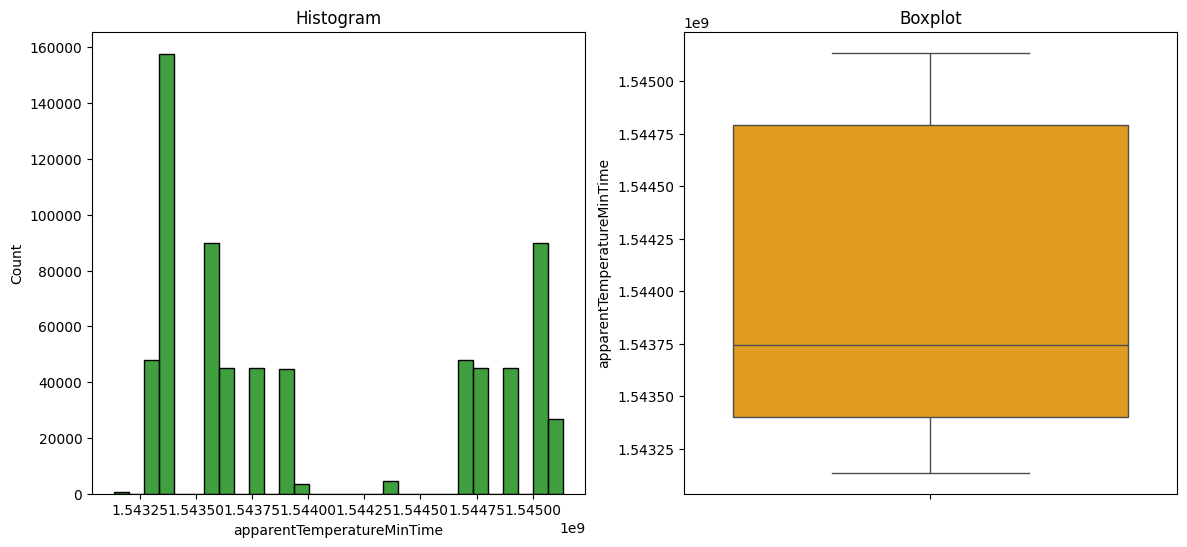

<Figure size 1400x600 with 0 Axes>

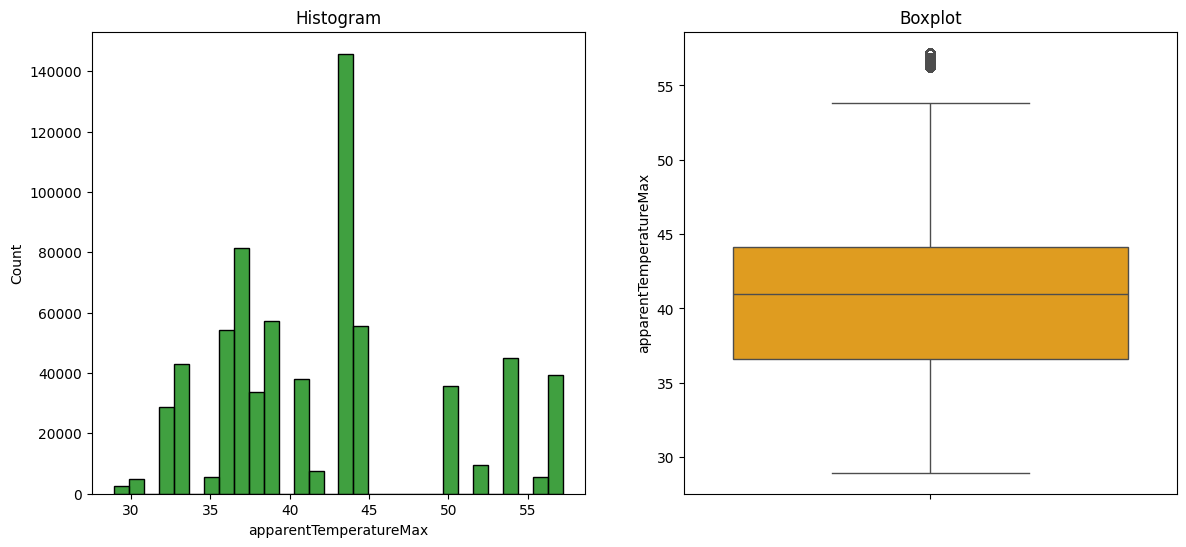

<Figure size 1400x600 with 0 Axes>

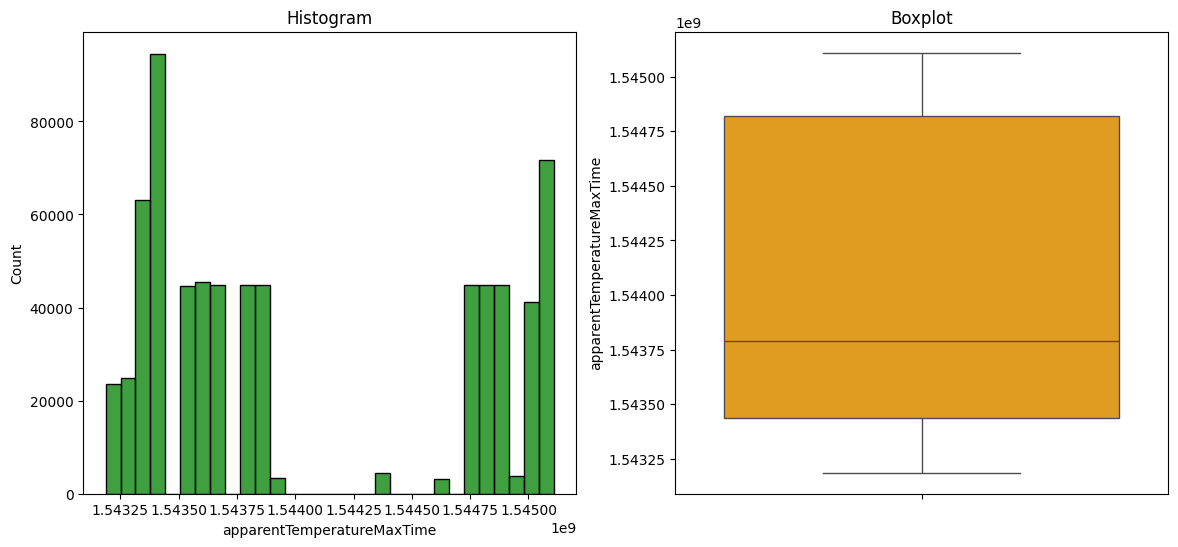

<Figure size 1400x600 with 0 Axes>

In [33]:
for kolom in num_column:
    # Panggil fungsi diagnostic_plots untuk membuat boxplot dan histogram untuk kolom saat ini
    diagnostic_plots(df, kolom)
    # Define figure size
    plt.figure(figsize=(14,6))

Kesimpulan

Dari gambar diatas kita sudah melihat kolom apa saja yang meiliki outlier dari yang extreme sampai yang tidak memiliki outlier sama sekali. Langkah - langkah yang di lakukan :

* Untuk menghilangkan outlier, langkah pertama yang dilakukan adalah menghitung nilai skewness pada setiap kolom data numerik. Setelah nilai skewness diperoleh, hasilnya kemudian dianalisis untuk menggolongkan apakah distribusi data pada setiap kolom termasuk distribusi normal (simetris) atau distribusi miring (skewed). Distribusi normal ditandai dengan nilai skewness yang mendekati nol, sementara distribusi miring ditandai dengan nilai skewness yang jauh dari nol, baik positif maupun negatif.

* Berdasarkan analisis ini, kita akan mendapatkan daftar kolom yang memiliki distribusi normal dan kolom yang memiliki distribusi miring. Kolom-kolom dengan distribusi normal tidak memerlukan tindakan khusus, sementara kolom-kolom dengan distribusi miring mungkin perlu dilakukan uji statistik mendalam

In [34]:
# Inisialisasi list untuk menyimpan kolom dengan distribusi normal dan skewed
distribusi_normal = []
distribusi_skewed = []

# Mengiterasi melalui kolom-kolom numerikal
for kolom in num_column:
    # Hitung skewness dari kolom saat ini
    skewness = X_train[kolom].skew()
    
    # Tambahkan kolom ke list yang sesuai dengan distribusi skewnessnya
    if -0.5 <= skewness <= 0.5:
        distribusi_normal.append(kolom)
    else:
        distribusi_skewed.append(kolom)

# Print kolom dengan distribusi normal dan skewed
print("Kolom dengan distribusi normal:")
print(distribusi_normal)
print("\nKolom dengan distribusi skewed/miring:")
print(distribusi_skewed)

Kolom dengan distribusi normal:
['timestamp', 'hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']

Kolom dengan distribusi skewed/miring:
['distance', 'surge_multiplier', 'latitude', 'temperature', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMin', 'apparentTemperatureMax']


Metode handling outlier **censoring** berikut alasannya :
- Dipilihnya metode capping karena nilai-nilai outlier dipotong sehingga tidak melebihi batas tersebut. Dengan kata lain, tidak menghilangkan data pada dataset tetapi hanya memotong yang melebihi batas.

- 4 kolom yang kita lakukan capping terdiri dari :
1. surge_multiplier
2. precipIntensity 
3. precipProbability 
4. uvIndex 

memiliki skewed distribution yang tidak bisa dihitung menggunakan metode IQR karena kolom-kolom tersebut memiliki variansi yang rendah. Oleh karena itu, dilakukan capping menggunakan metode iqe dan gaussian. Alasan memilih metode ini adalah :
1. Metode ini mudah diimplementasikan dan cepat dalam penghitungan, sehingga sering digunakan dalam eksplorasi data awal dan pembersihan data
2. Gaussian dipilih untuk data yang cenderung mengikuti distribusi normal dan ketika diperlukan analisis statistik lanjutan

Visualisasi Distribusi Sebelum dan Sesudah Capping - Kolom dengan distribusi skewed:

distance - Sebelum Capping


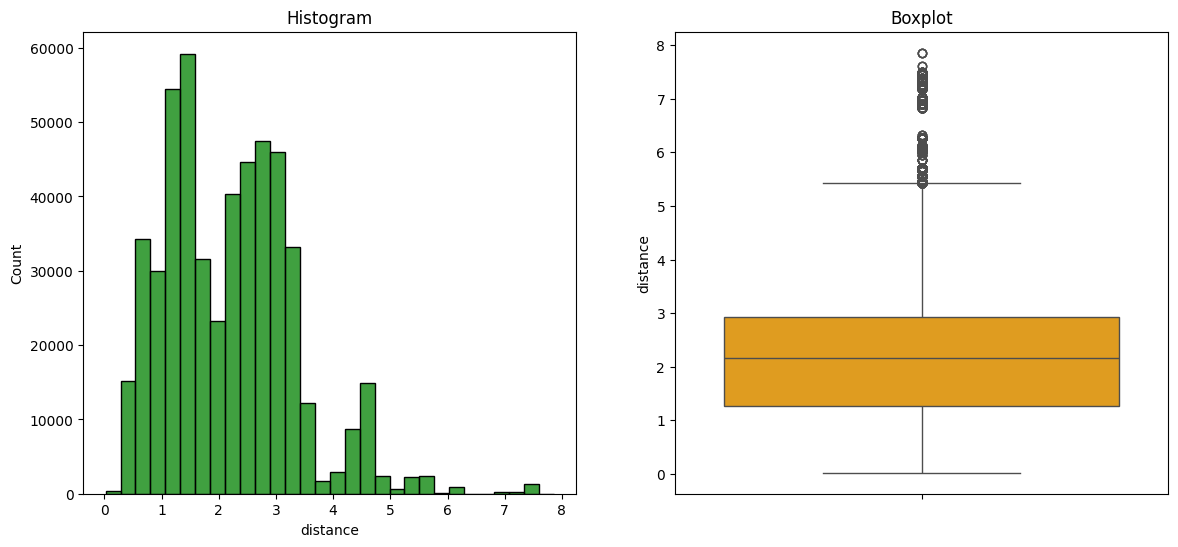


distance - Sesudah Capping


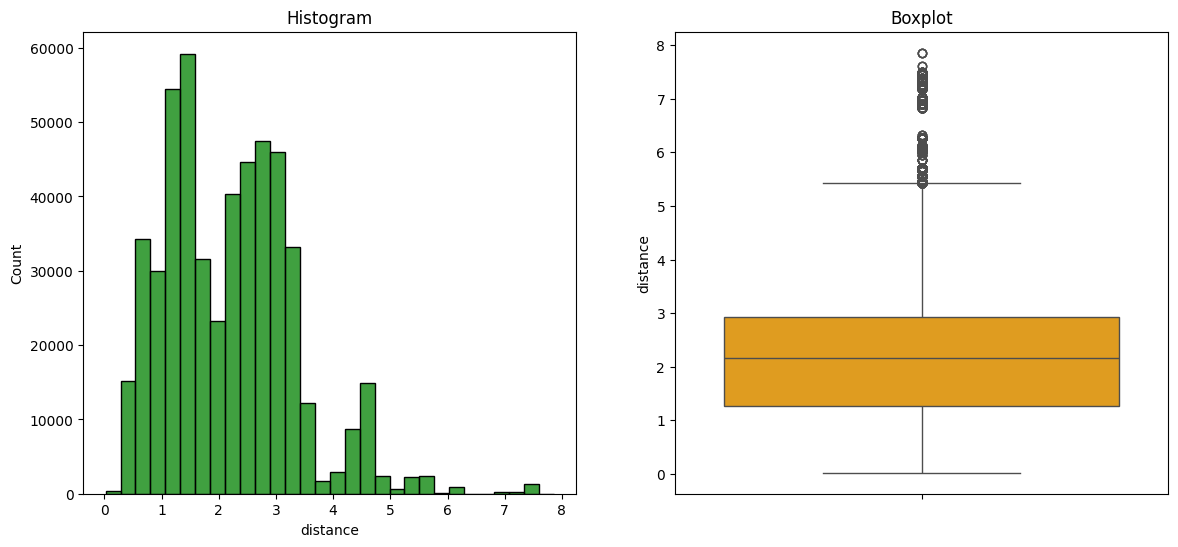


latitude - Sebelum Capping


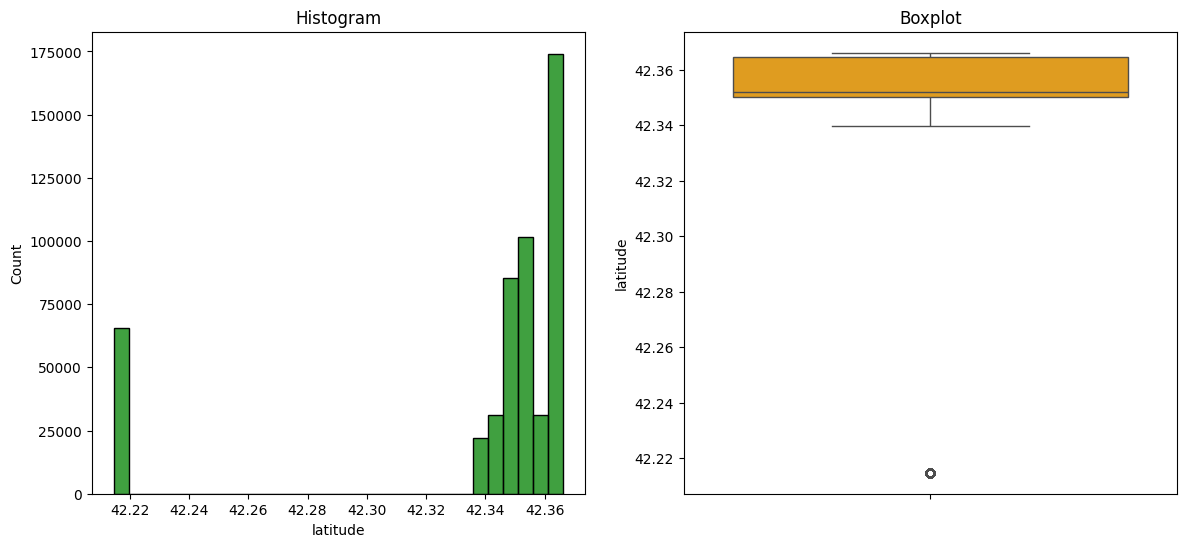


latitude - Sesudah Capping


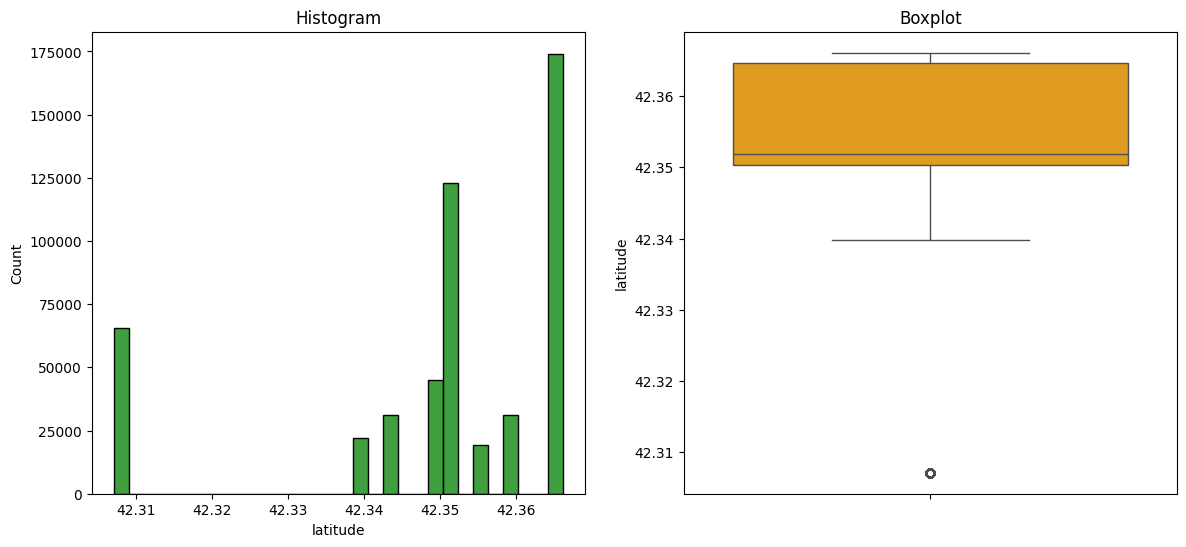


temperature - Sebelum Capping


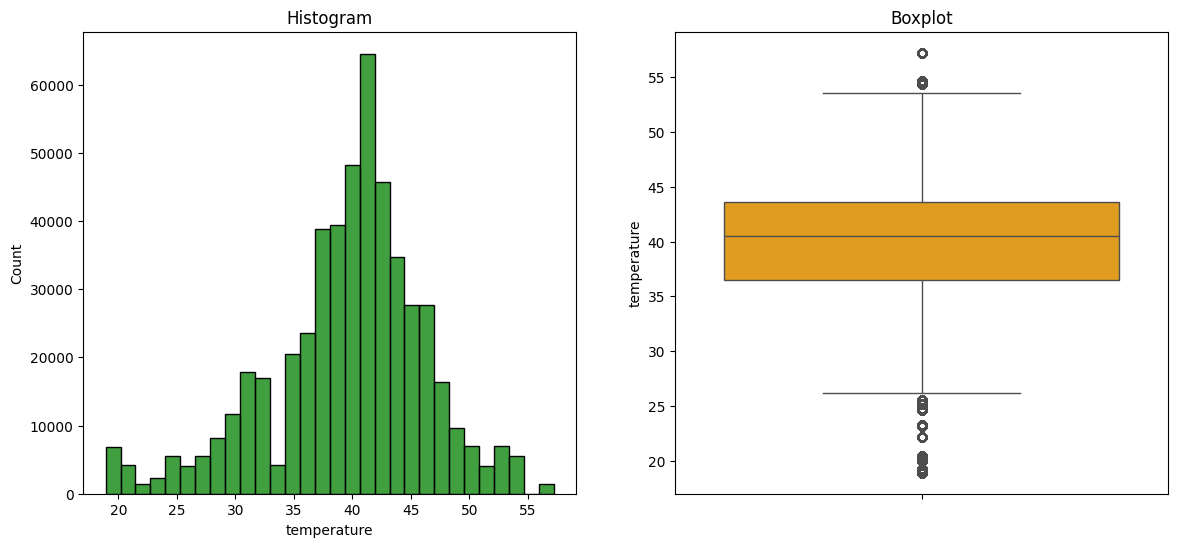


temperature - Sesudah Capping


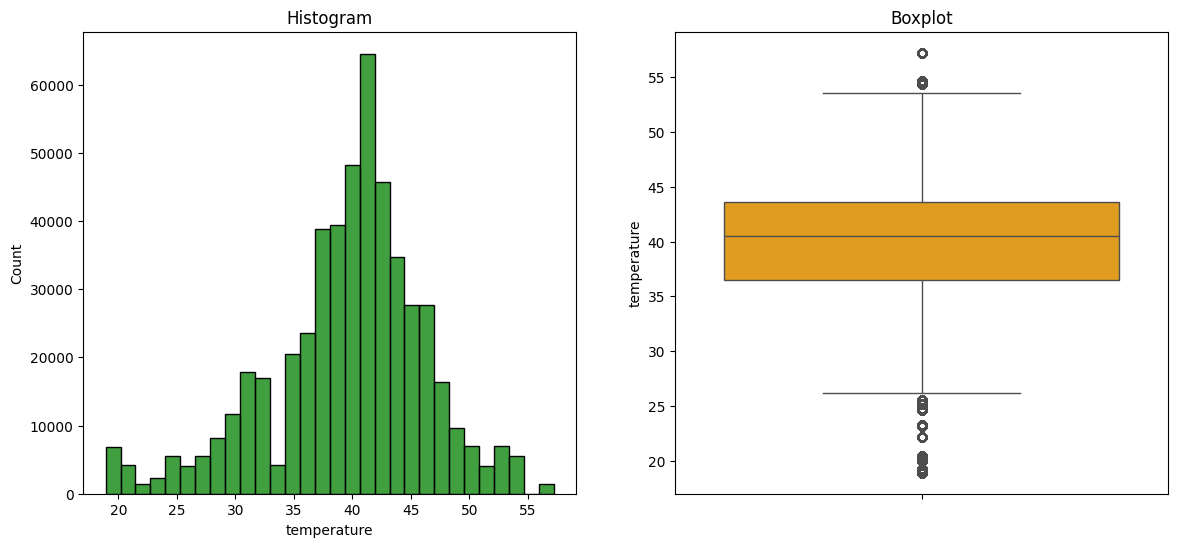


windGust - Sebelum Capping


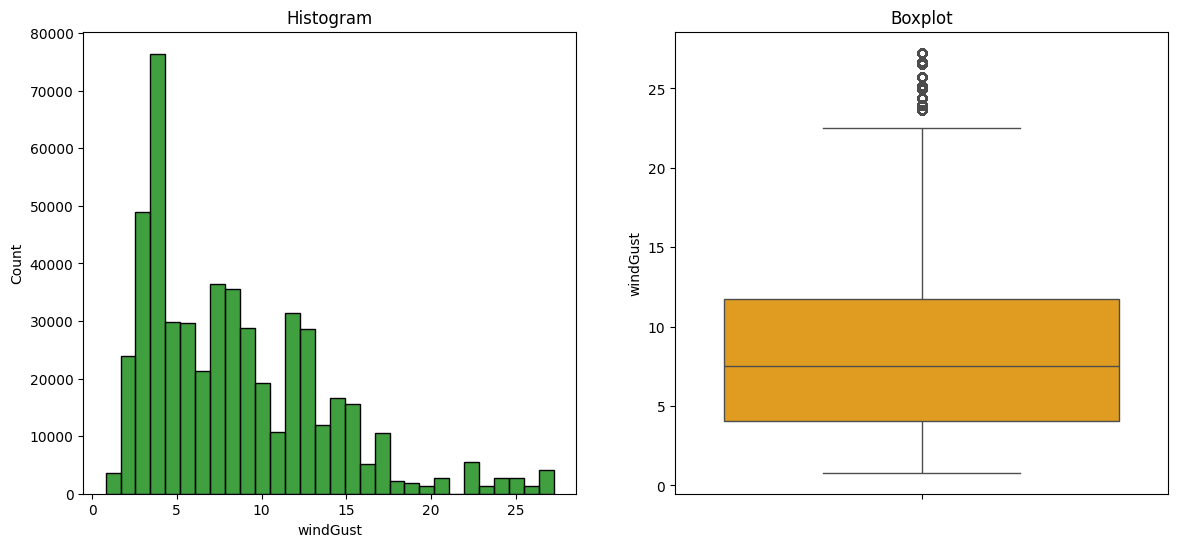


windGust - Sesudah Capping


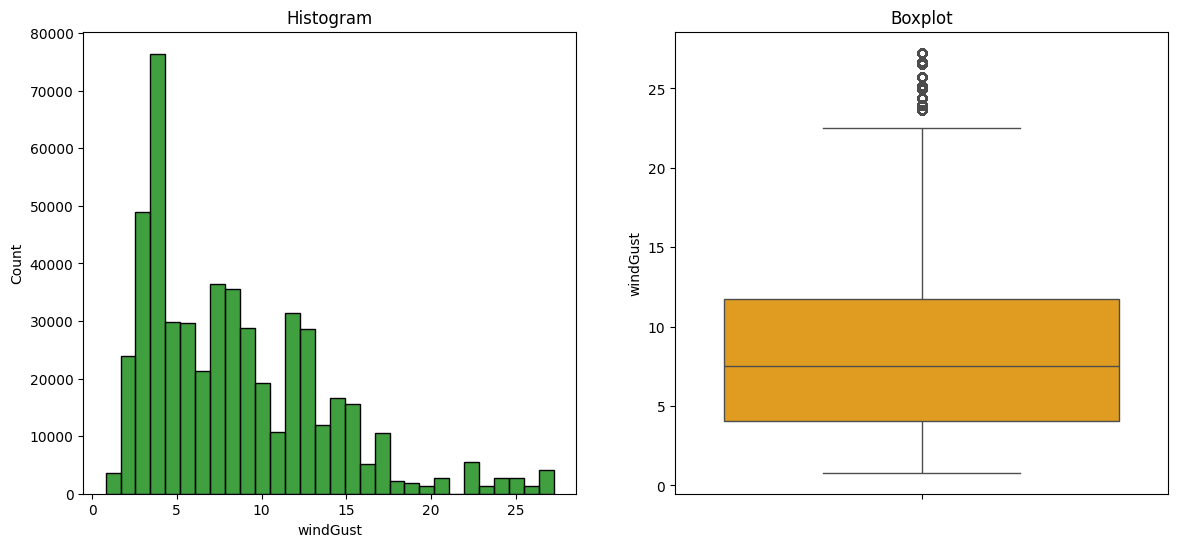


visibility - Sebelum Capping


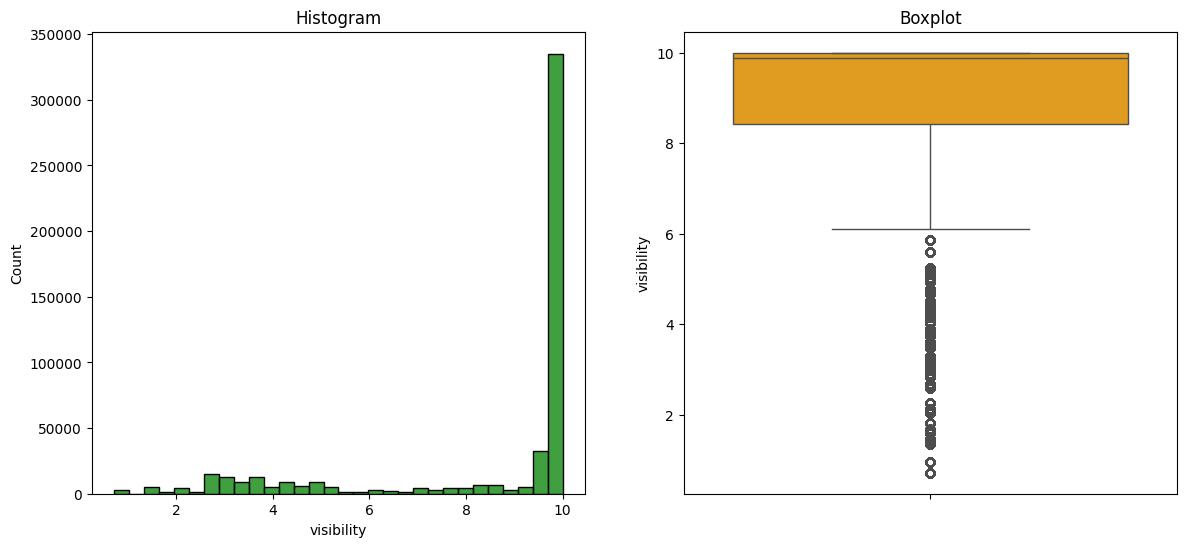


visibility - Sesudah Capping


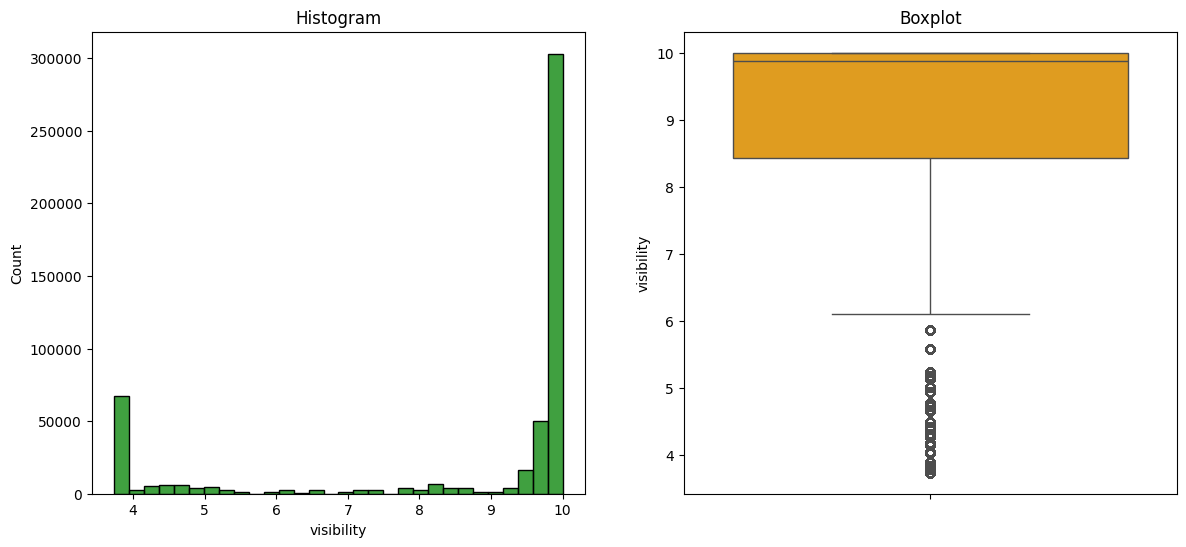


apparentTemperatureLow - Sebelum Capping


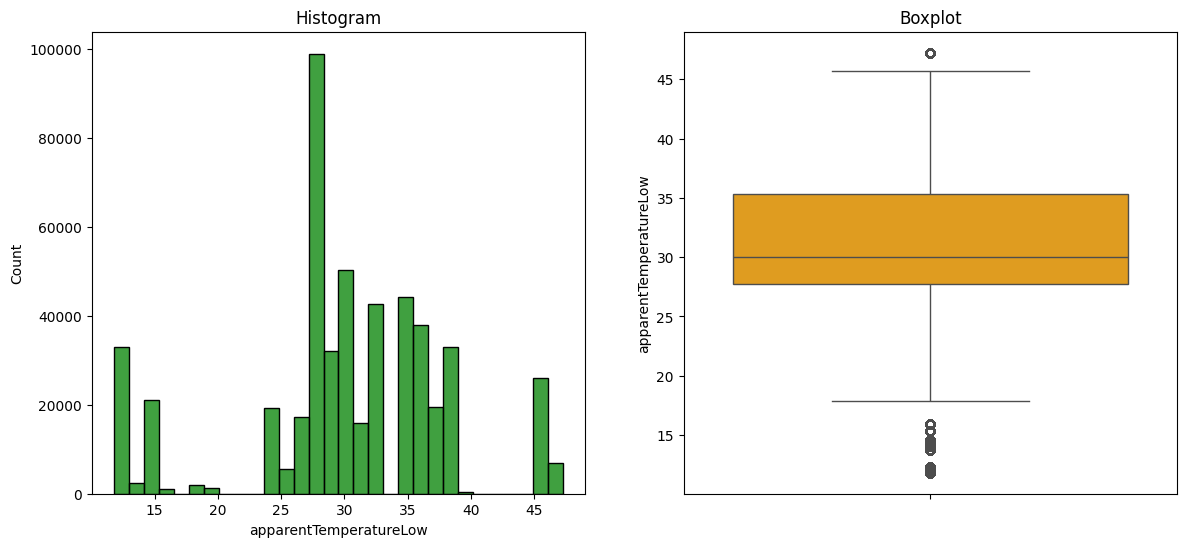


apparentTemperatureLow - Sesudah Capping


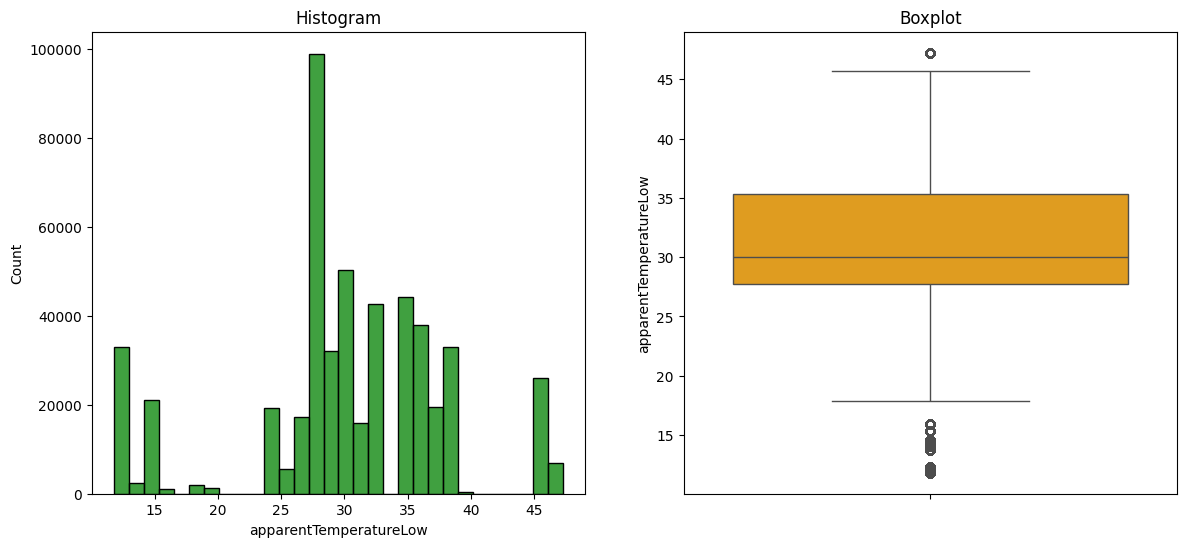


windBearing - Sebelum Capping


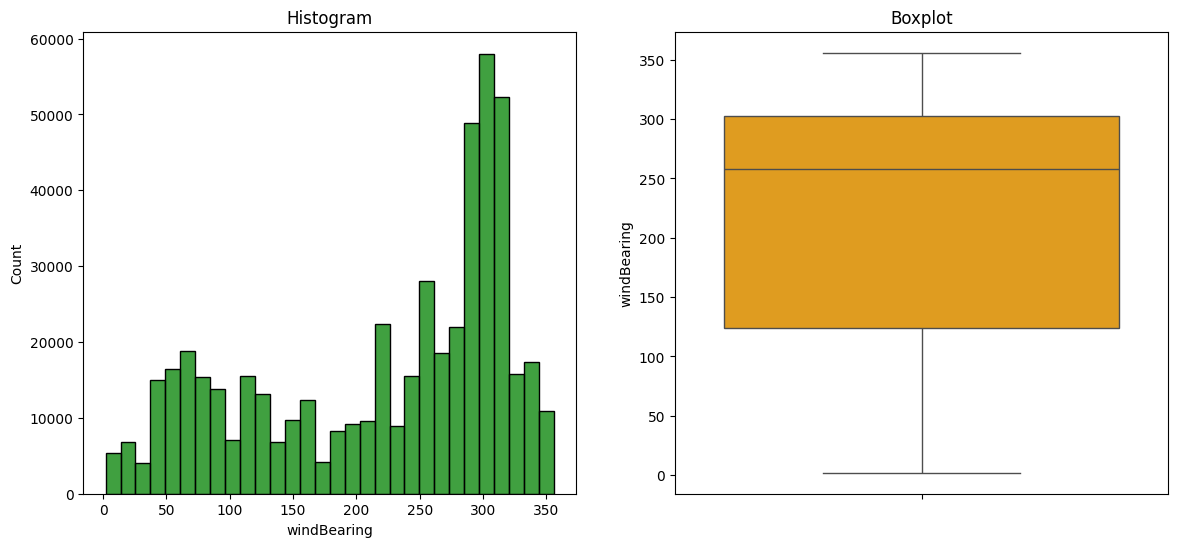


windBearing - Sesudah Capping


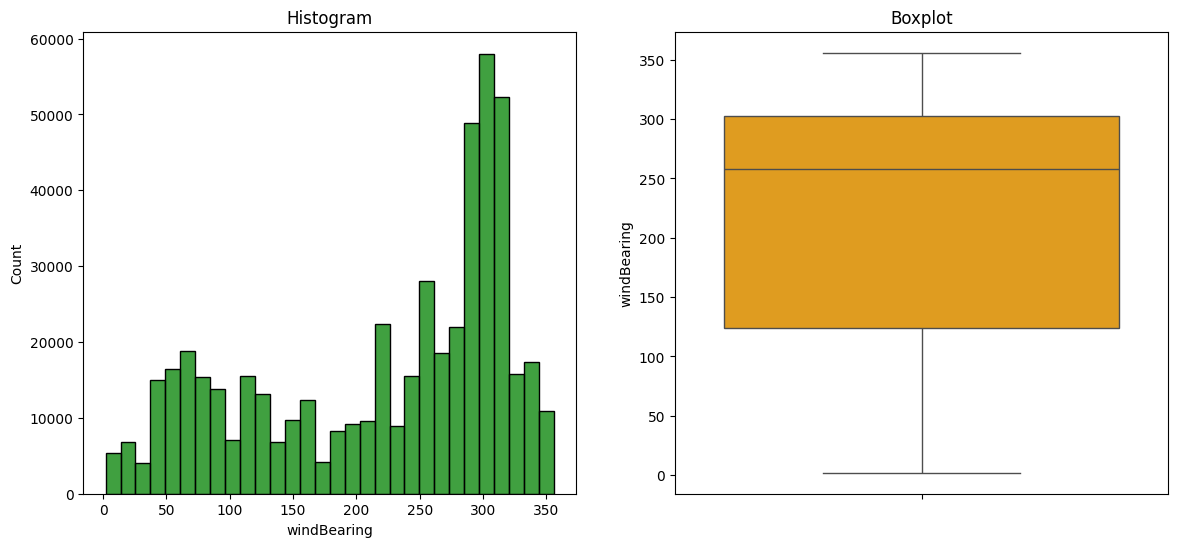


cloudCover - Sebelum Capping


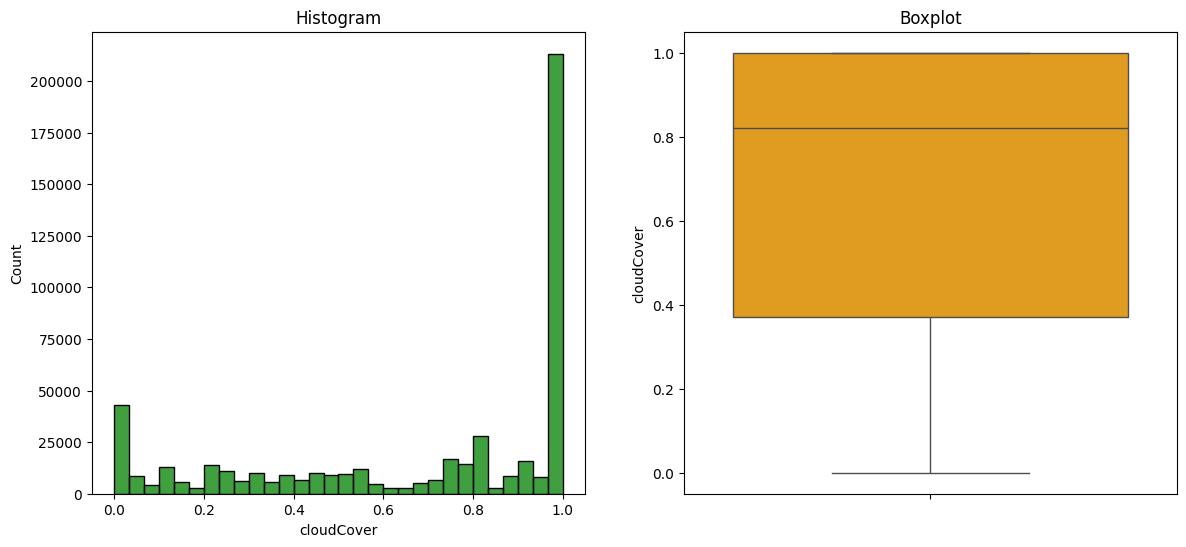


cloudCover - Sesudah Capping


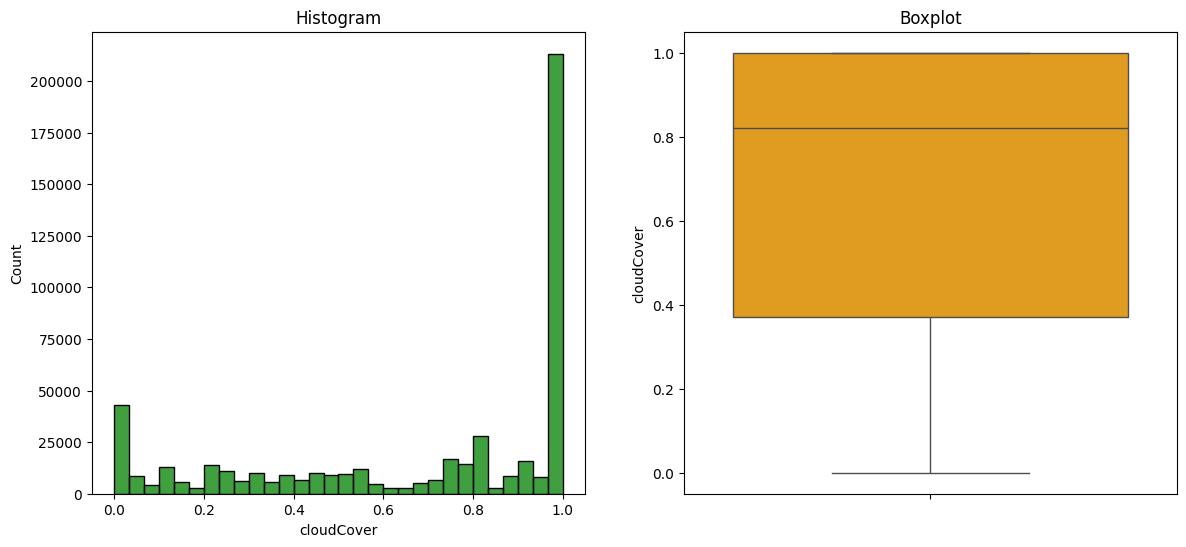


visibility.1 - Sebelum Capping


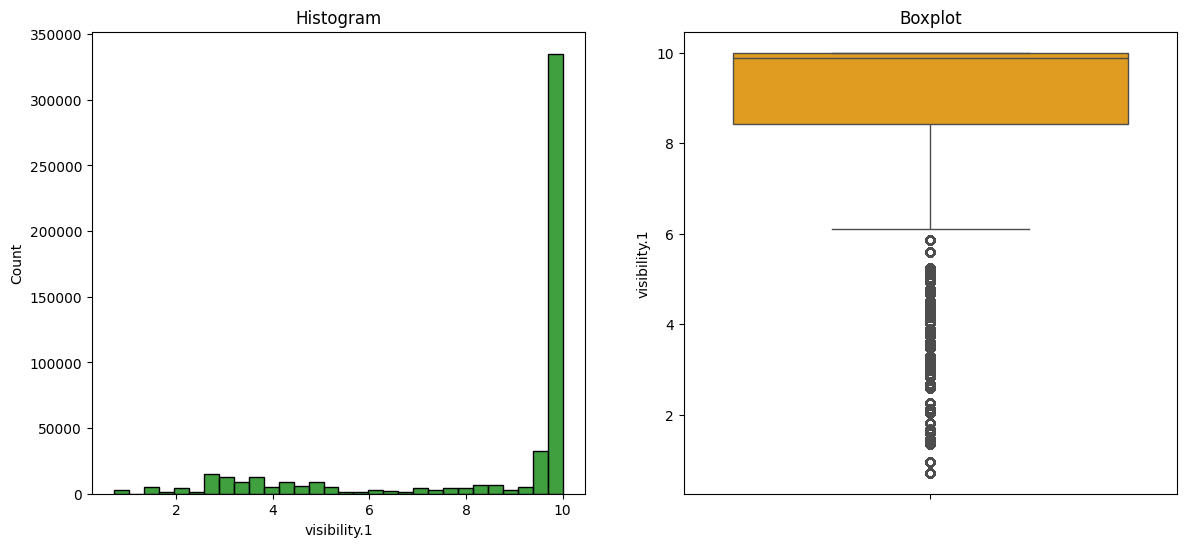


visibility.1 - Sesudah Capping


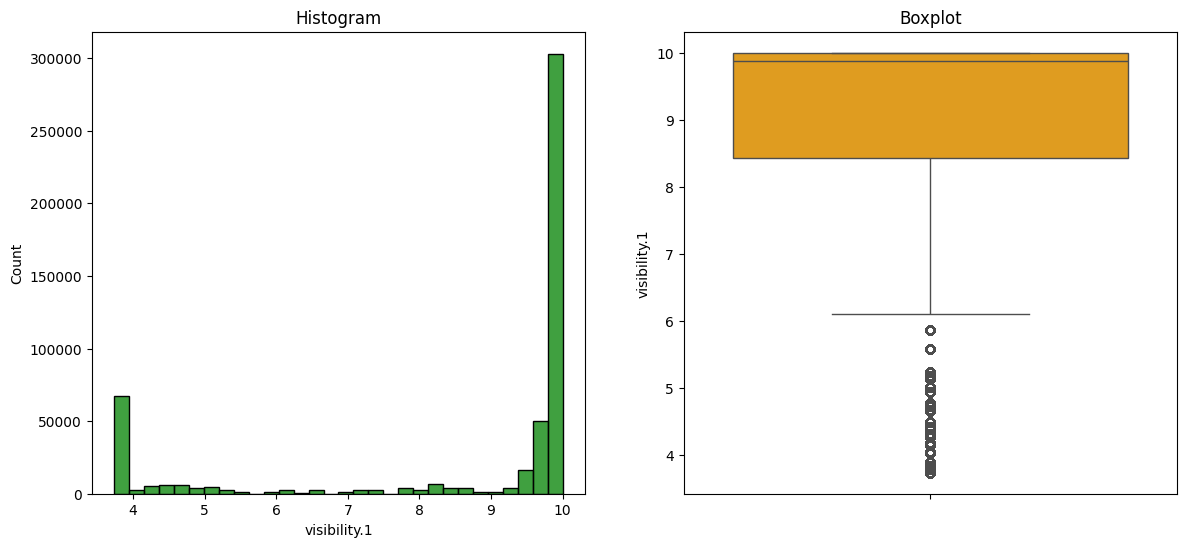


precipIntensityMax - Sebelum Capping


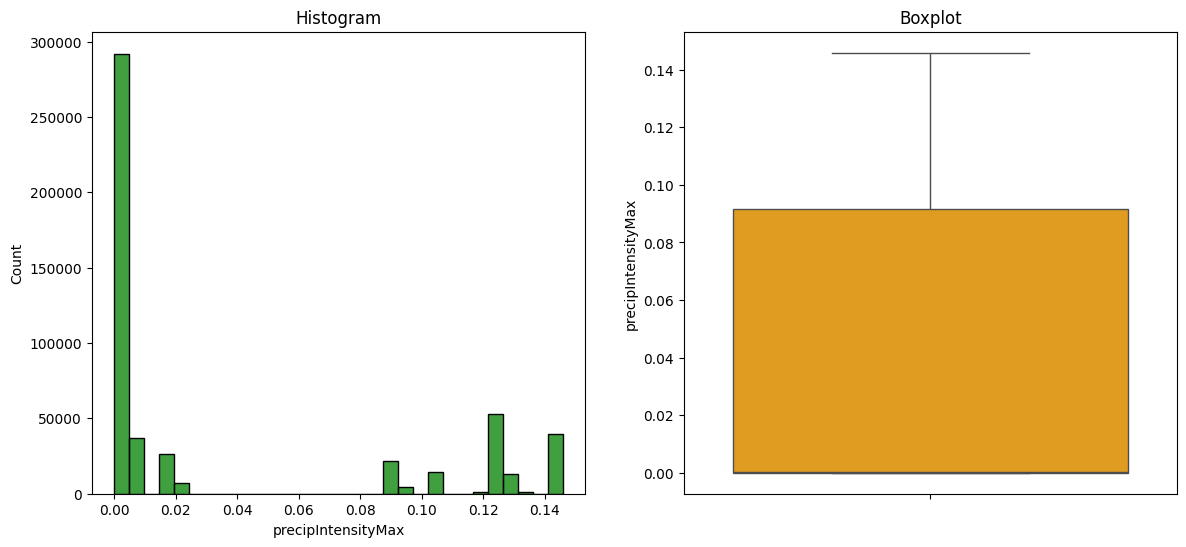


precipIntensityMax - Sesudah Capping


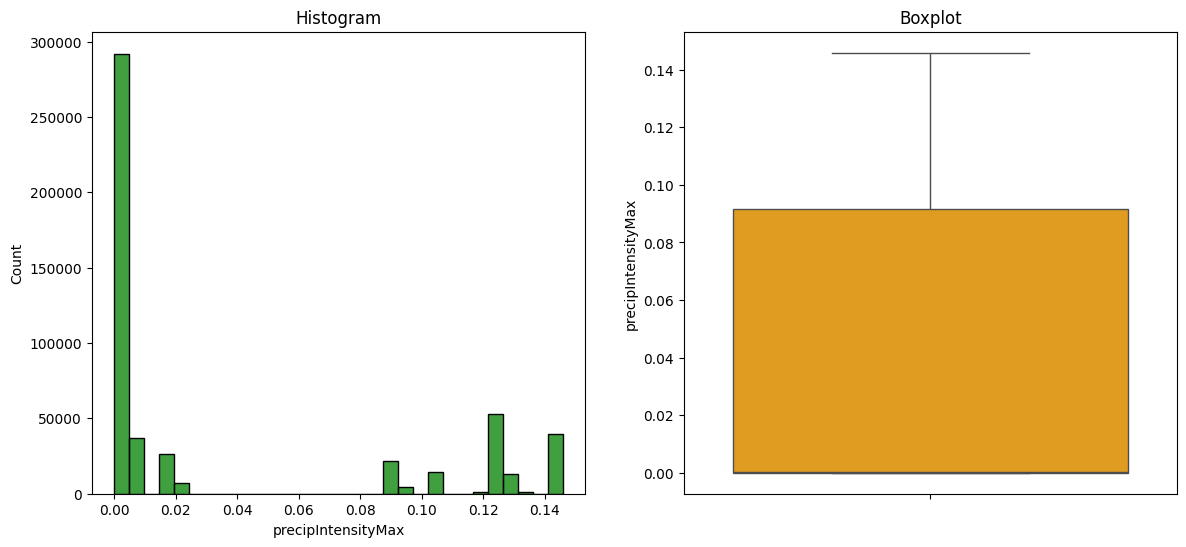


temperatureMin - Sebelum Capping


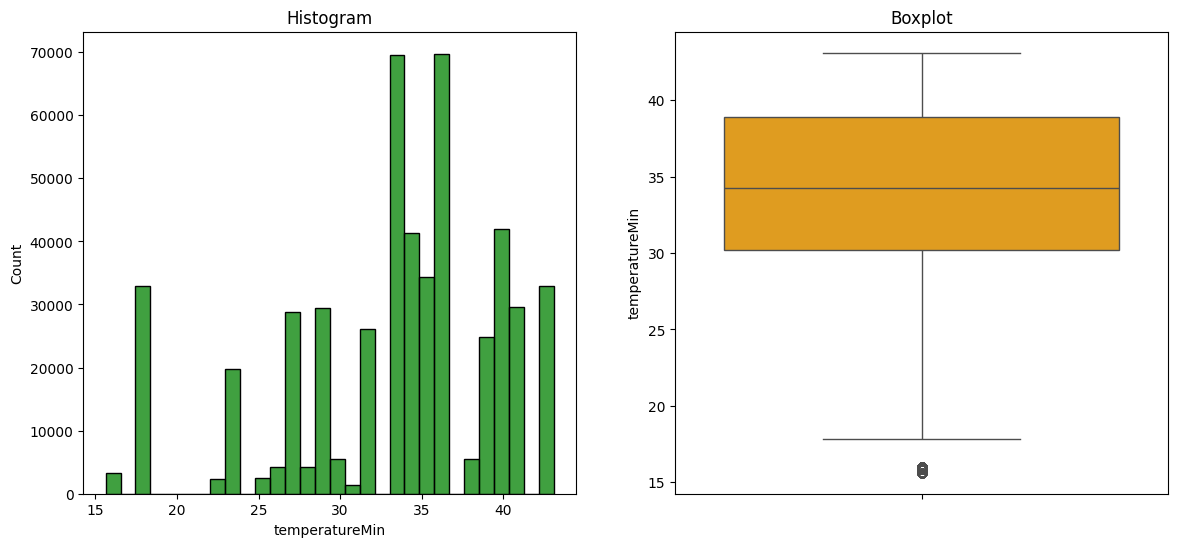


temperatureMin - Sesudah Capping


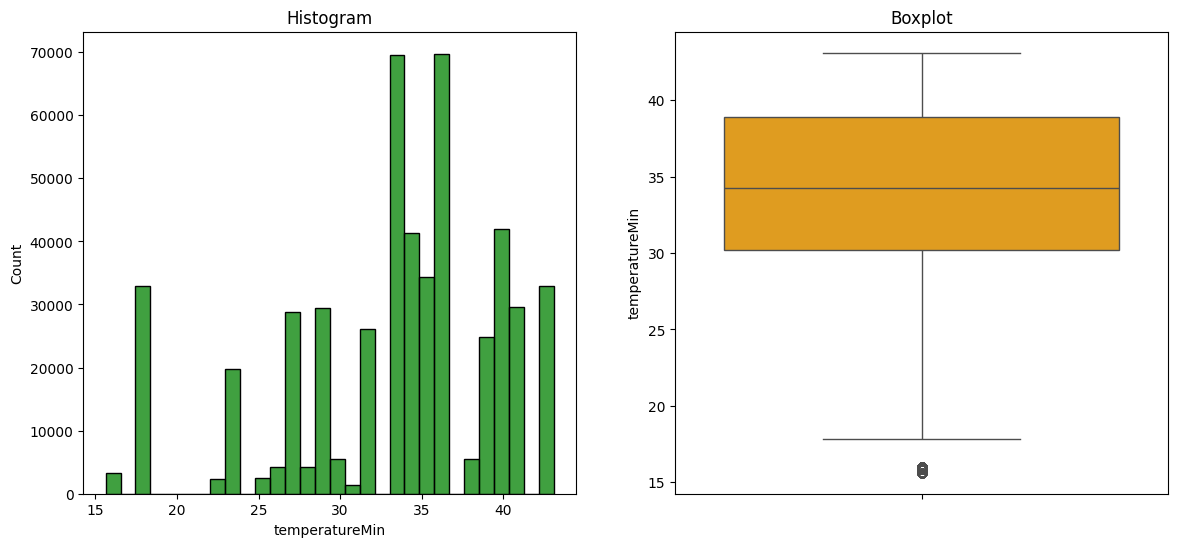


apparentTemperatureMin - Sebelum Capping


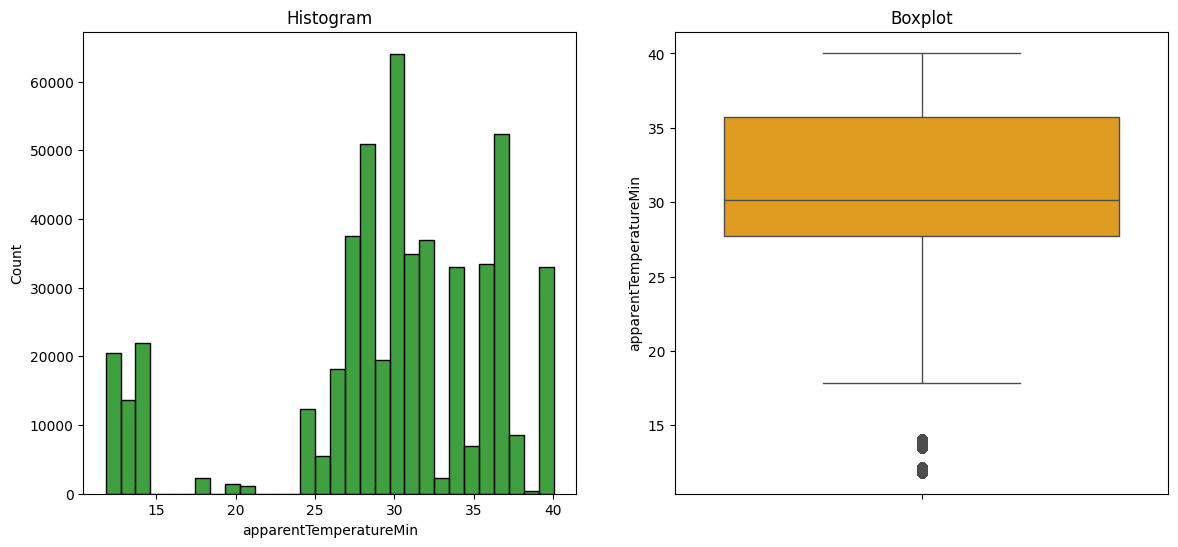


apparentTemperatureMin - Sesudah Capping


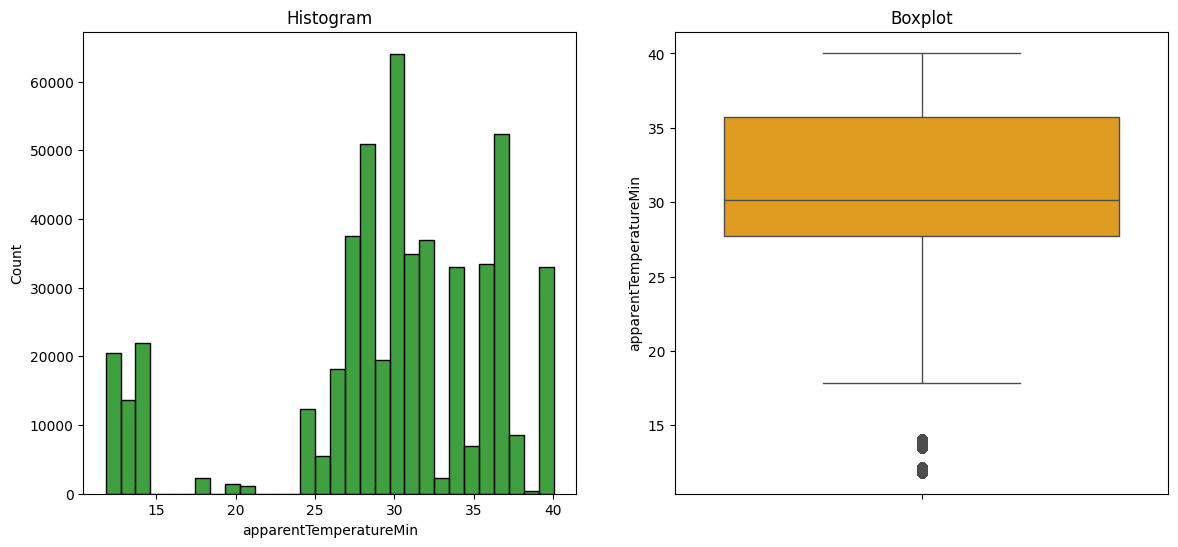


apparentTemperatureMax - Sebelum Capping


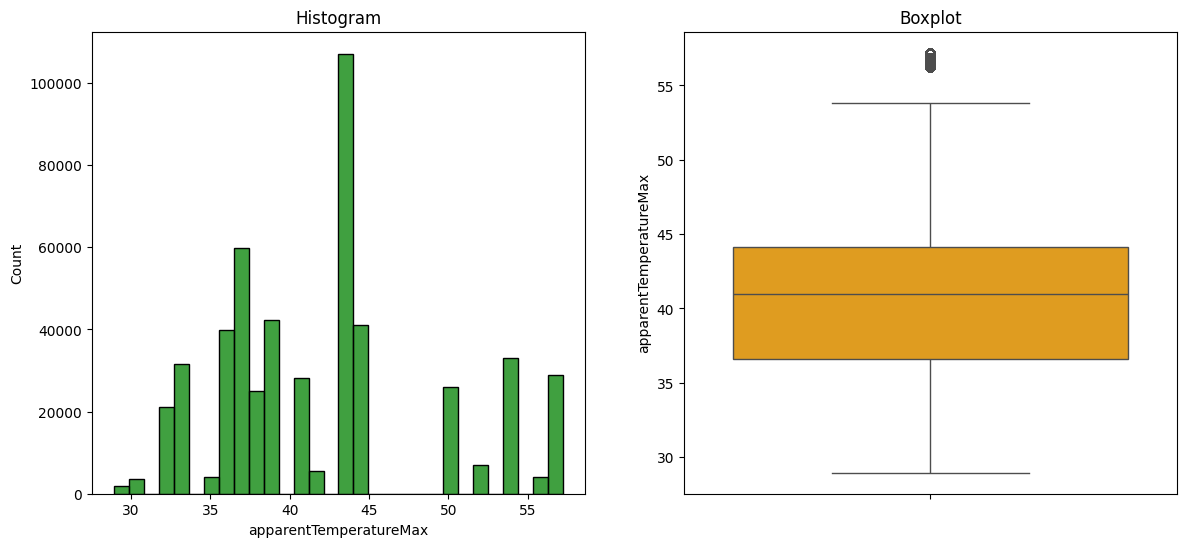


apparentTemperatureMax - Sesudah Capping


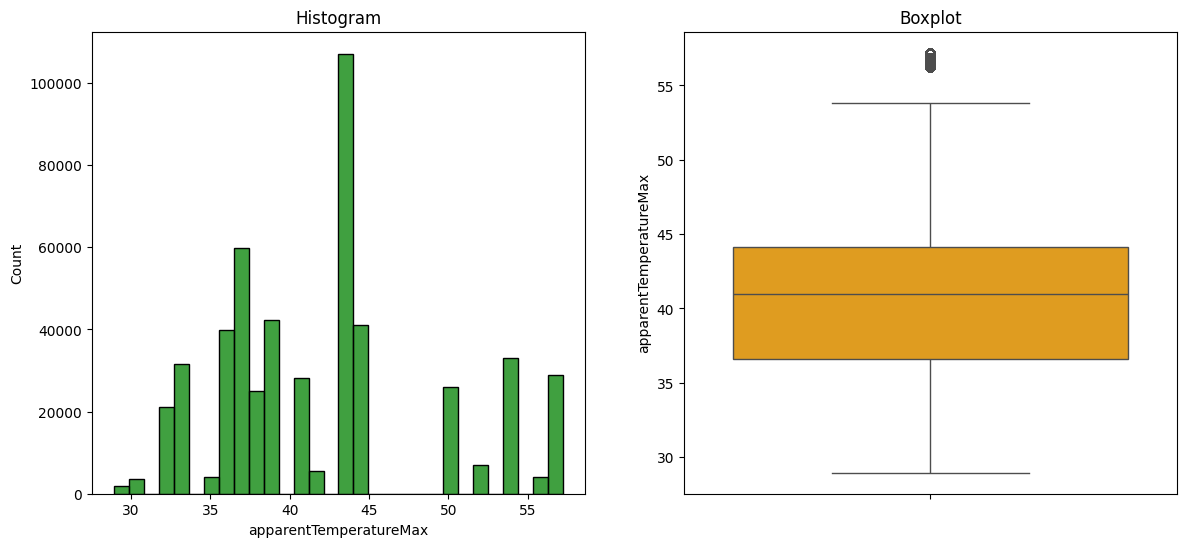

Visualisasi Distribusi Sebelum dan Sesudah Capping - Kolom dengan distribusi normal:

timestamp - Sebelum Capping


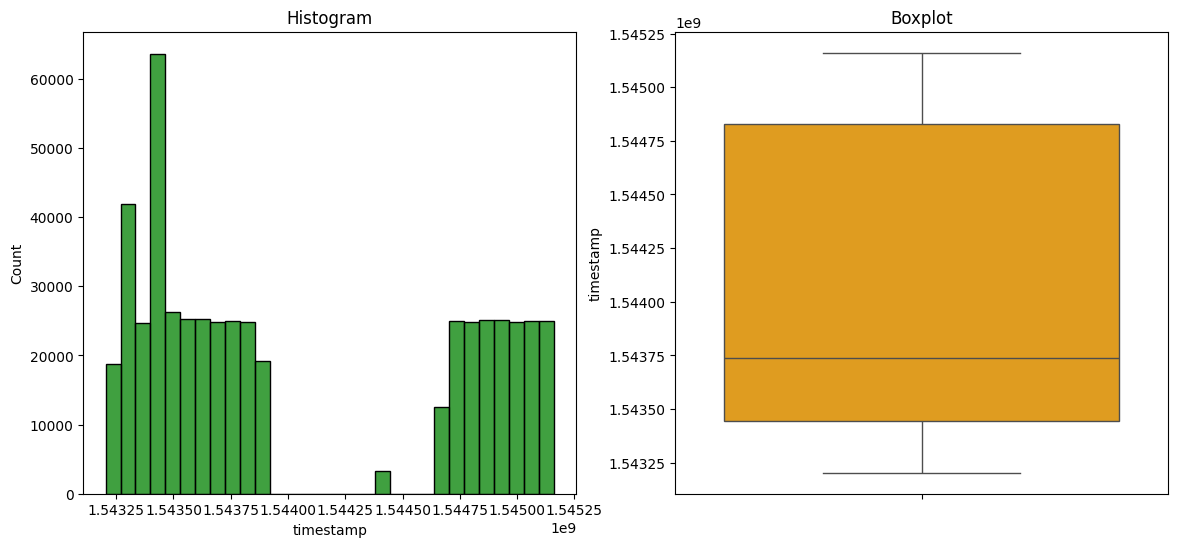


timestamp - Sesudah Capping


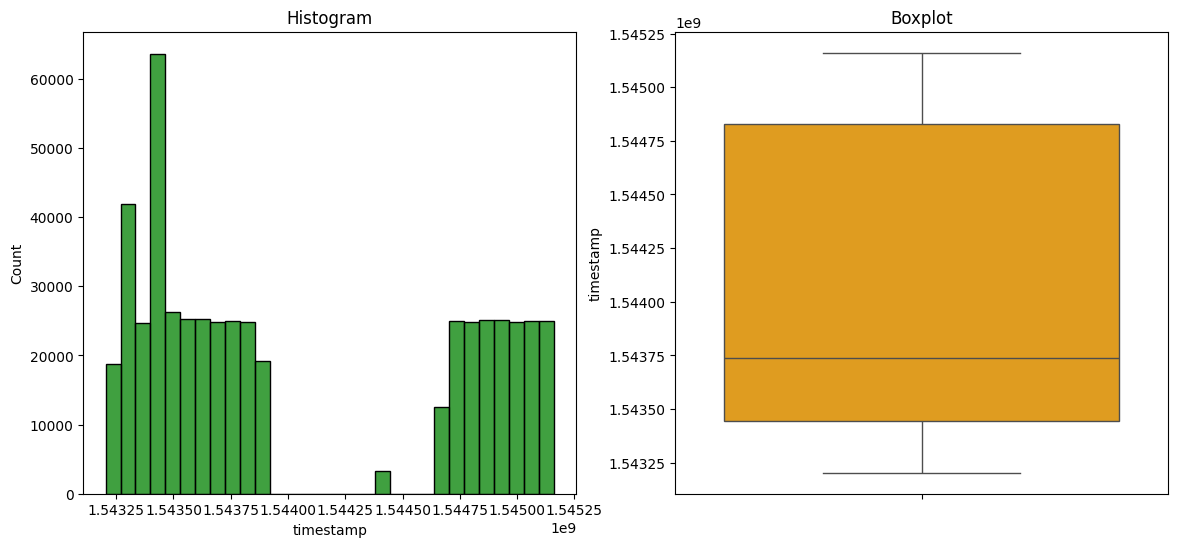


hour - Sebelum Capping


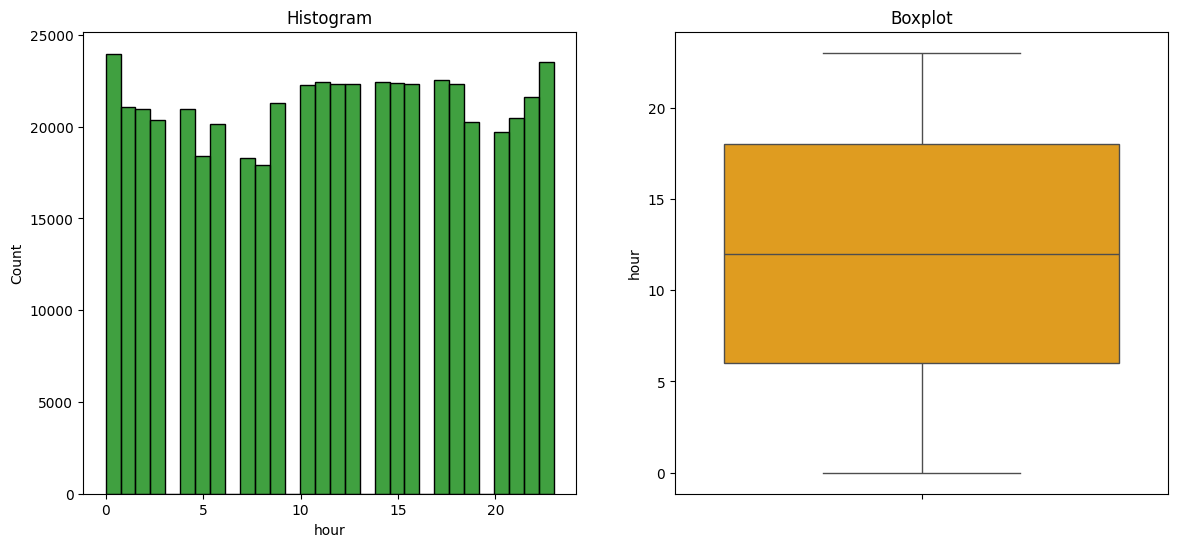


hour - Sesudah Capping


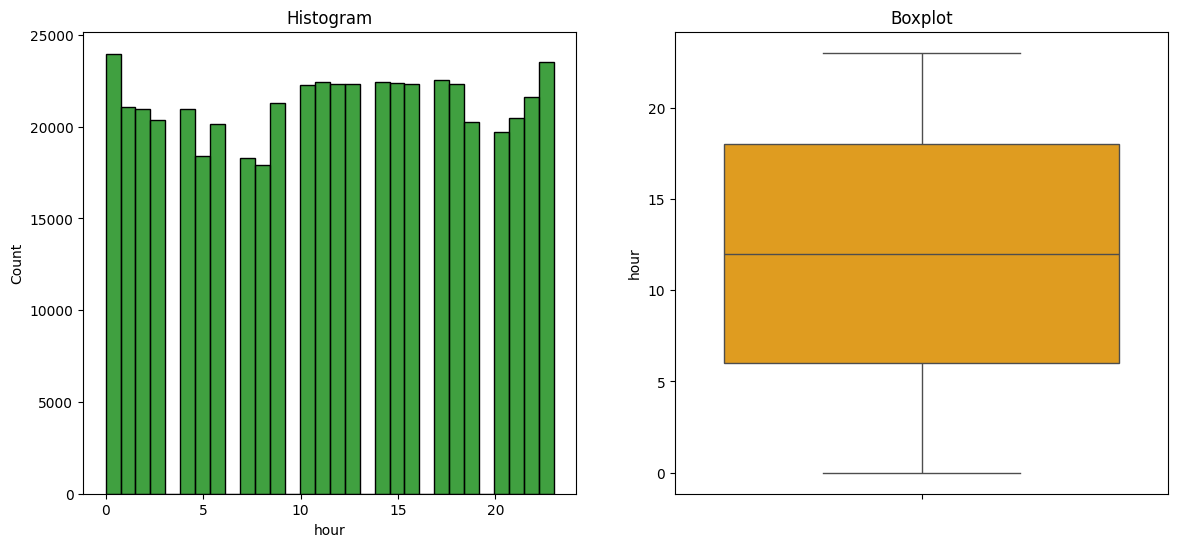


day - Sebelum Capping


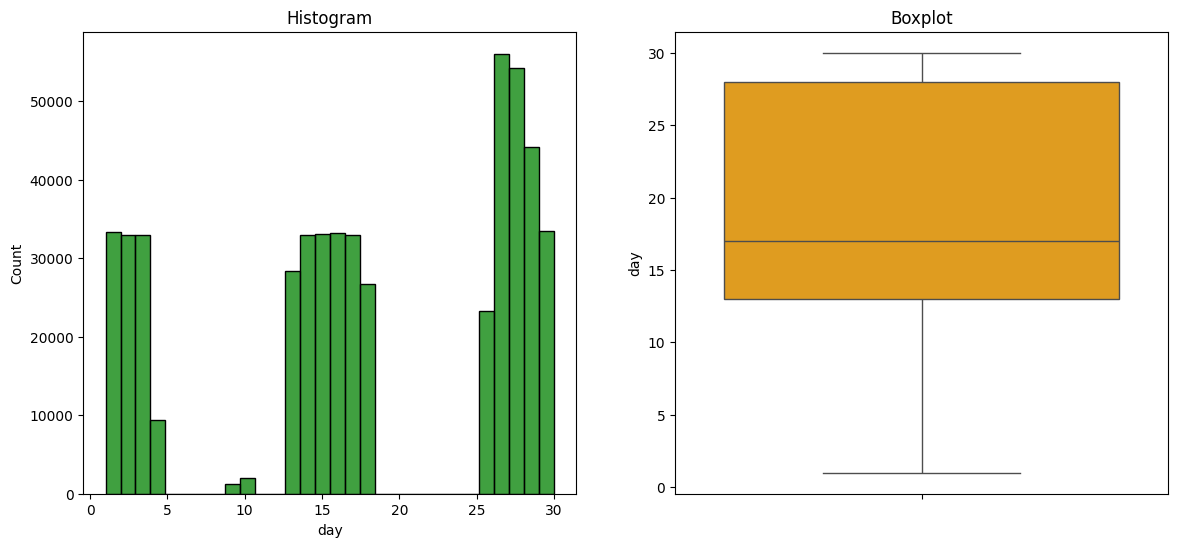


day - Sesudah Capping


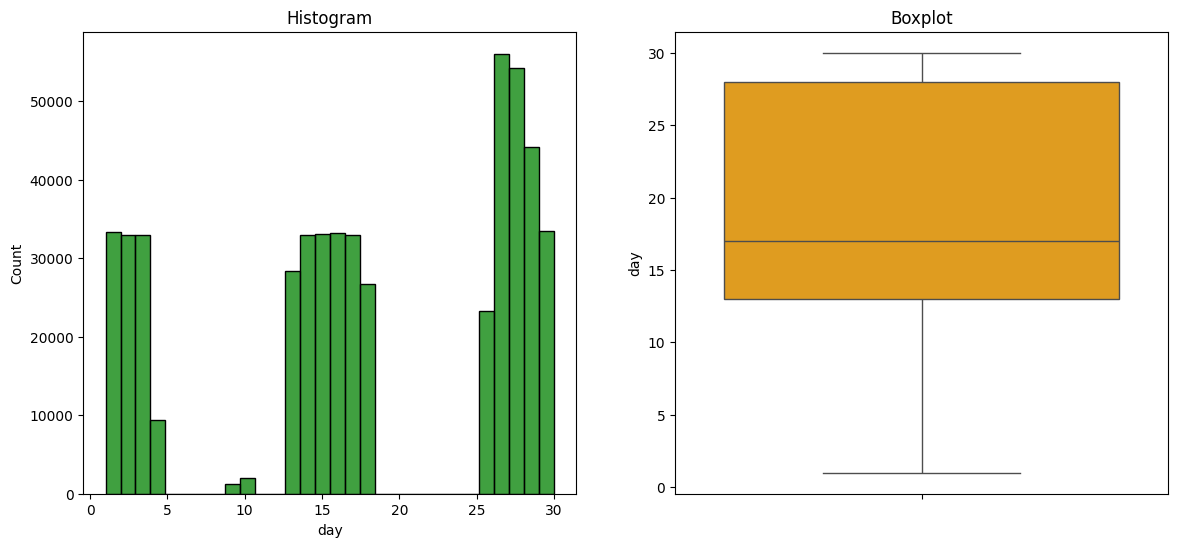


month - Sebelum Capping


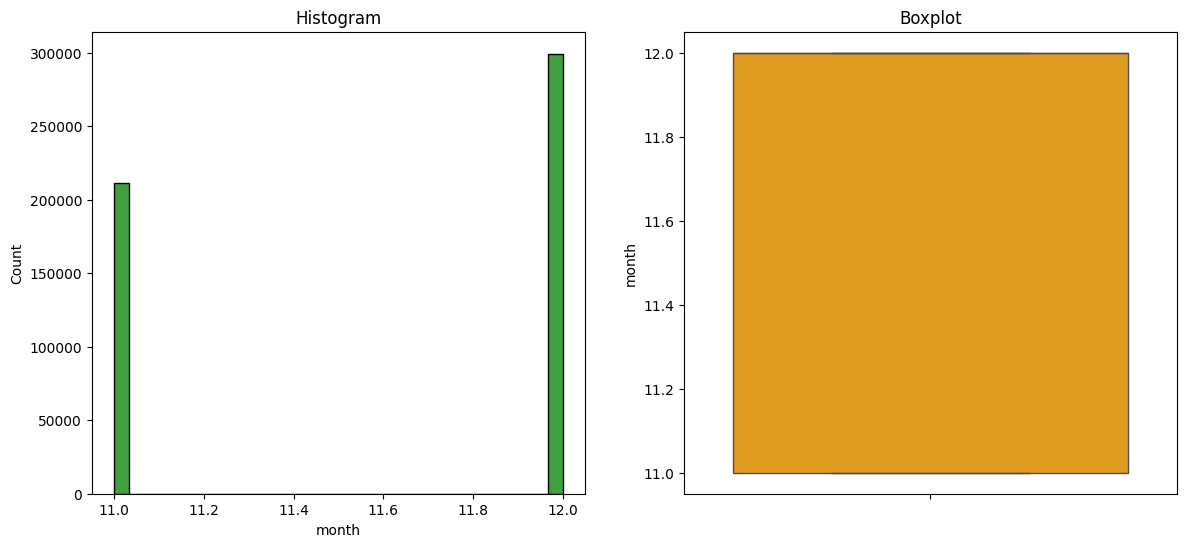


month - Sesudah Capping


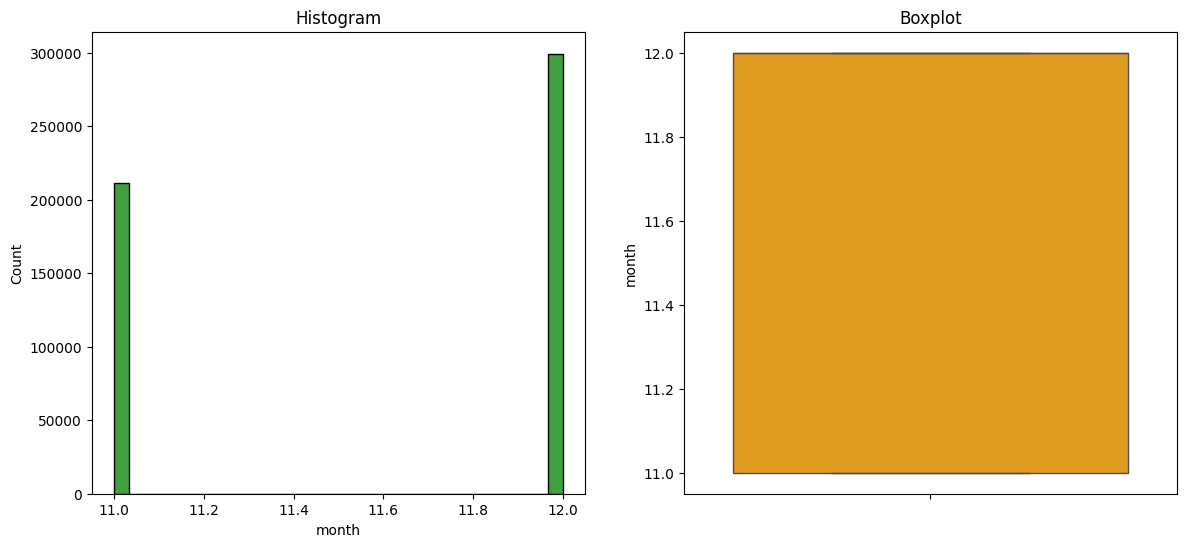


longitude - Sebelum Capping


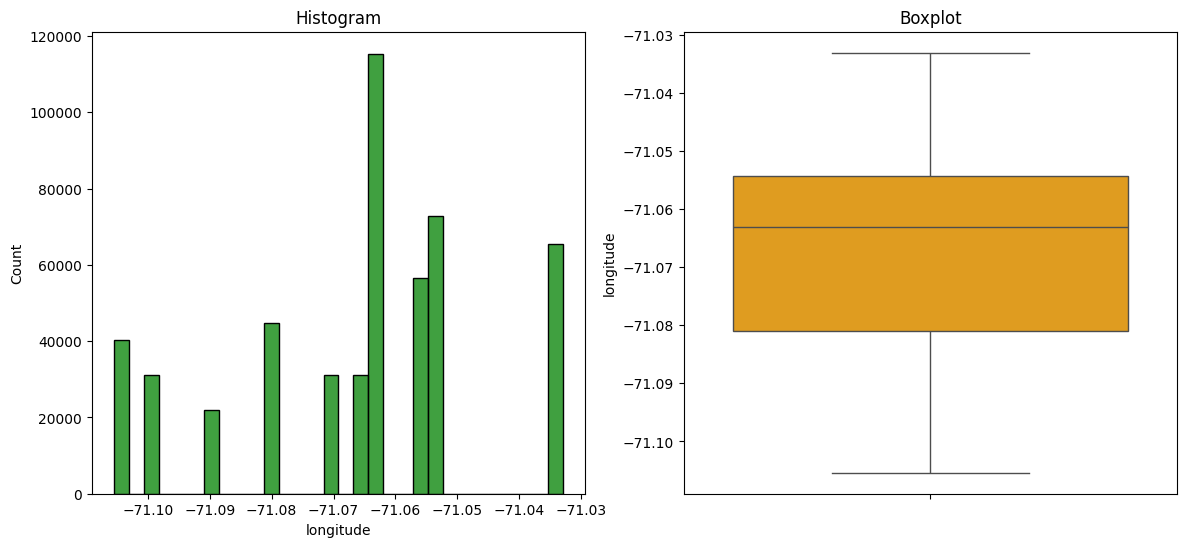


longitude - Sesudah Capping


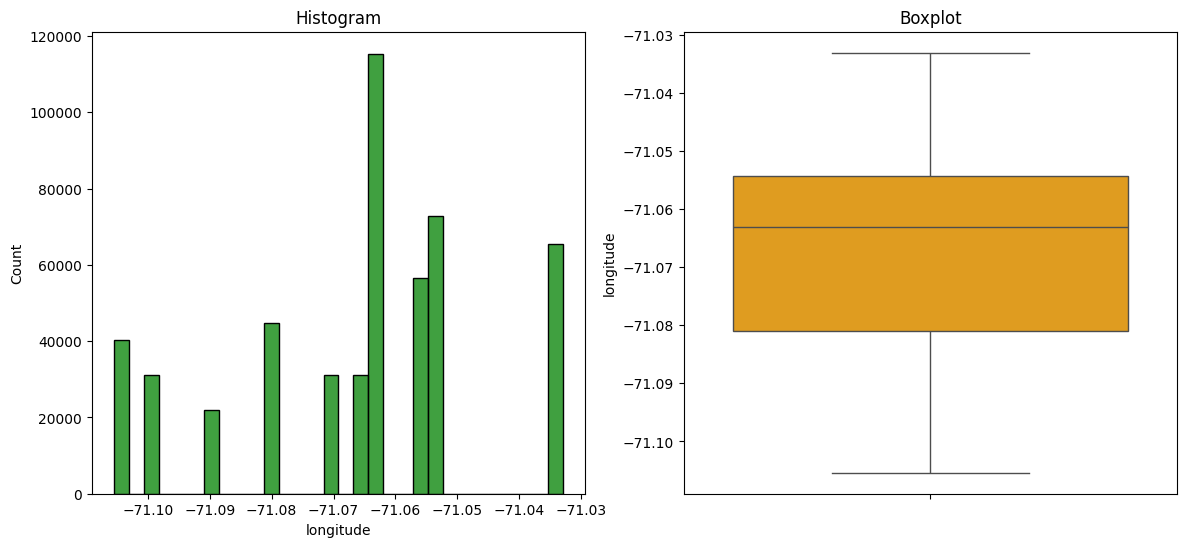


apparentTemperature - Sebelum Capping


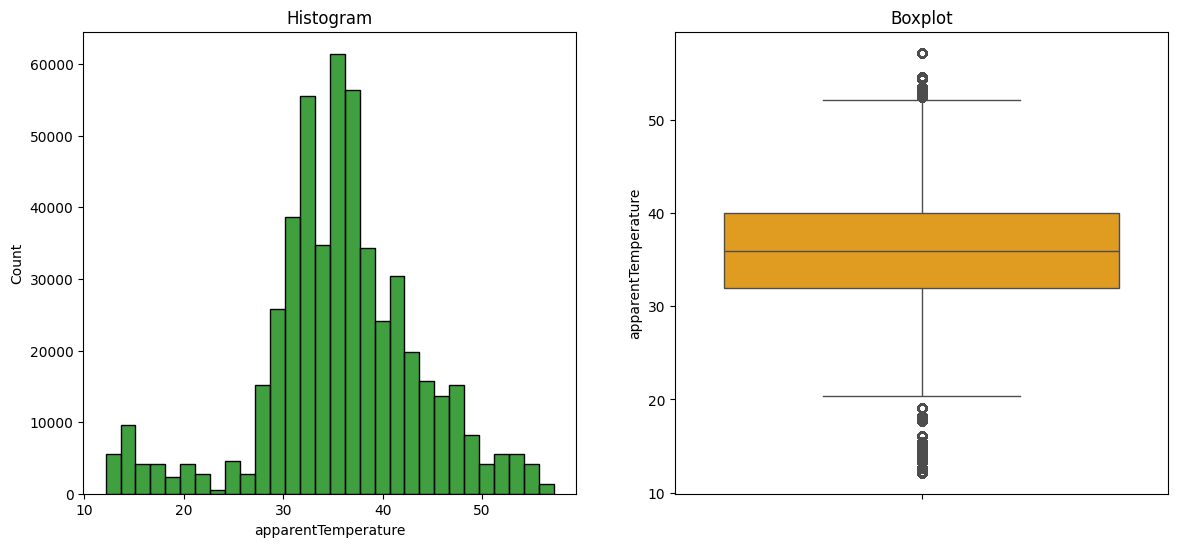


apparentTemperature - Sesudah Capping


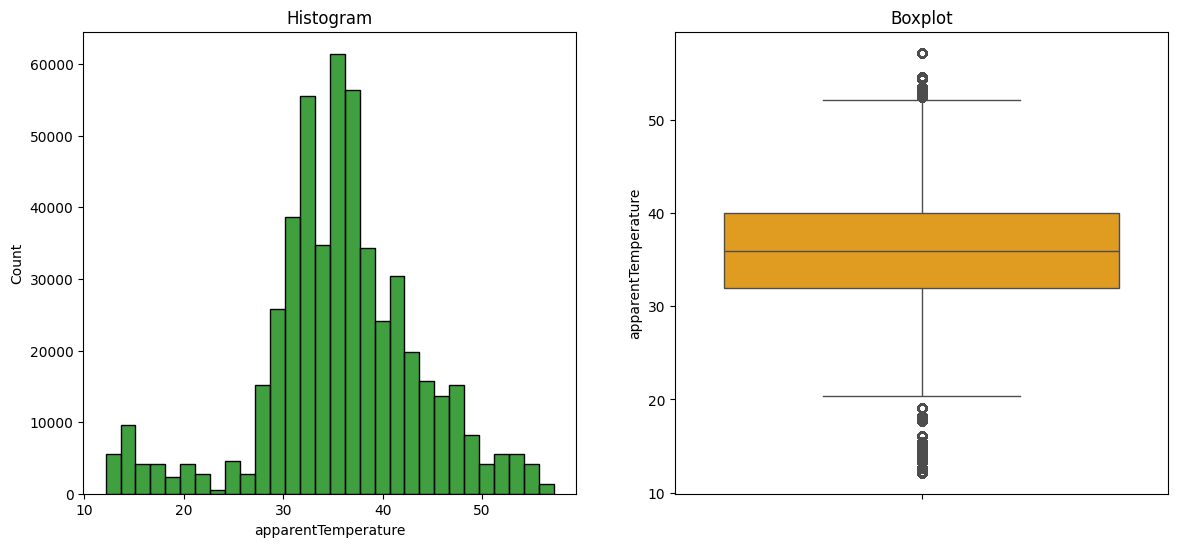


humidity - Sebelum Capping


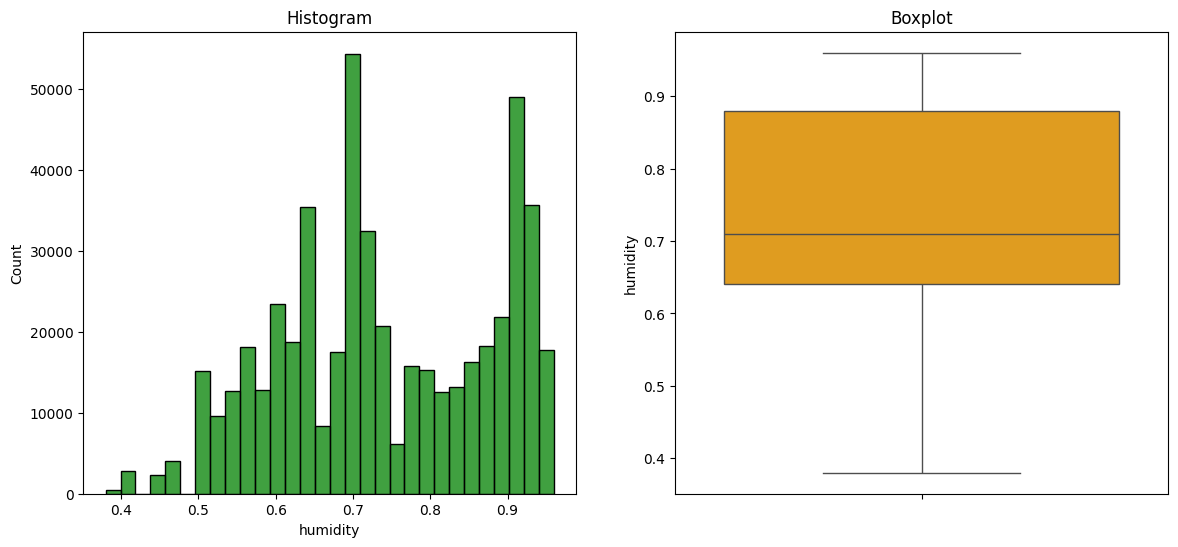


humidity - Sesudah Capping


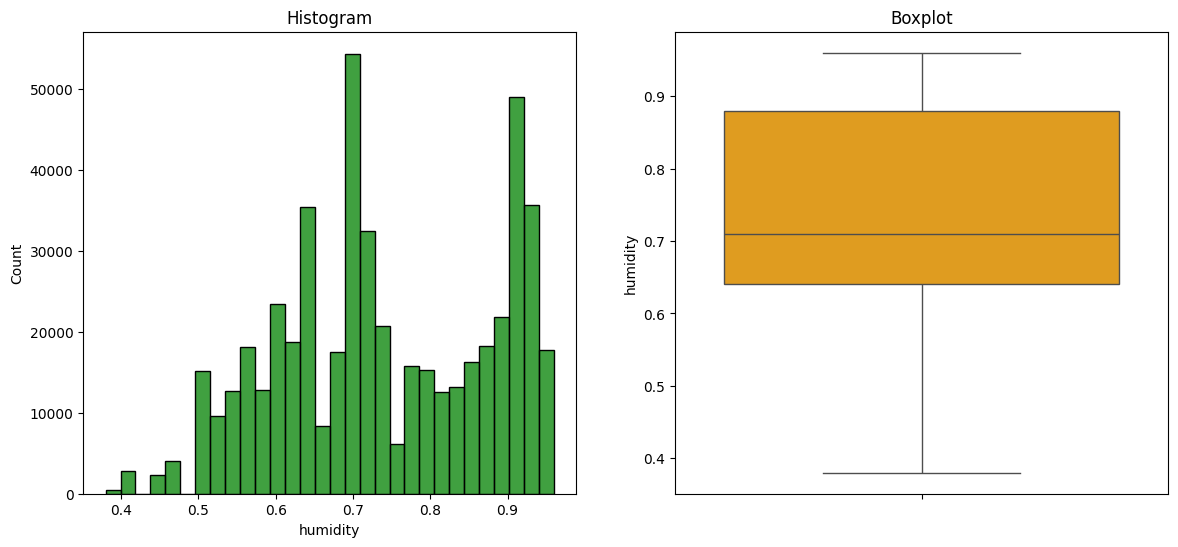


windSpeed - Sebelum Capping


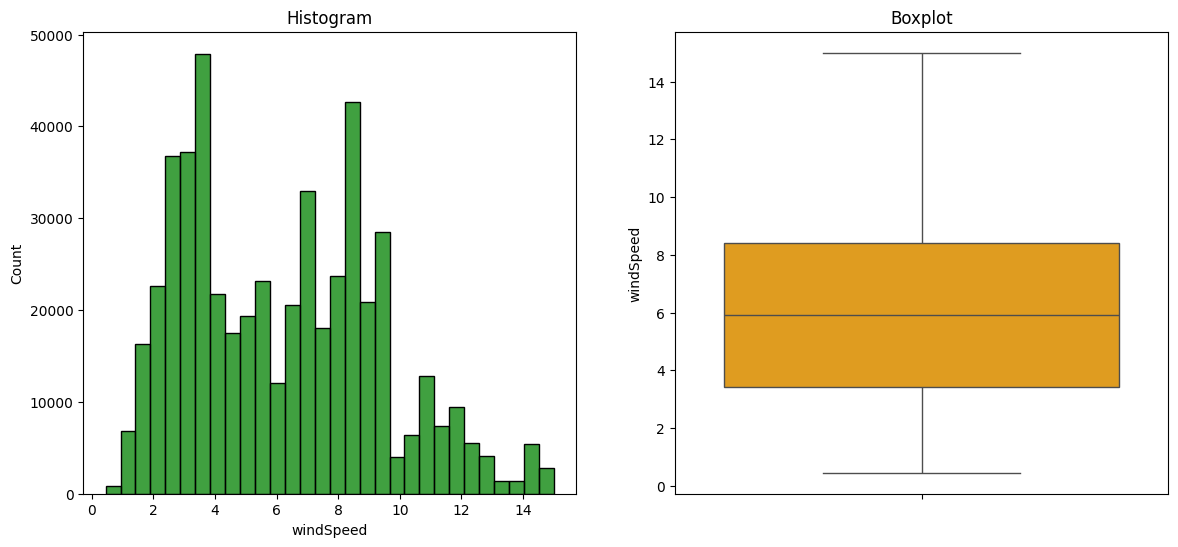


windSpeed - Sesudah Capping


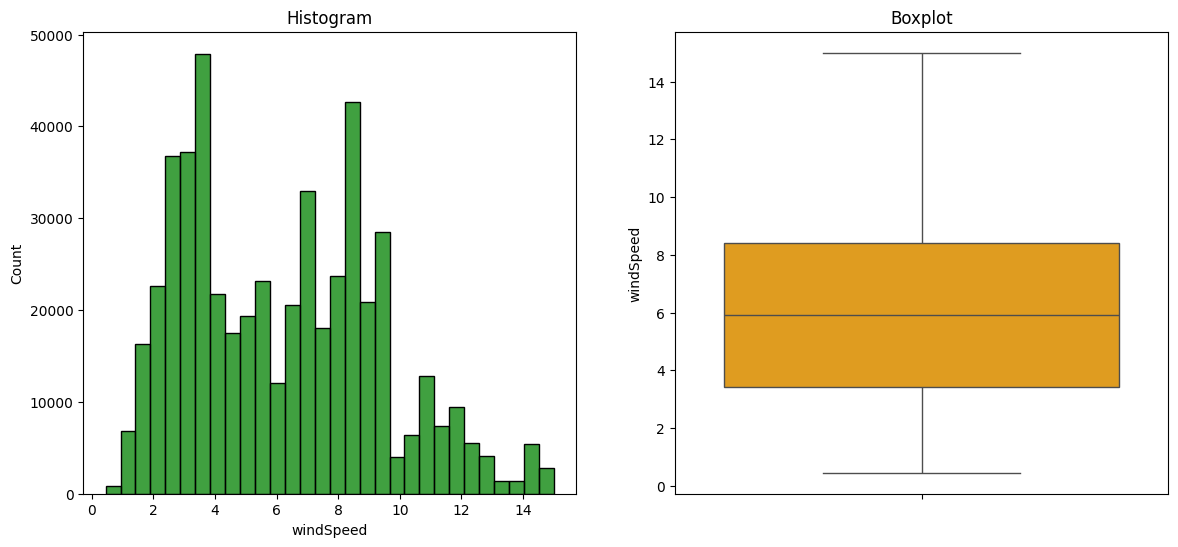


windGustTime - Sebelum Capping


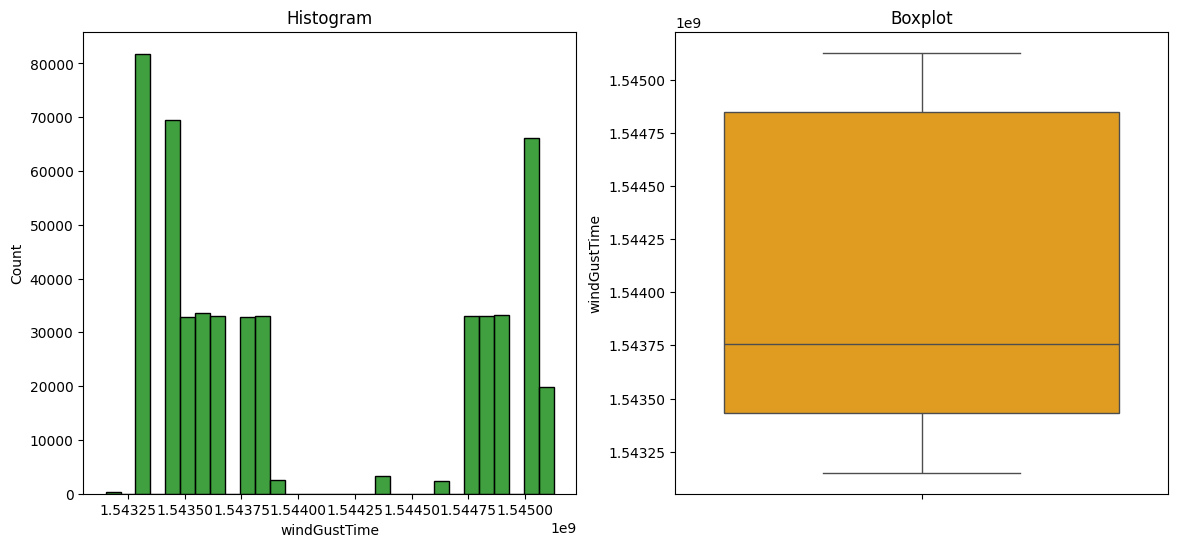


windGustTime - Sesudah Capping


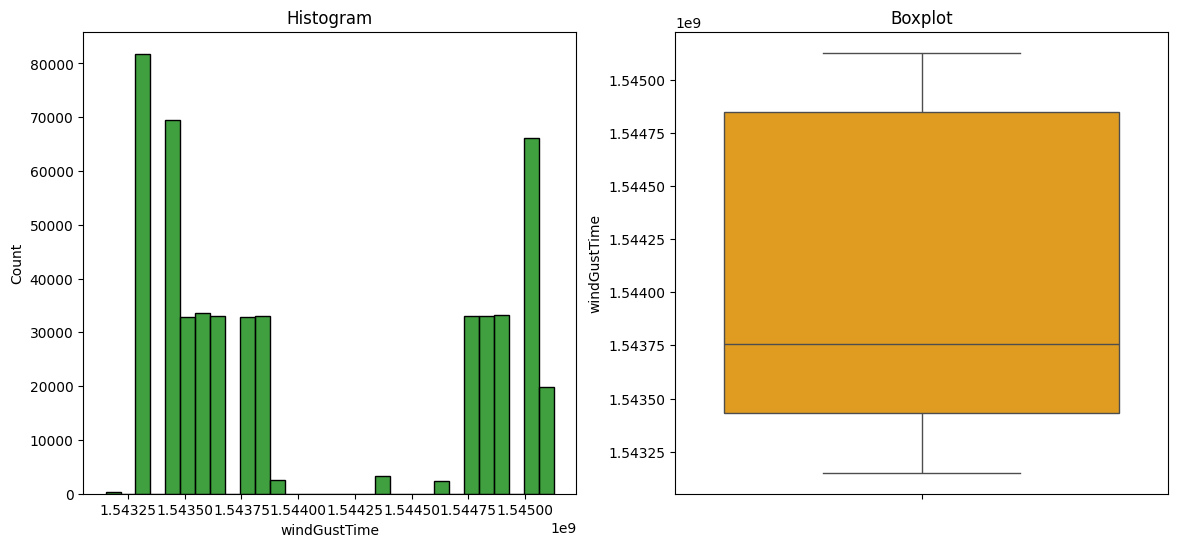


temperatureHigh - Sebelum Capping


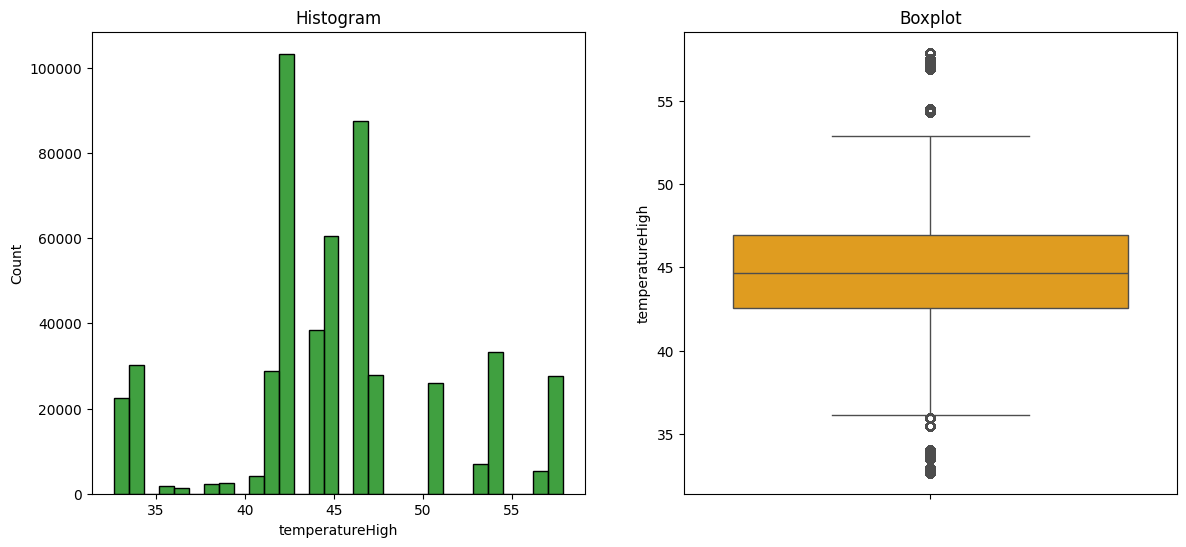


temperatureHigh - Sesudah Capping


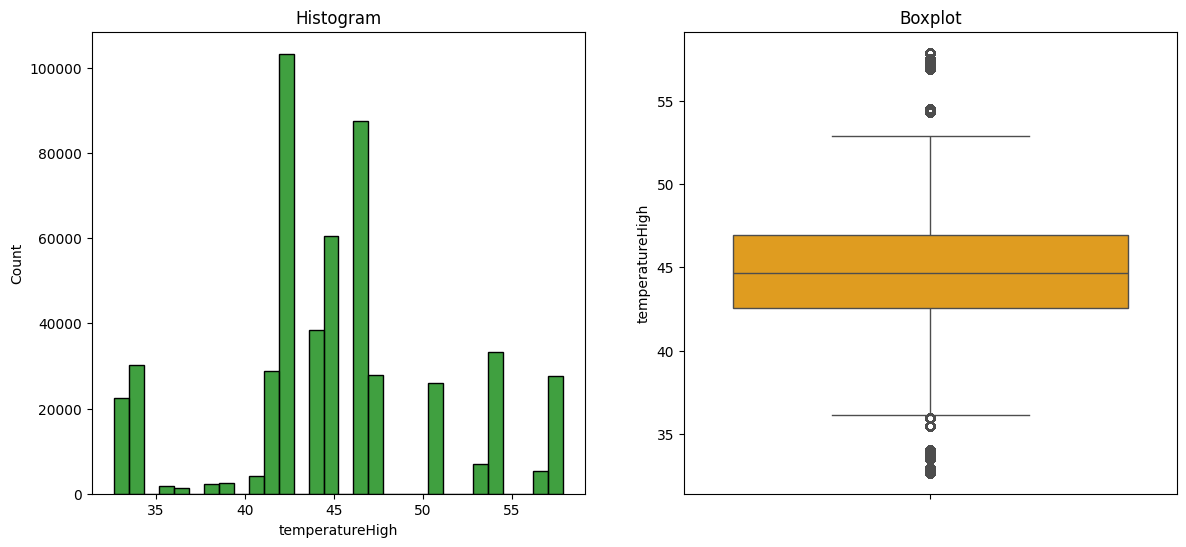


temperatureHighTime - Sebelum Capping


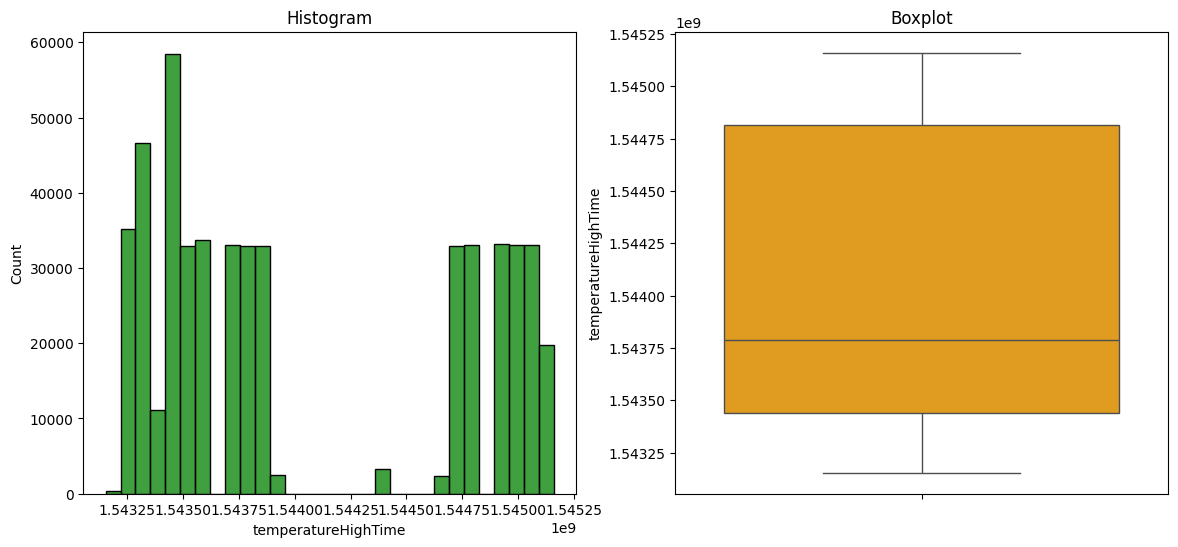


temperatureHighTime - Sesudah Capping


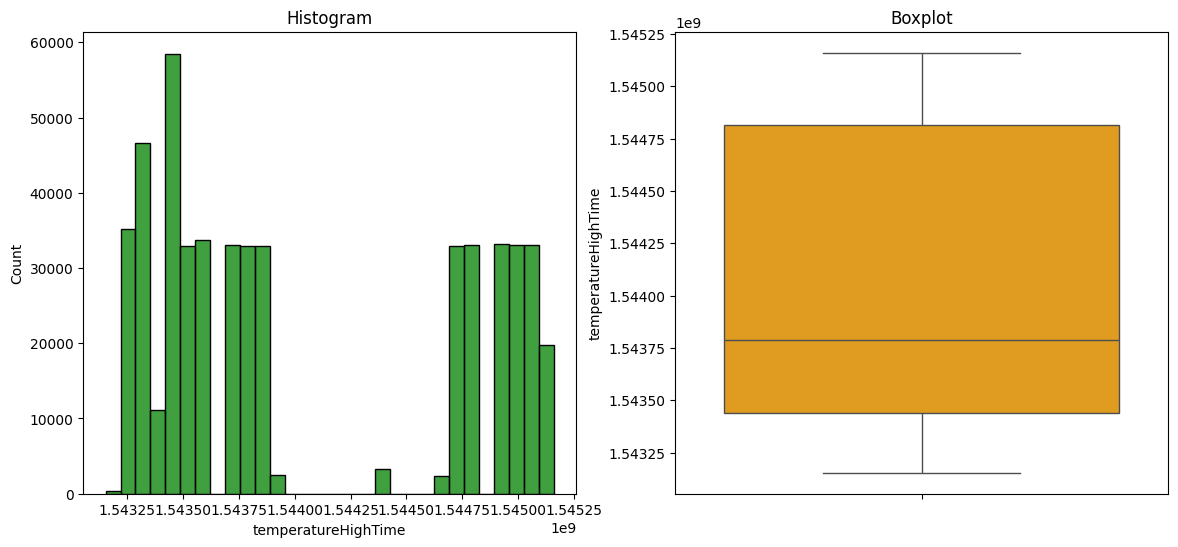


temperatureLow - Sebelum Capping


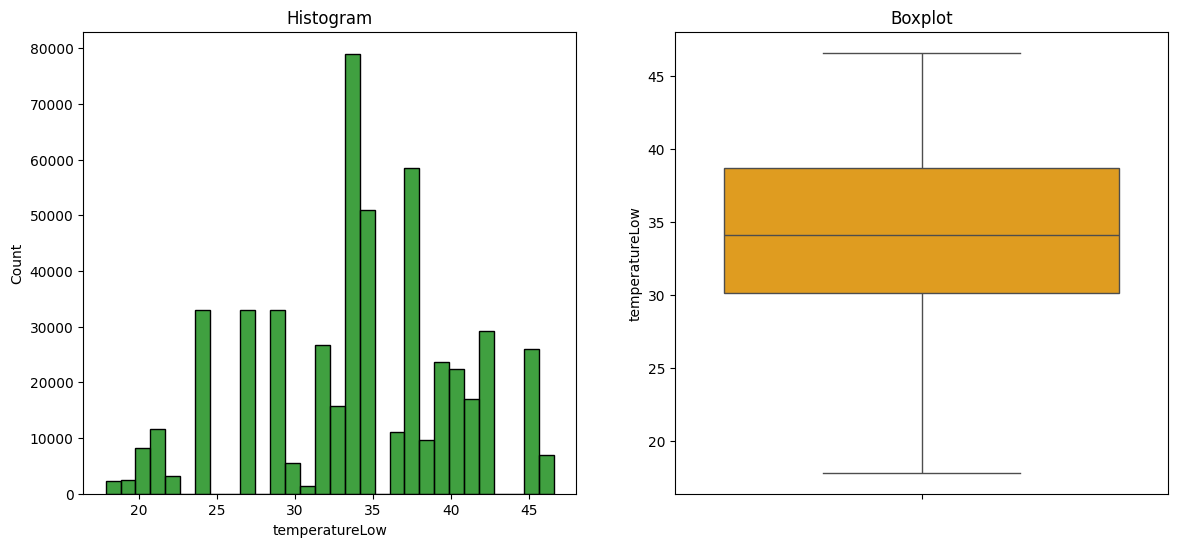


temperatureLow - Sesudah Capping


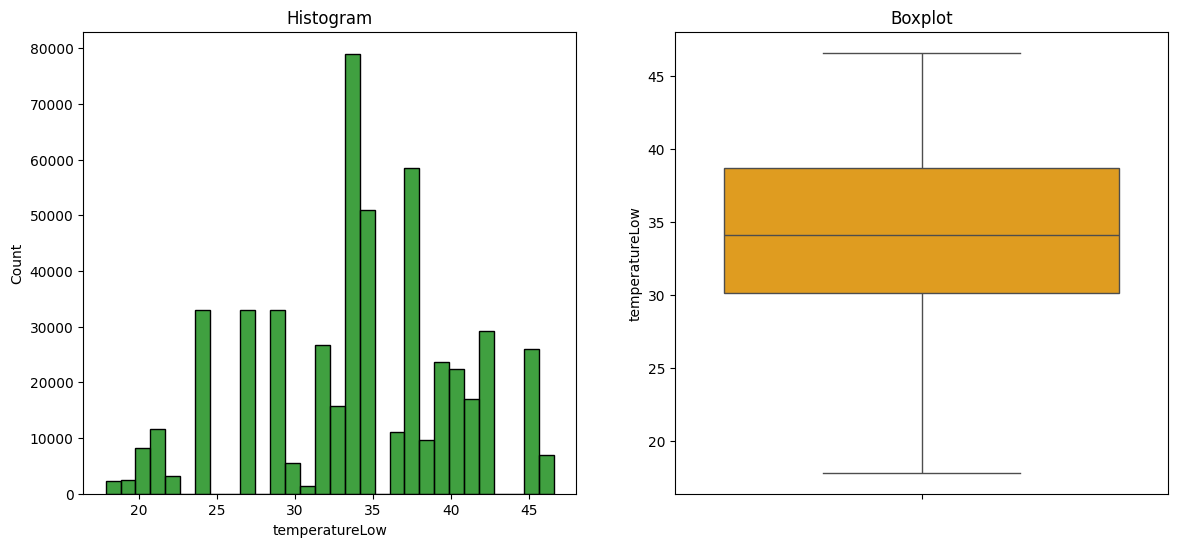


temperatureLowTime - Sebelum Capping


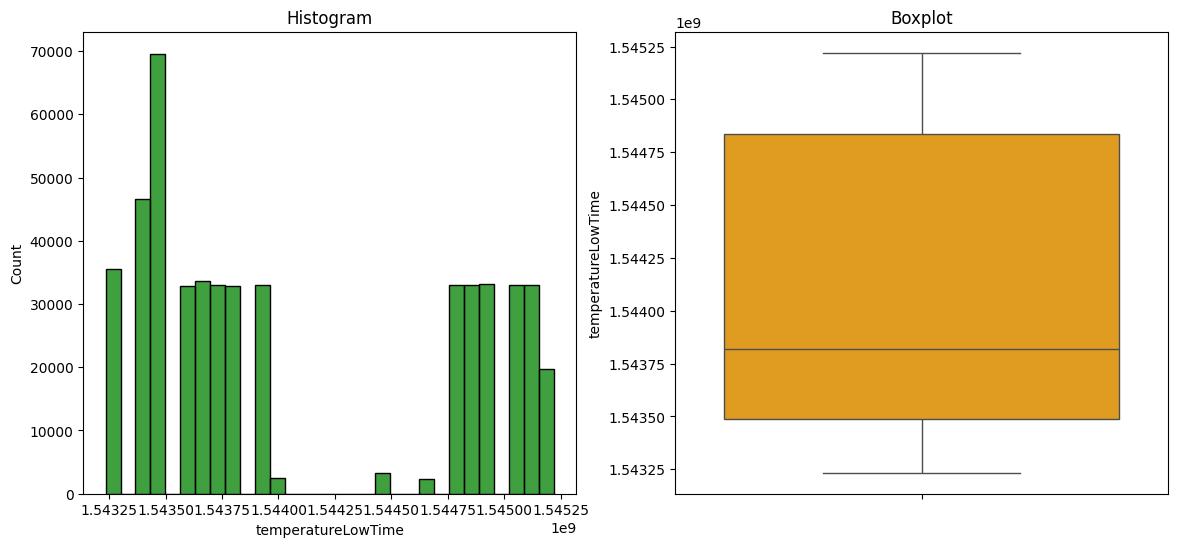


temperatureLowTime - Sesudah Capping


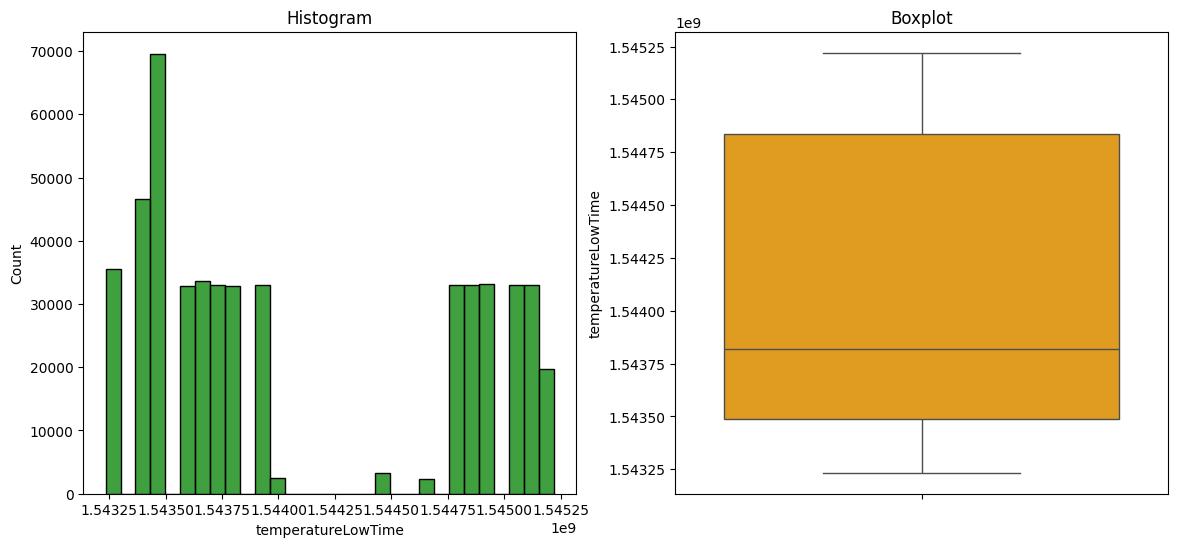


apparentTemperatureHigh - Sebelum Capping


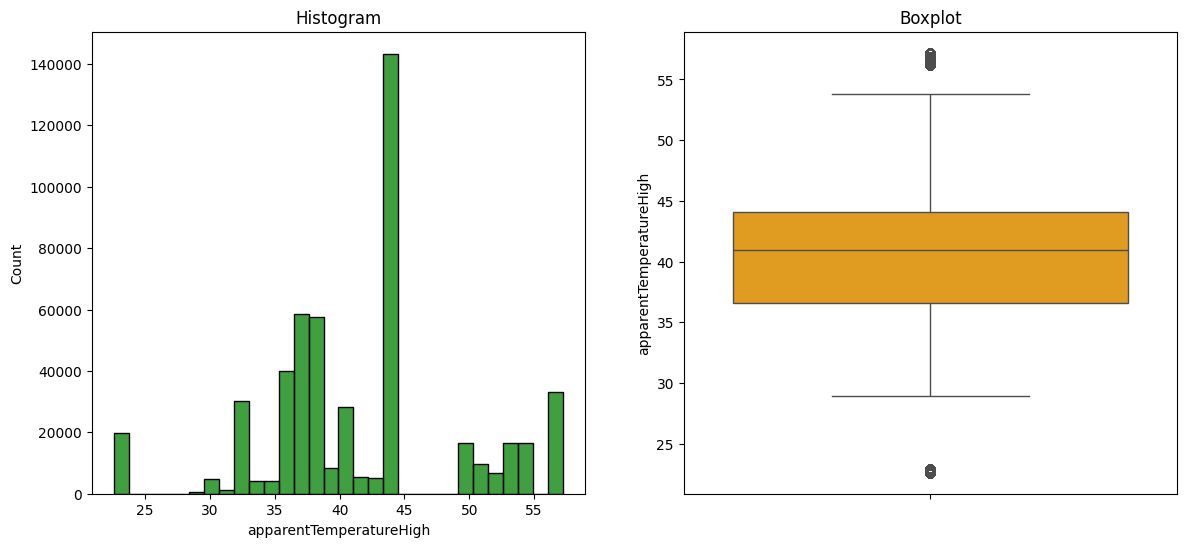


apparentTemperatureHigh - Sesudah Capping


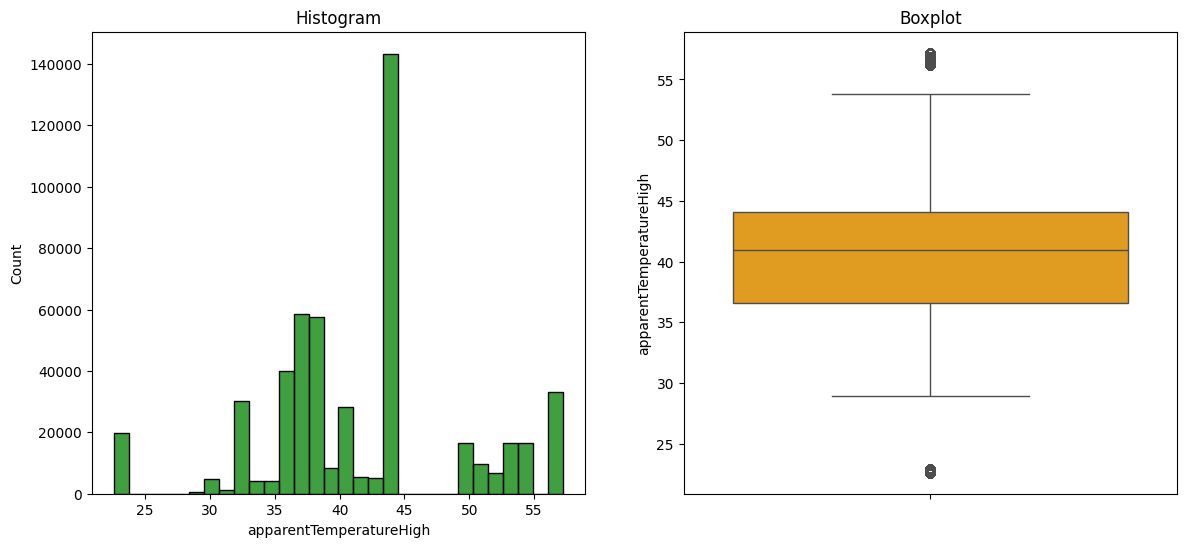


apparentTemperatureHighTime - Sebelum Capping


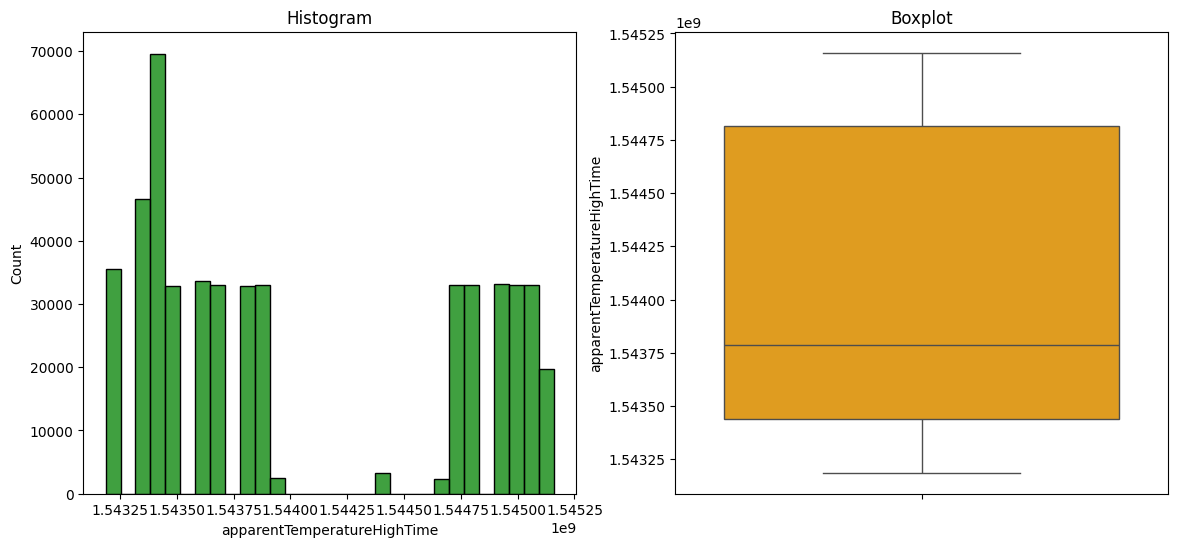


apparentTemperatureHighTime - Sesudah Capping


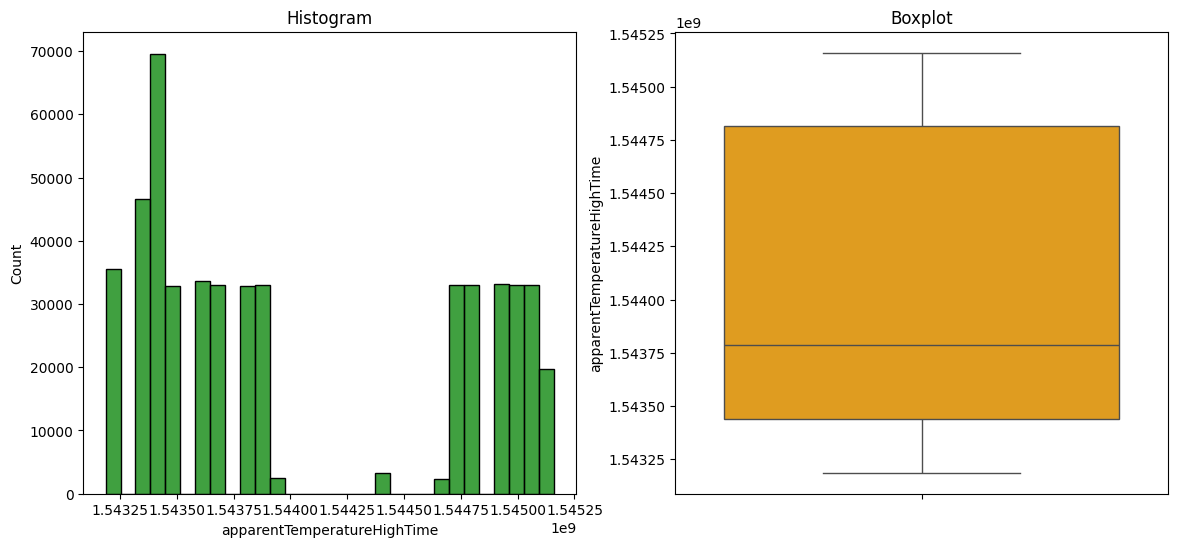


apparentTemperatureLowTime - Sebelum Capping


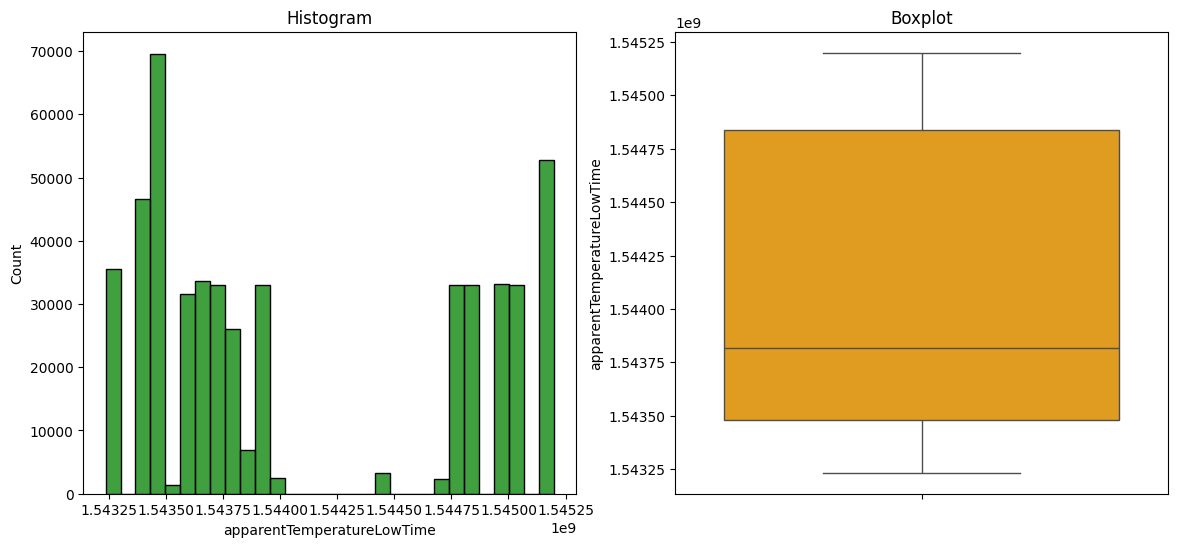


apparentTemperatureLowTime - Sesudah Capping


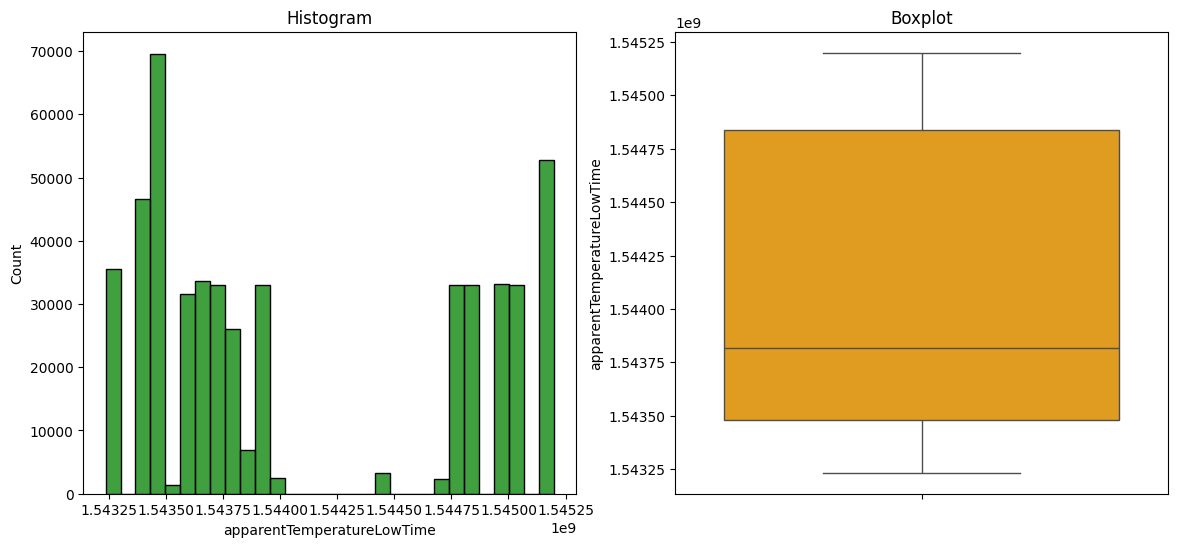


dewPoint - Sebelum Capping


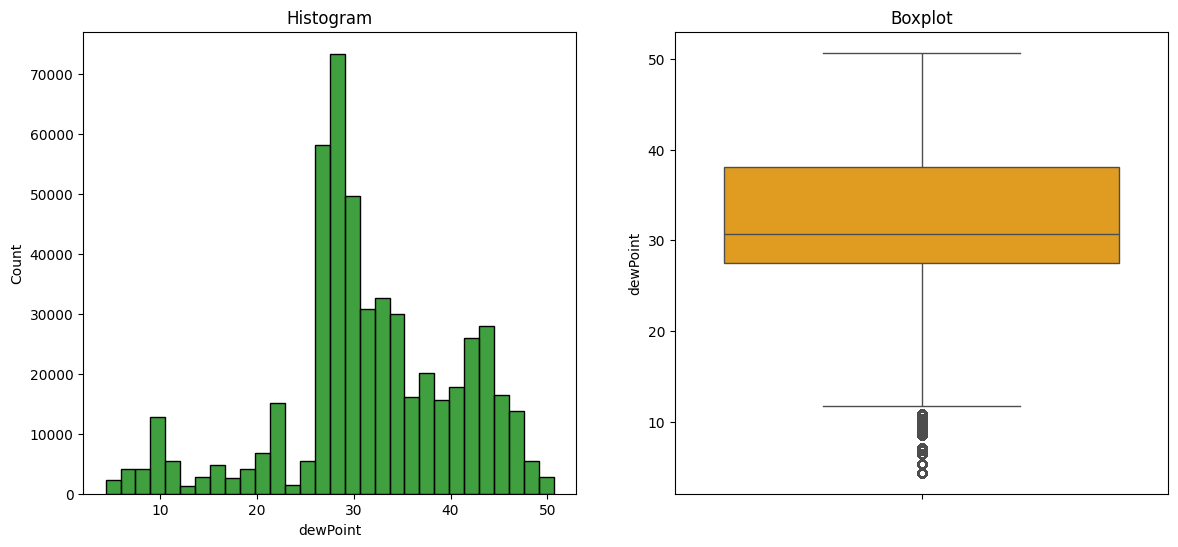


dewPoint - Sesudah Capping


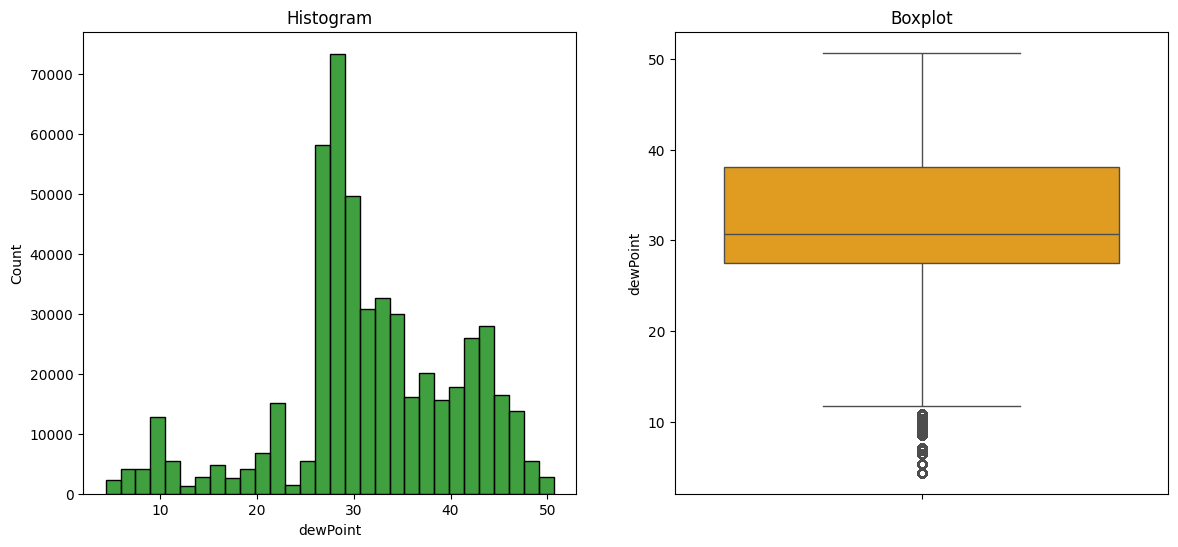


pressure - Sebelum Capping


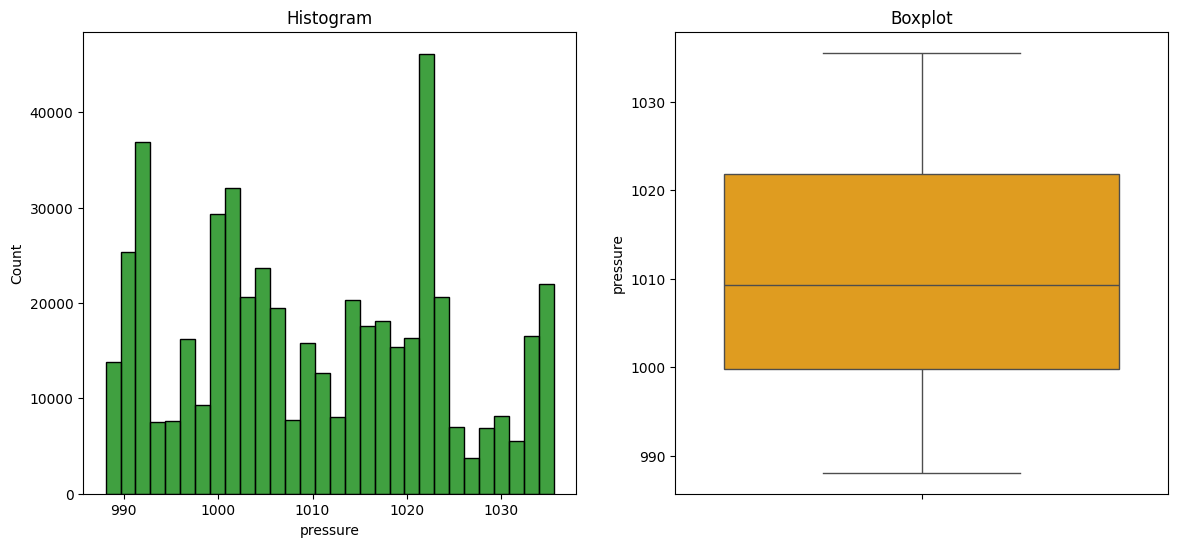


pressure - Sesudah Capping


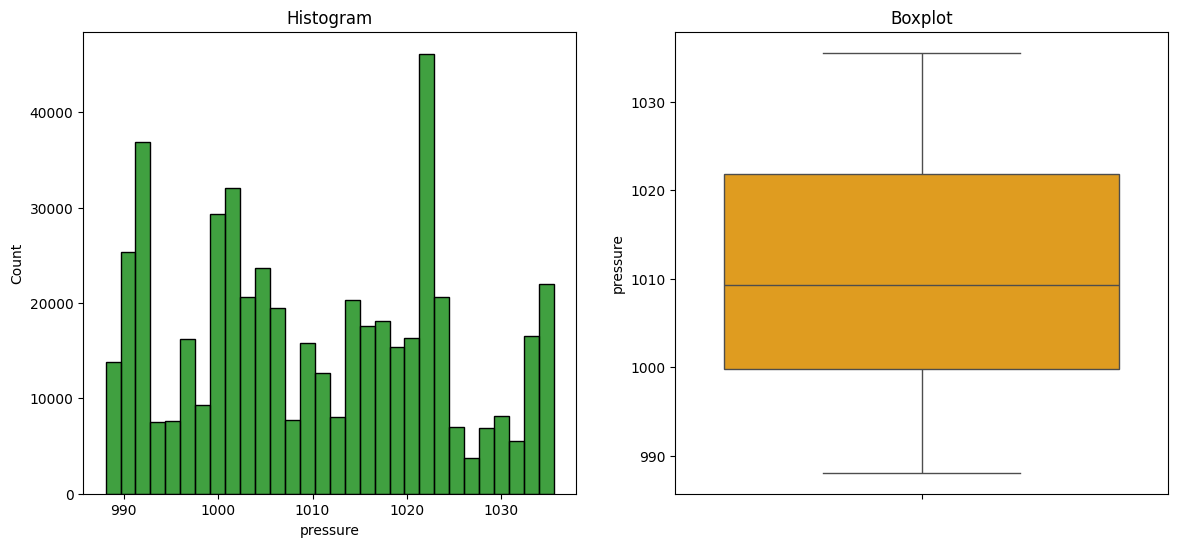


ozone - Sebelum Capping


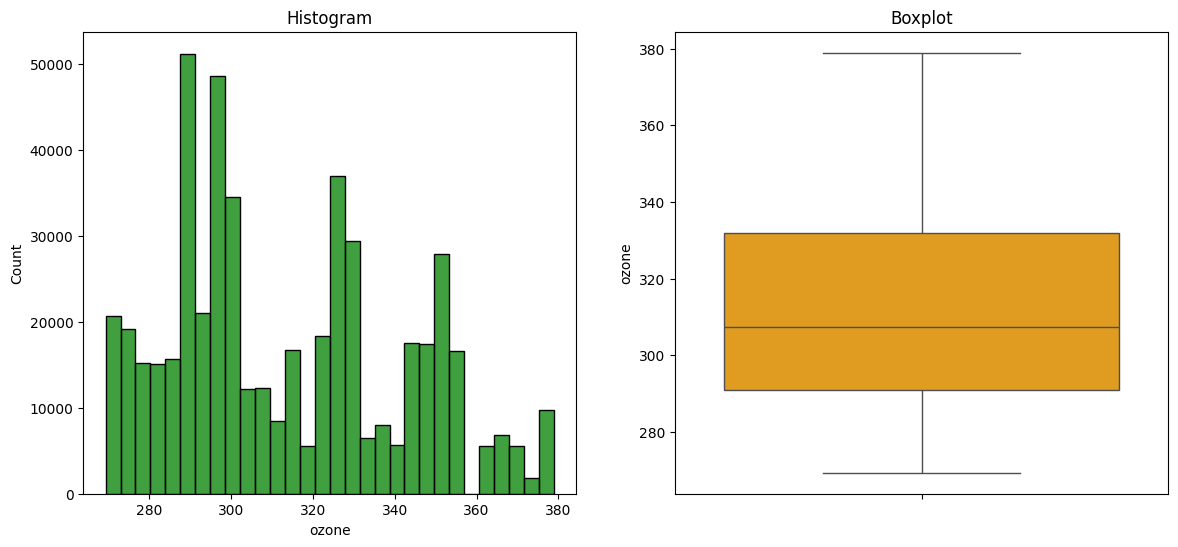


ozone - Sesudah Capping


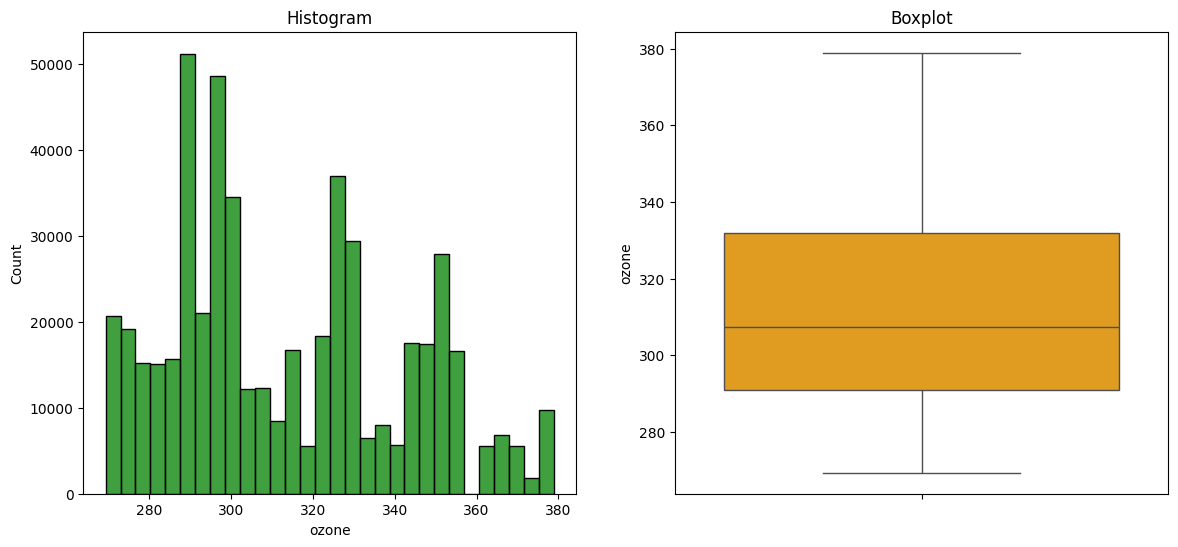


sunriseTime - Sebelum Capping


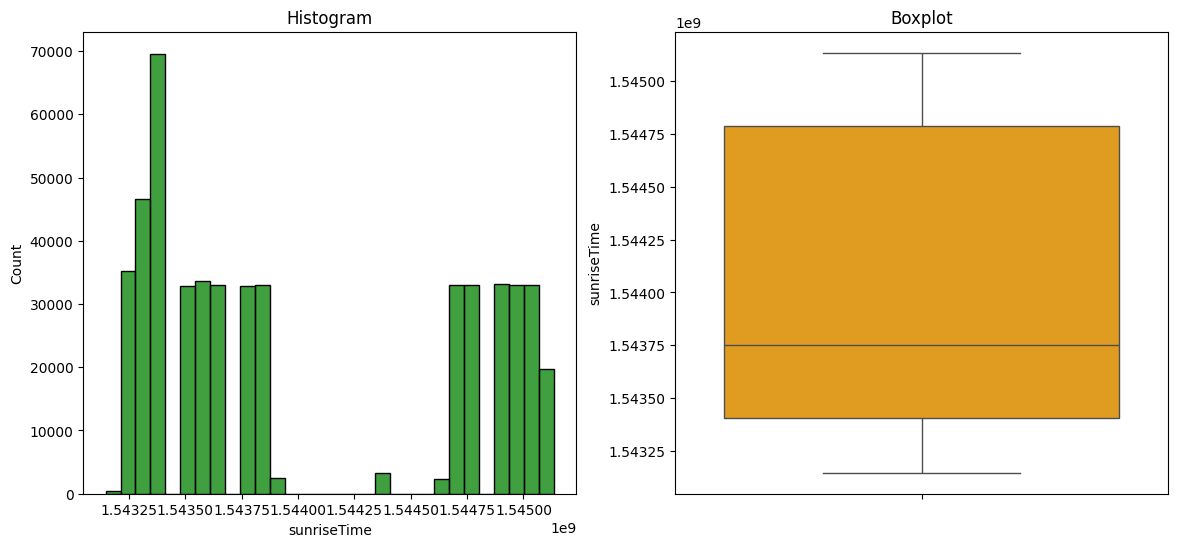


sunriseTime - Sesudah Capping


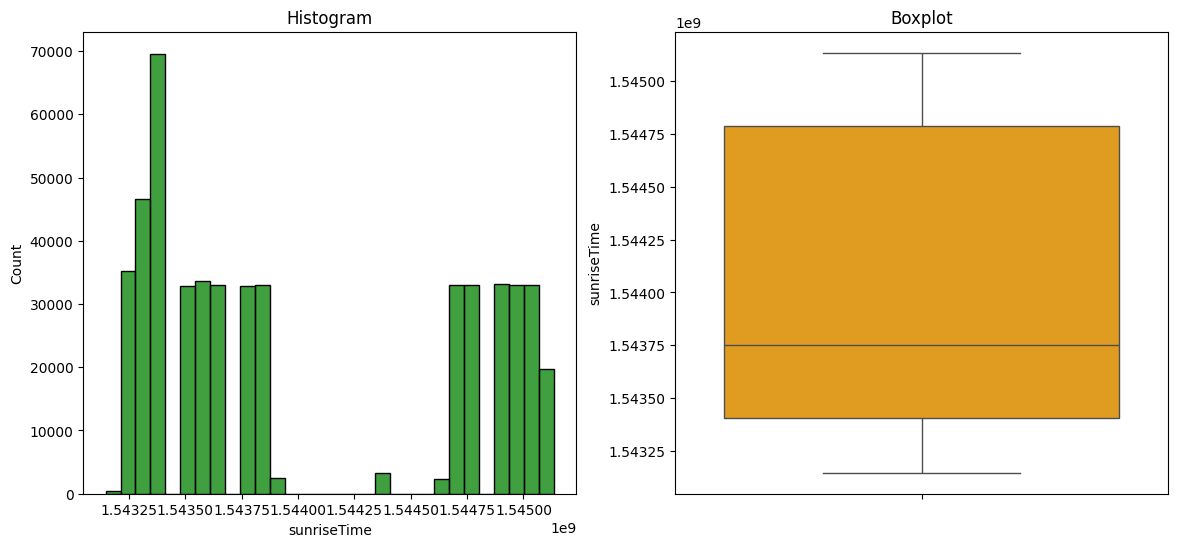


sunsetTime - Sebelum Capping


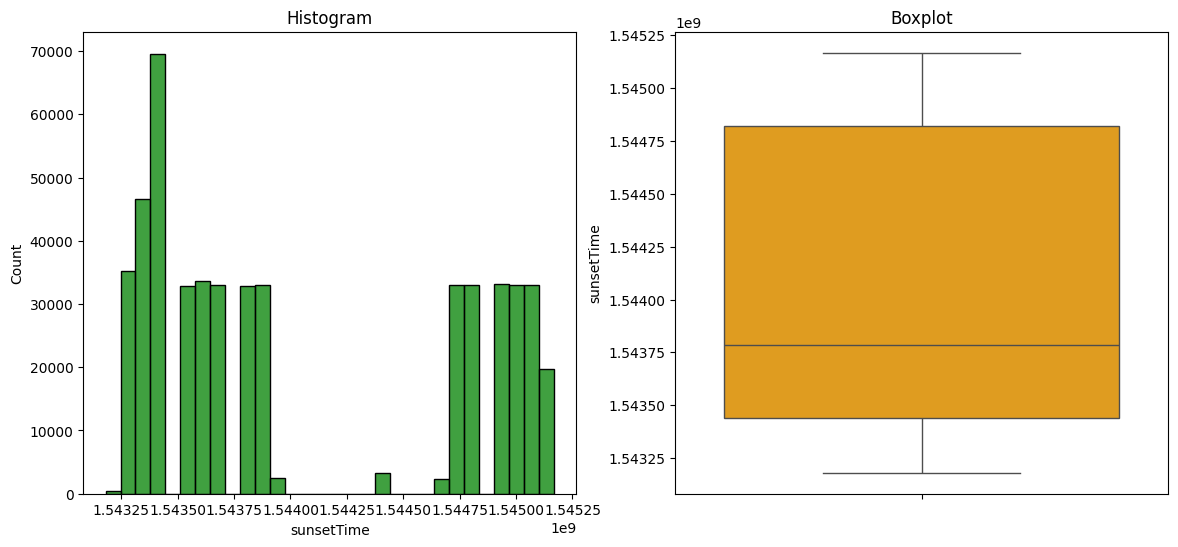


sunsetTime - Sesudah Capping


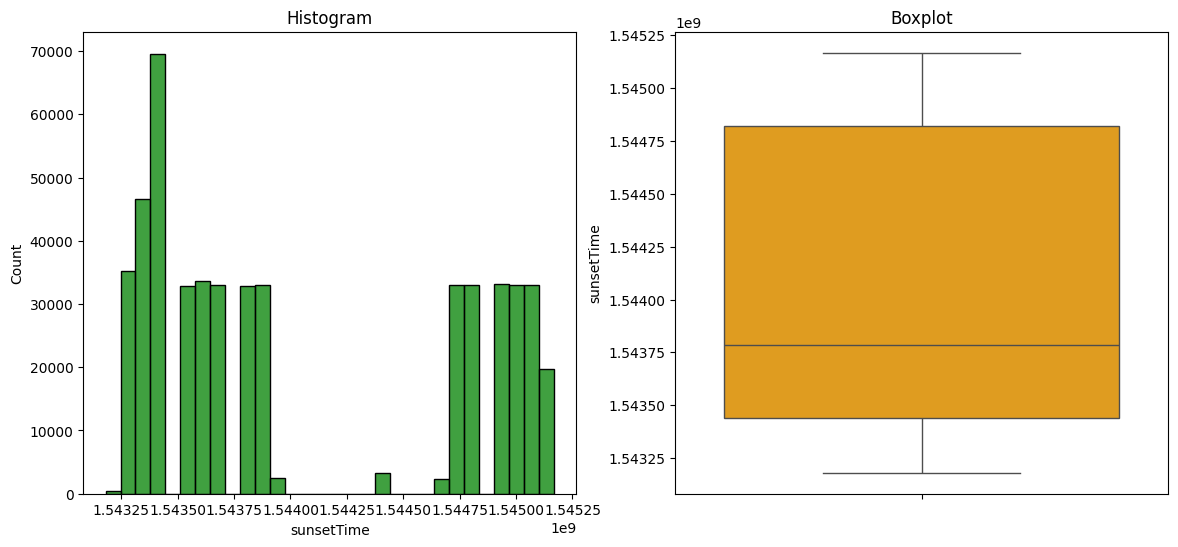


moonPhase - Sebelum Capping


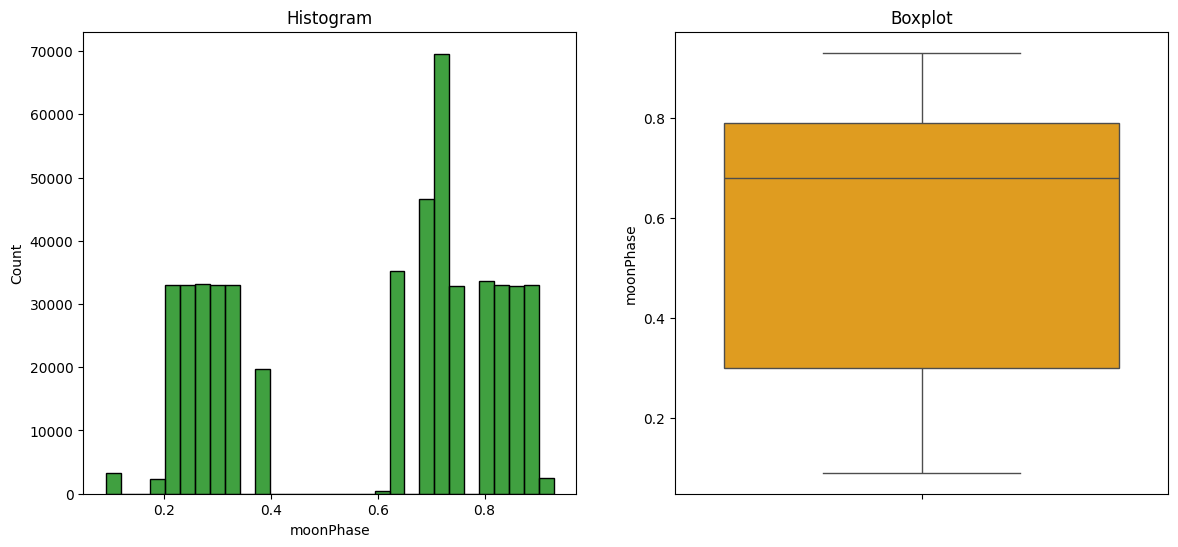


moonPhase - Sesudah Capping


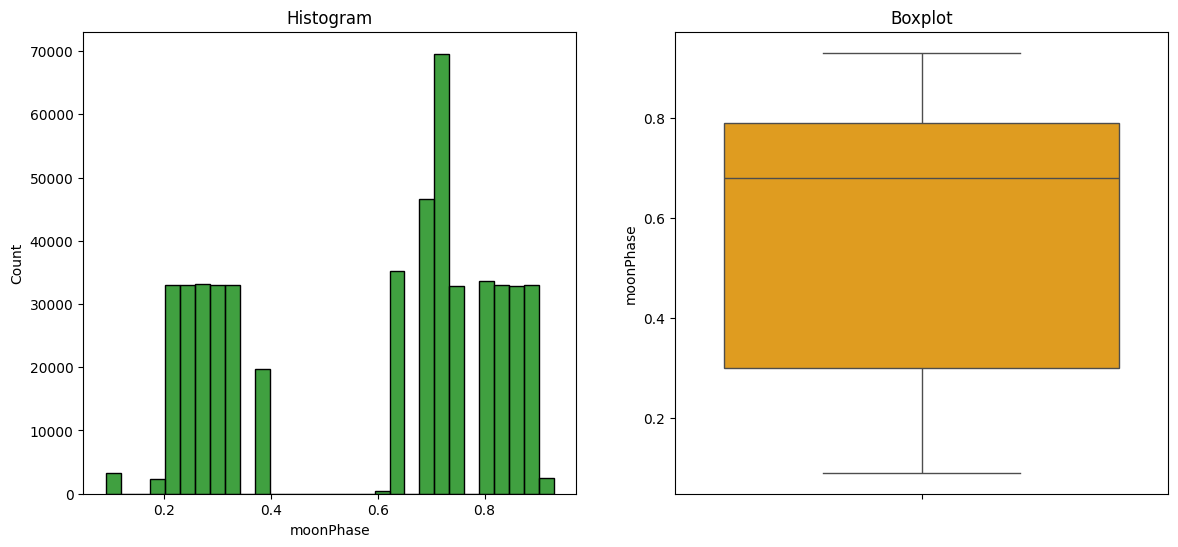


uvIndexTime - Sebelum Capping


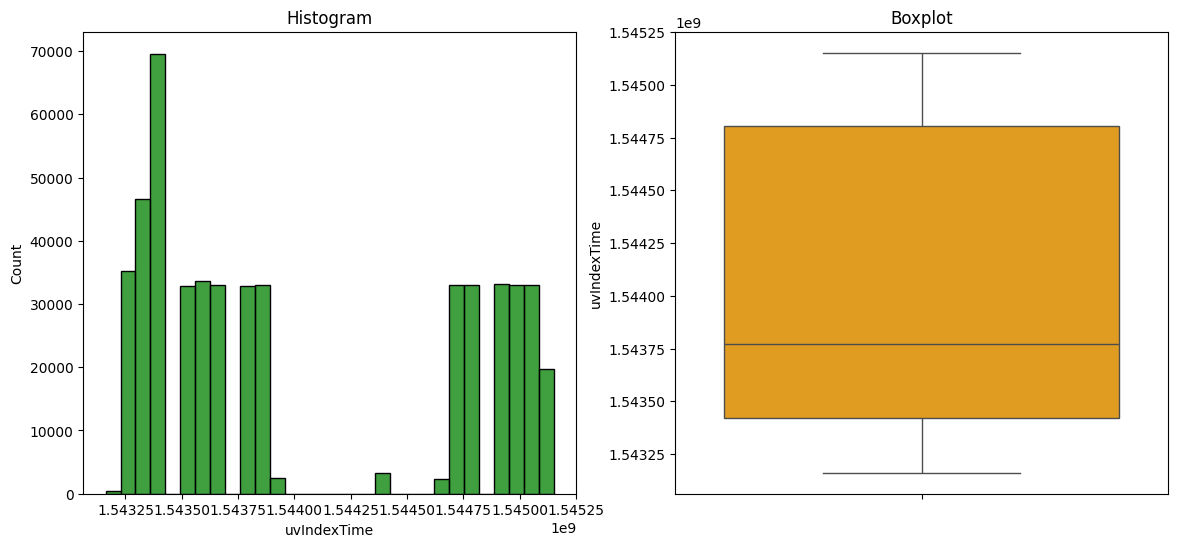


uvIndexTime - Sesudah Capping


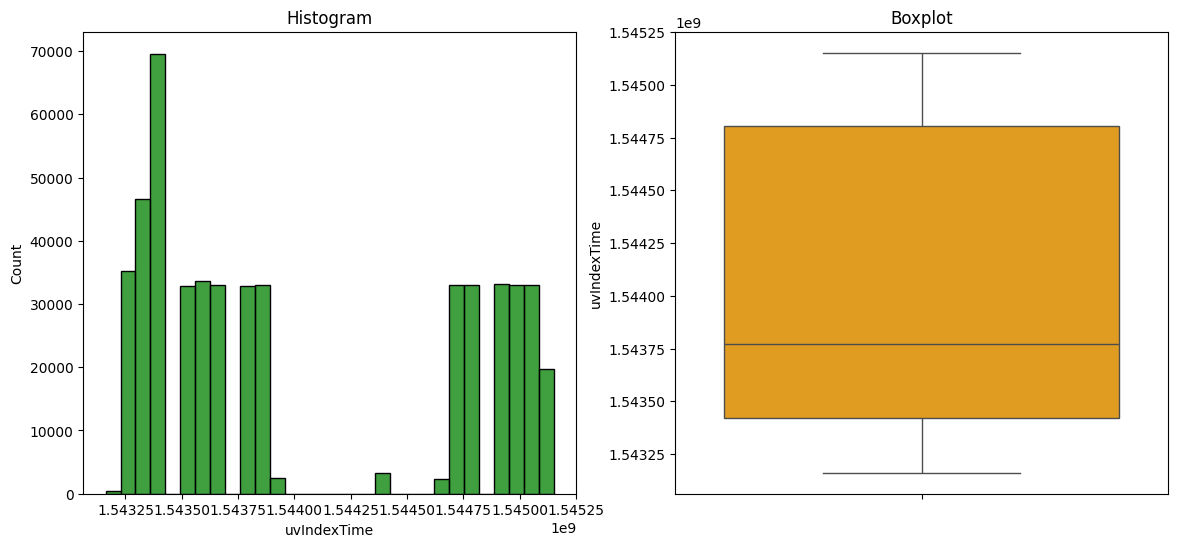


temperatureMinTime - Sebelum Capping


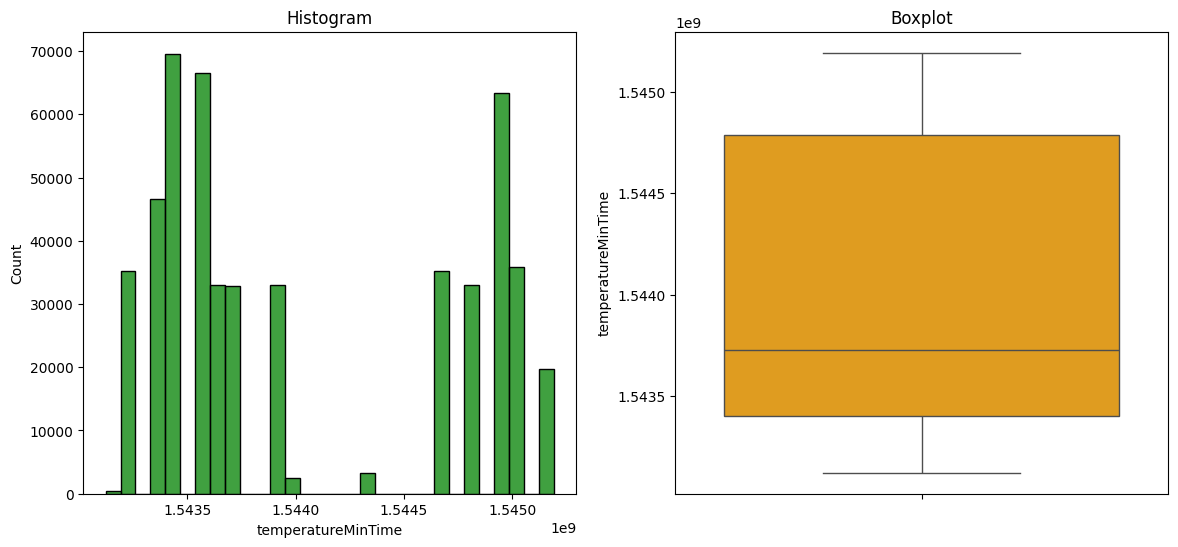


temperatureMinTime - Sesudah Capping


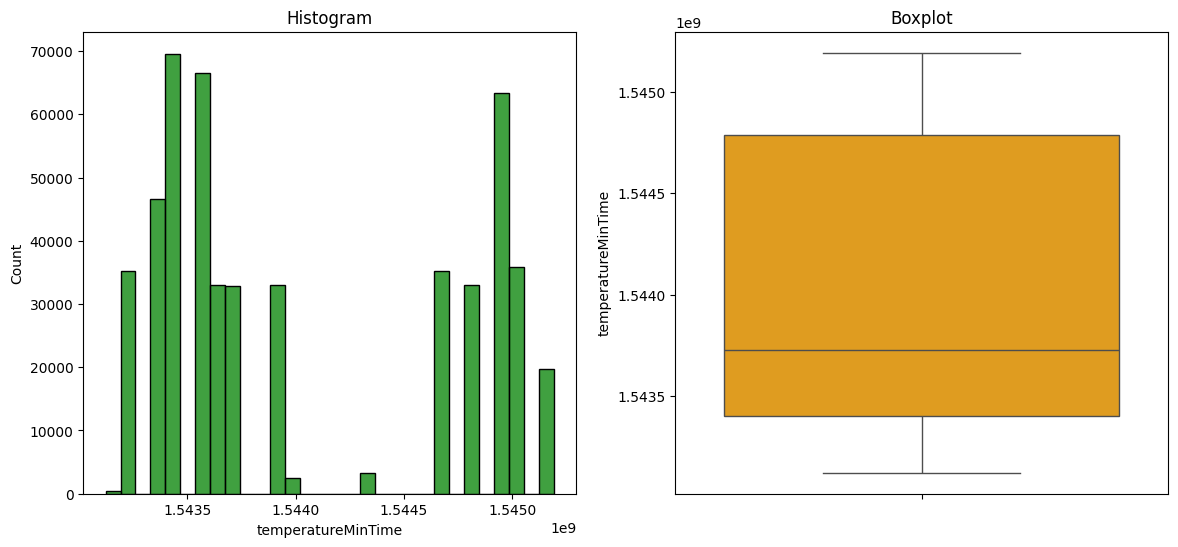


temperatureMax - Sebelum Capping


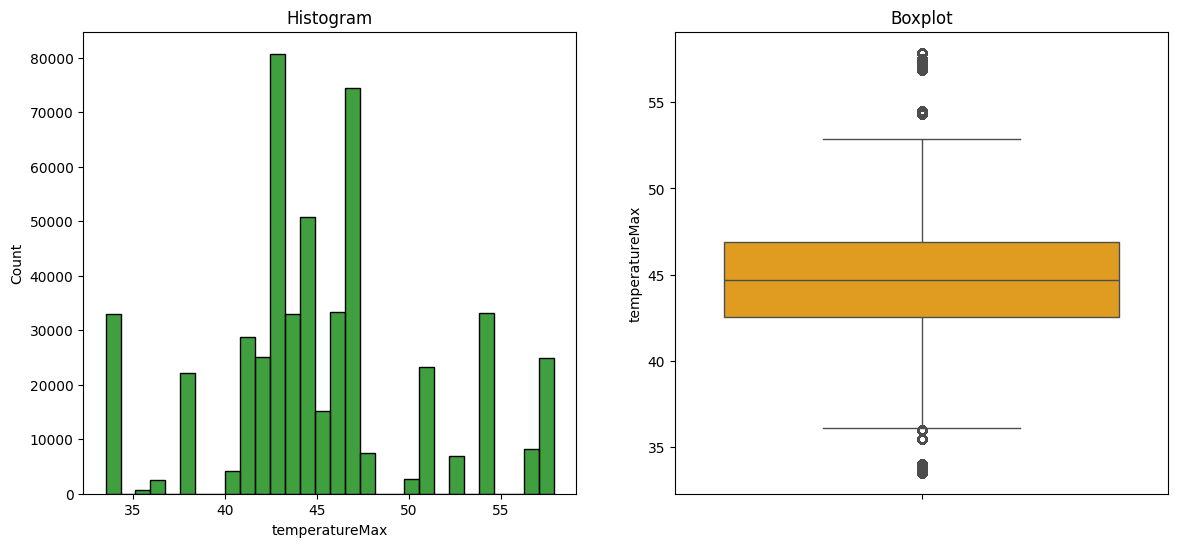


temperatureMax - Sesudah Capping


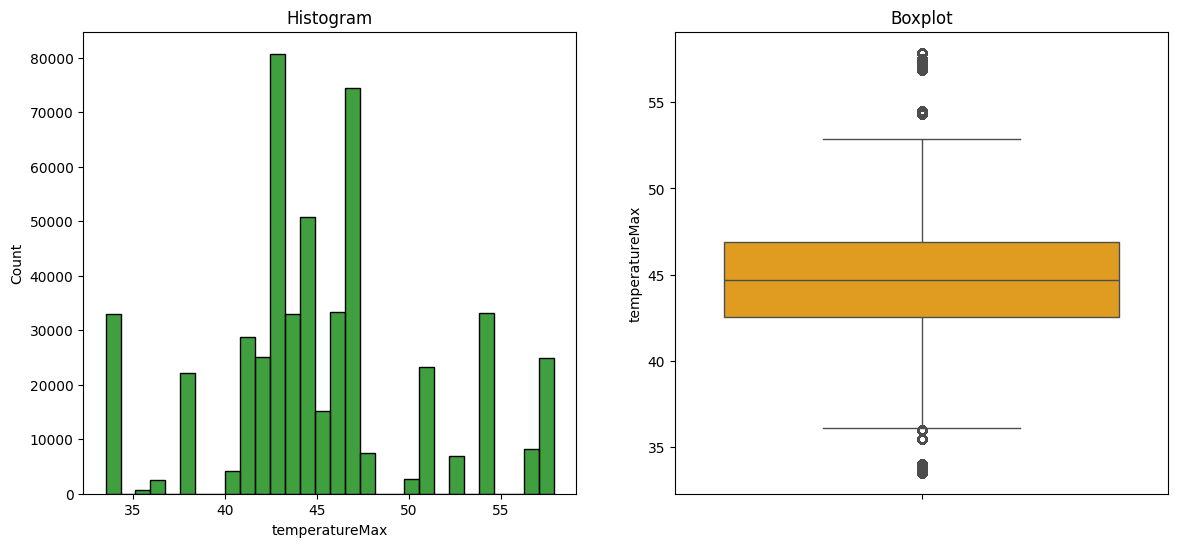


temperatureMaxTime - Sebelum Capping


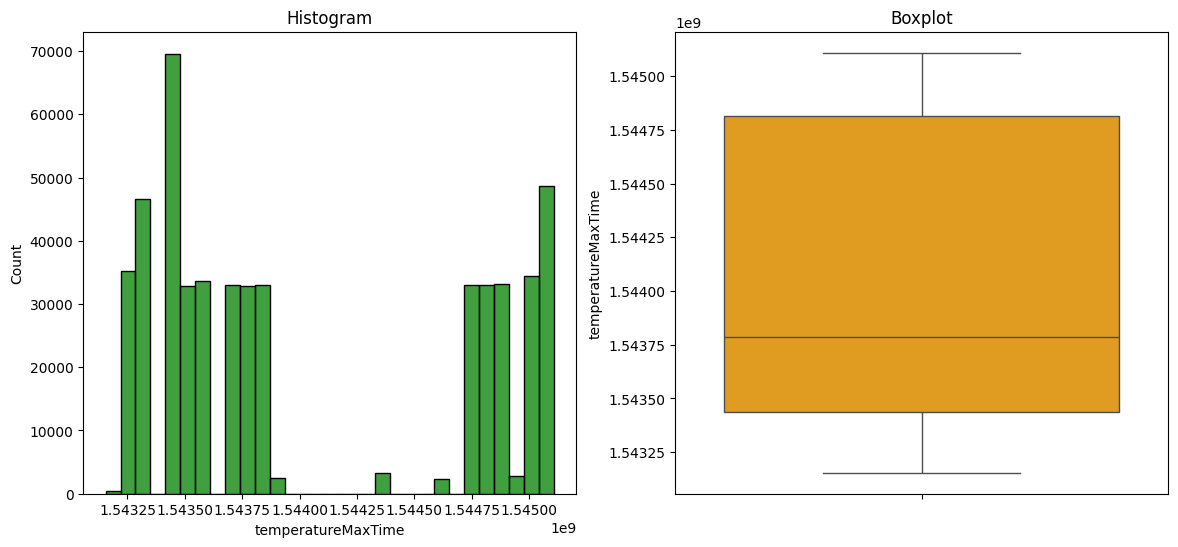


temperatureMaxTime - Sesudah Capping


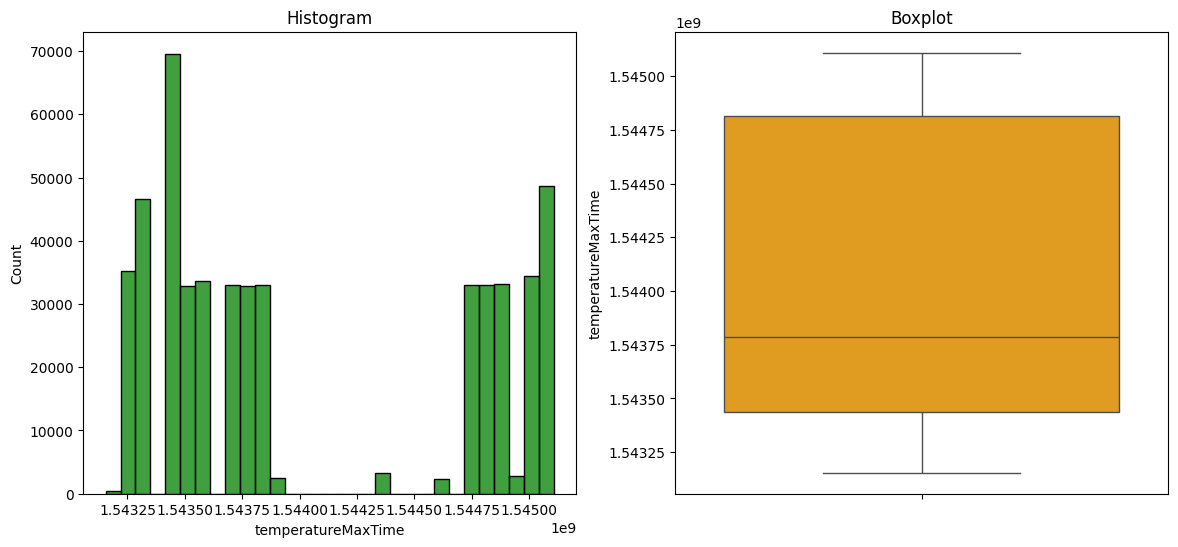


apparentTemperatureMinTime - Sebelum Capping


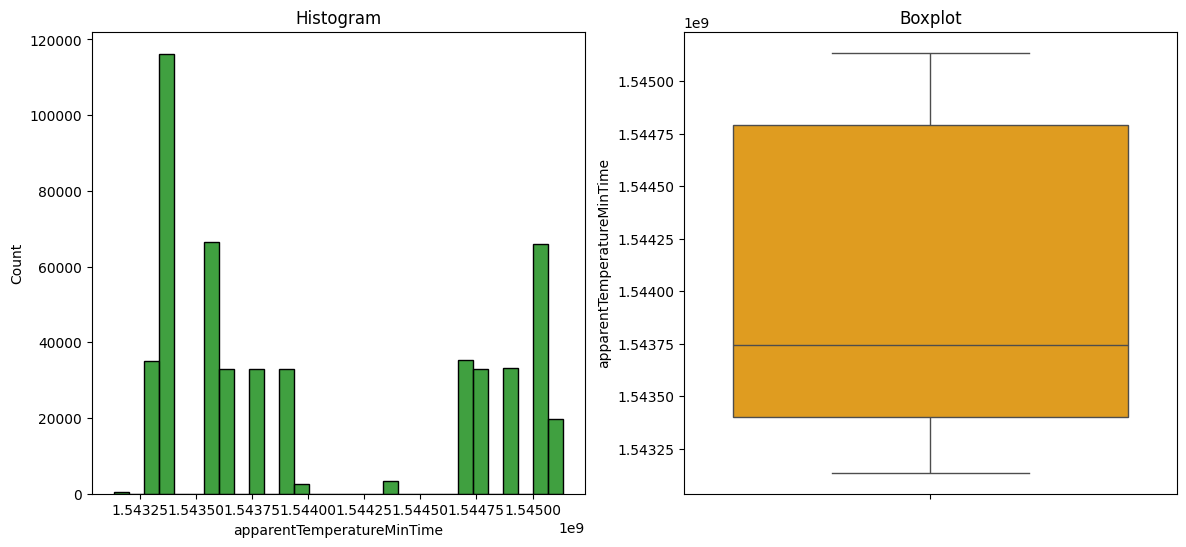


apparentTemperatureMinTime - Sesudah Capping


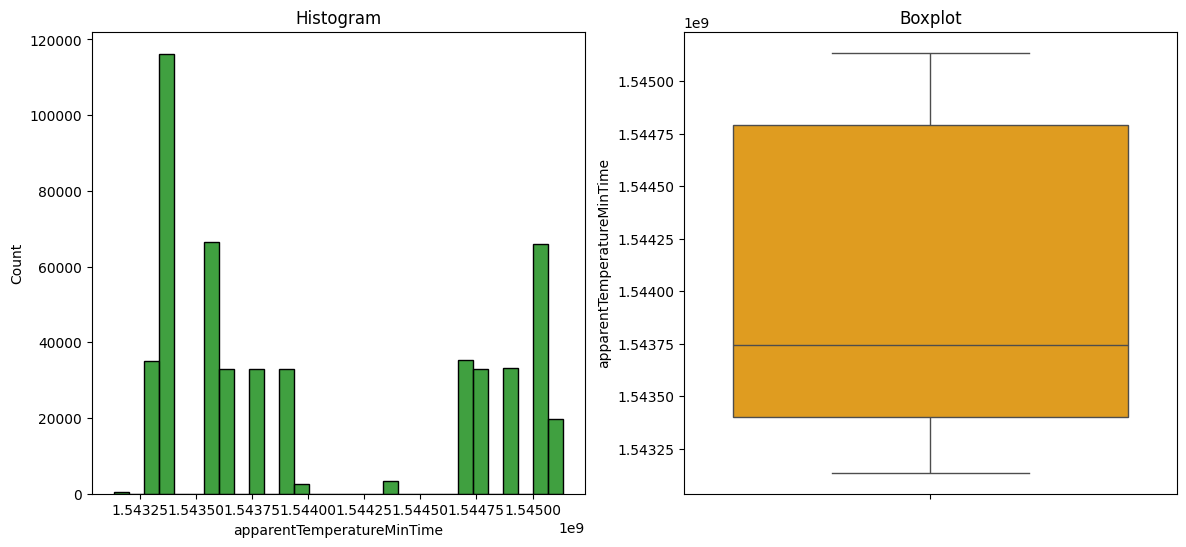


apparentTemperatureMaxTime - Sebelum Capping


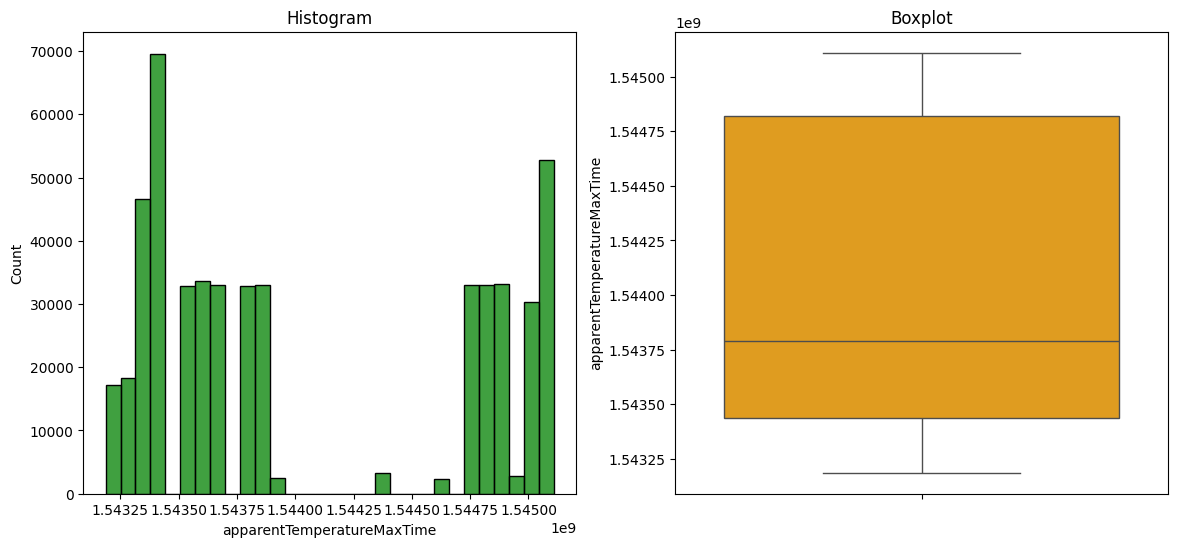


apparentTemperatureMaxTime - Sesudah Capping


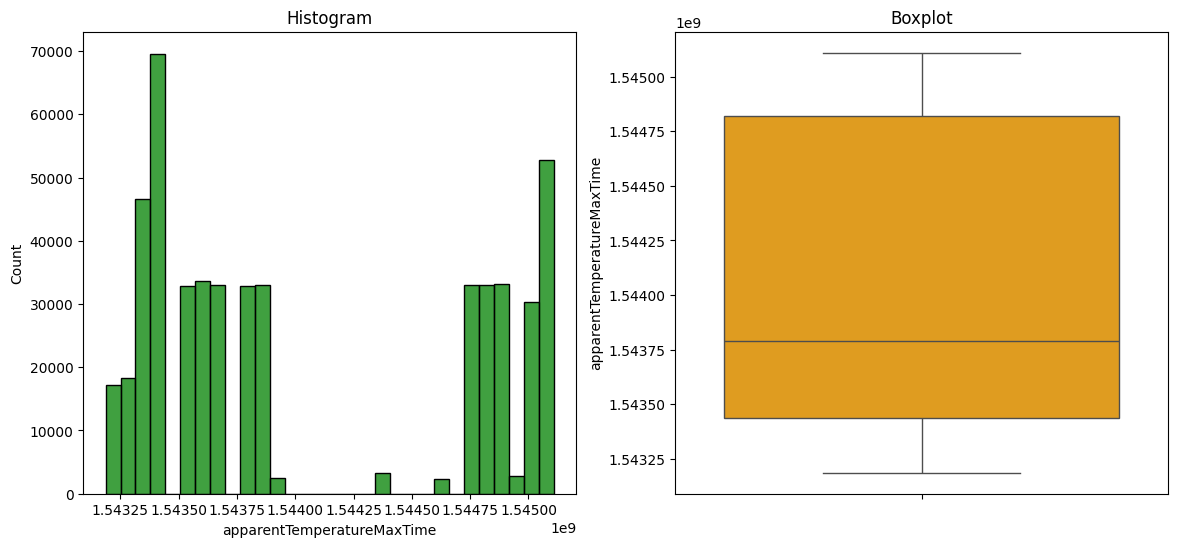


surge_multiplier - Sebelum Capping


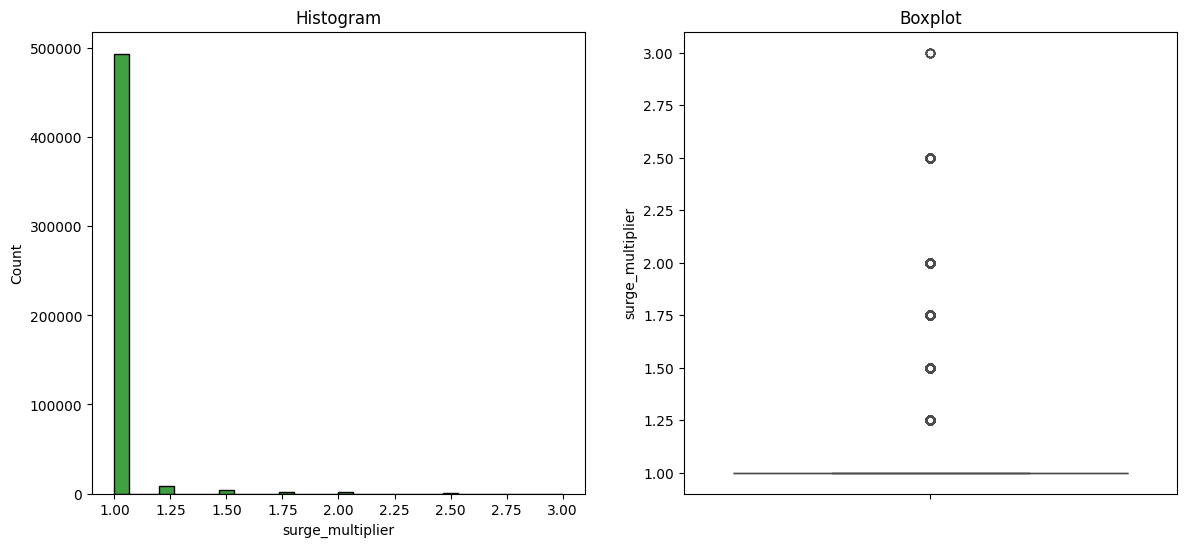


surge_multiplier - Sesudah Capping


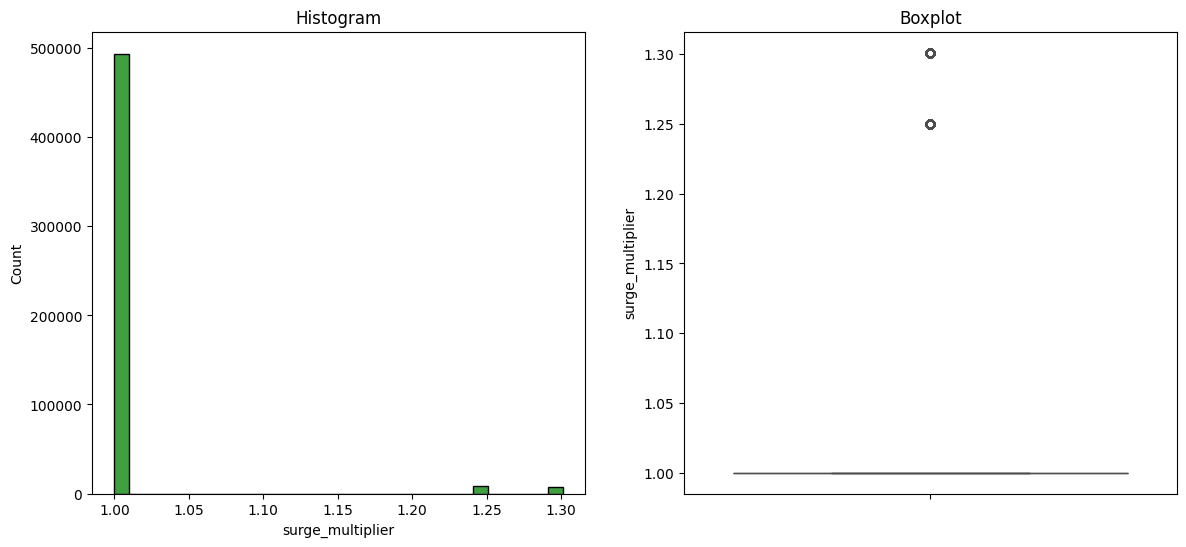


precipIntensity - Sebelum Capping


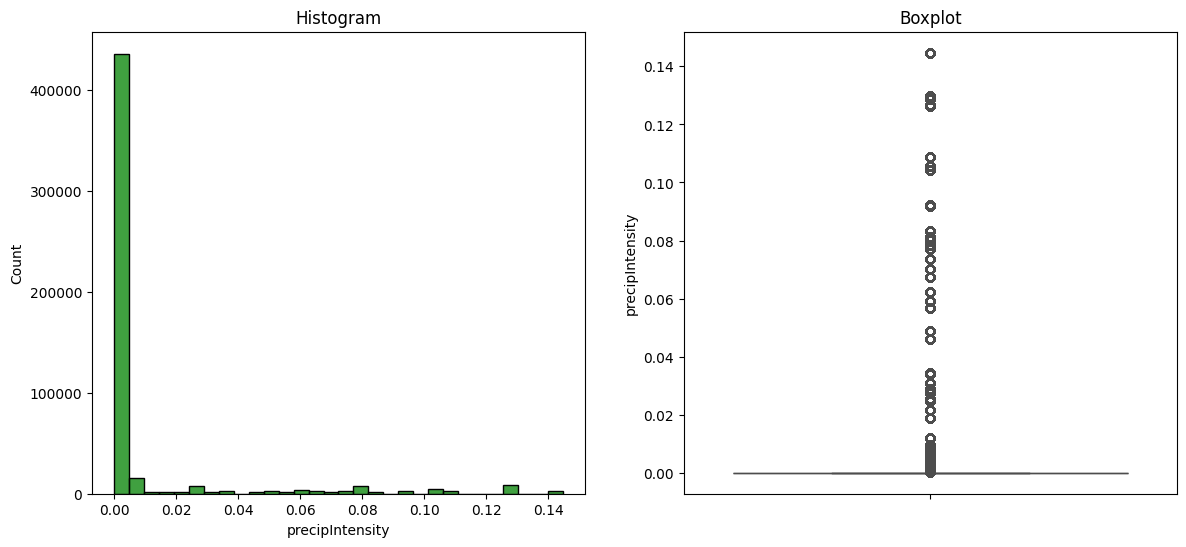


precipIntensity - Sesudah Capping


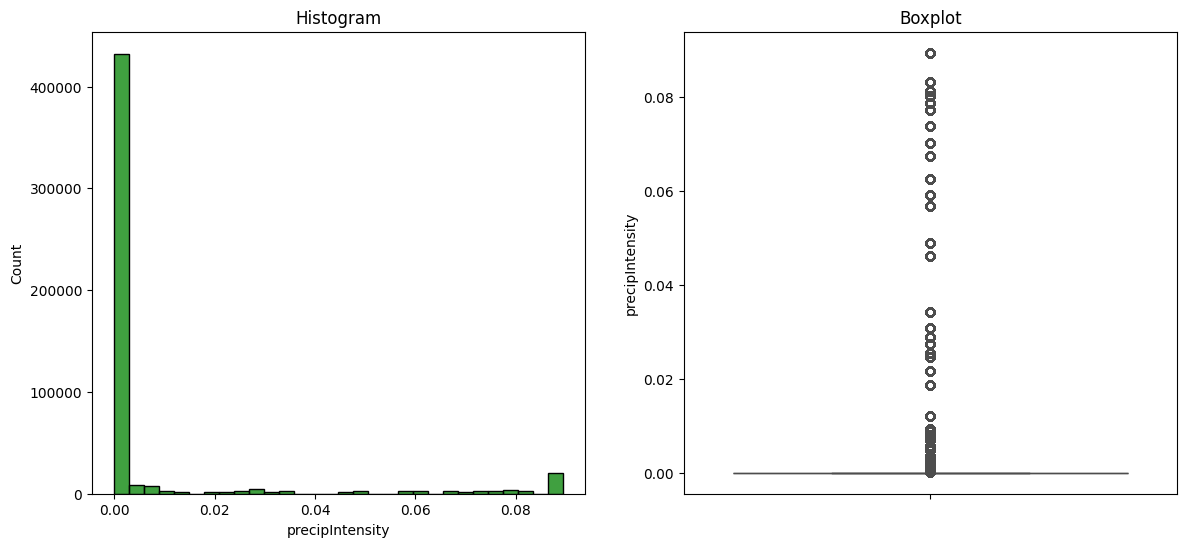


precipProbability - Sebelum Capping


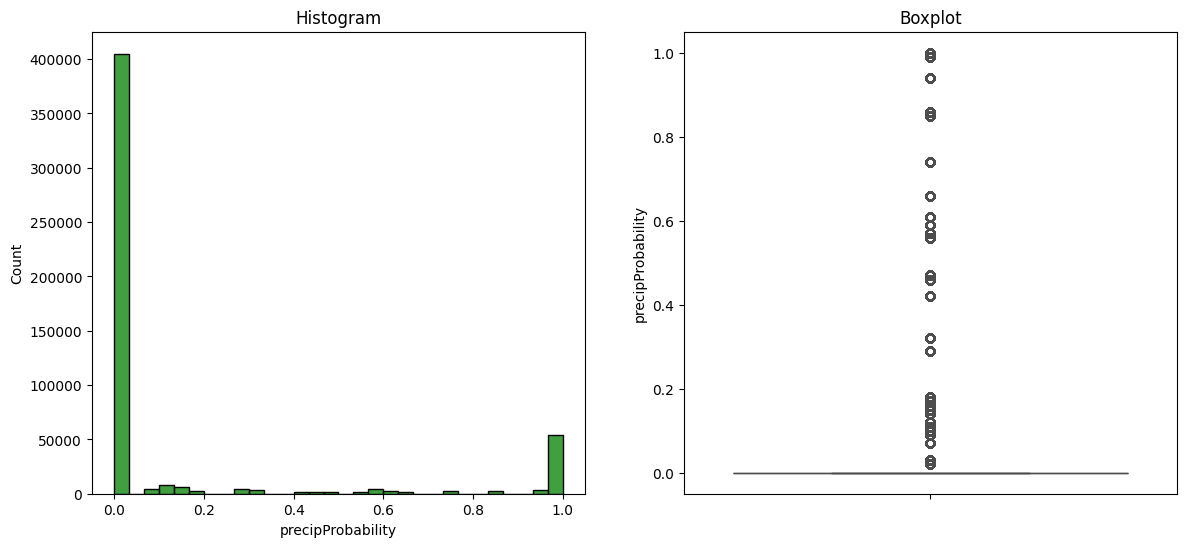


precipProbability - Sesudah Capping


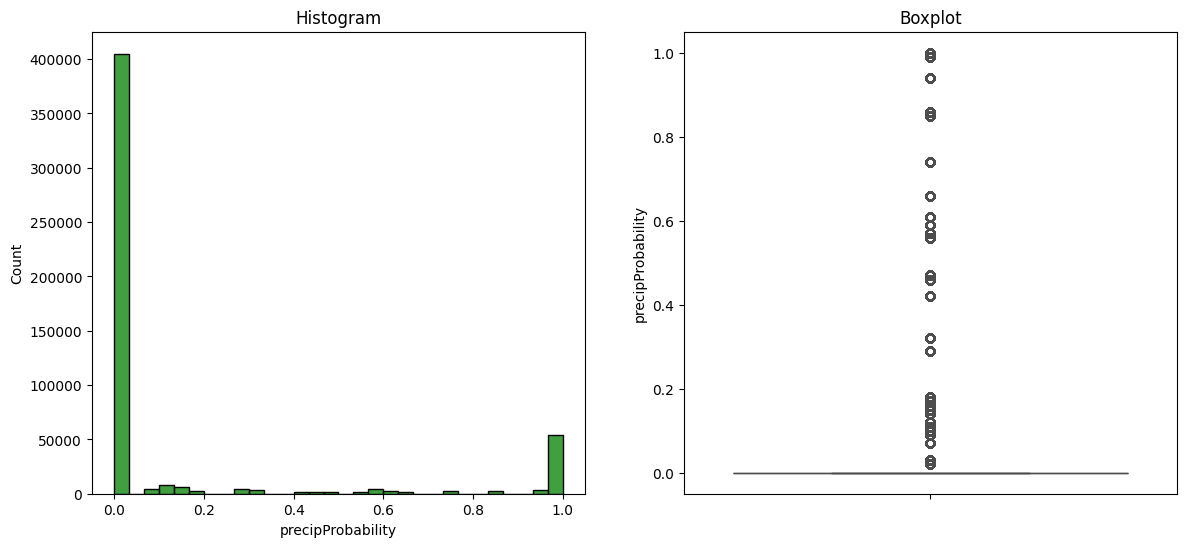


uvIndex - Sebelum Capping


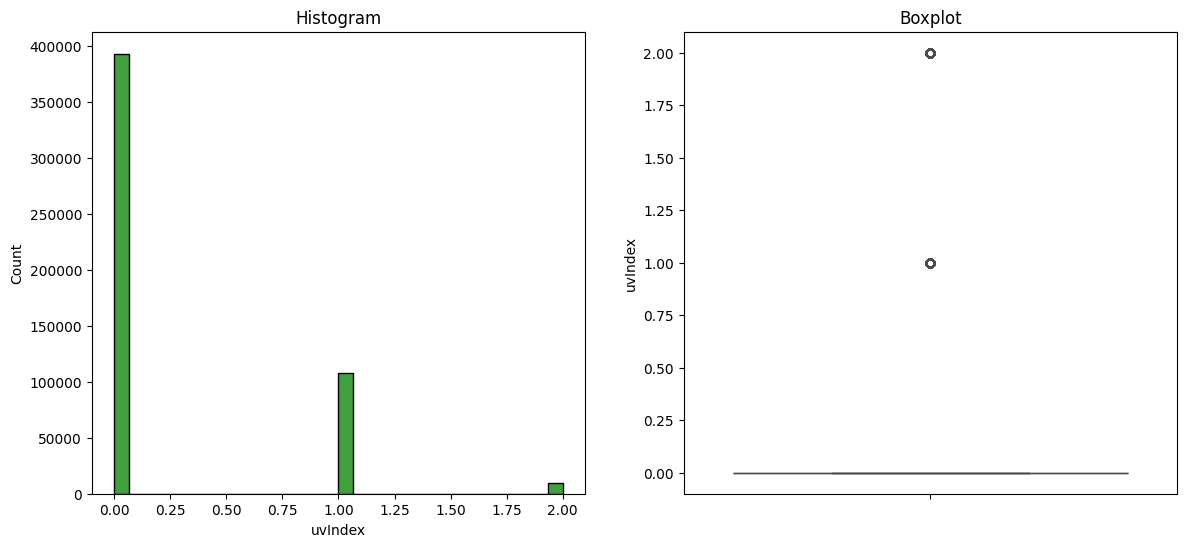


uvIndex - Sesudah Capping


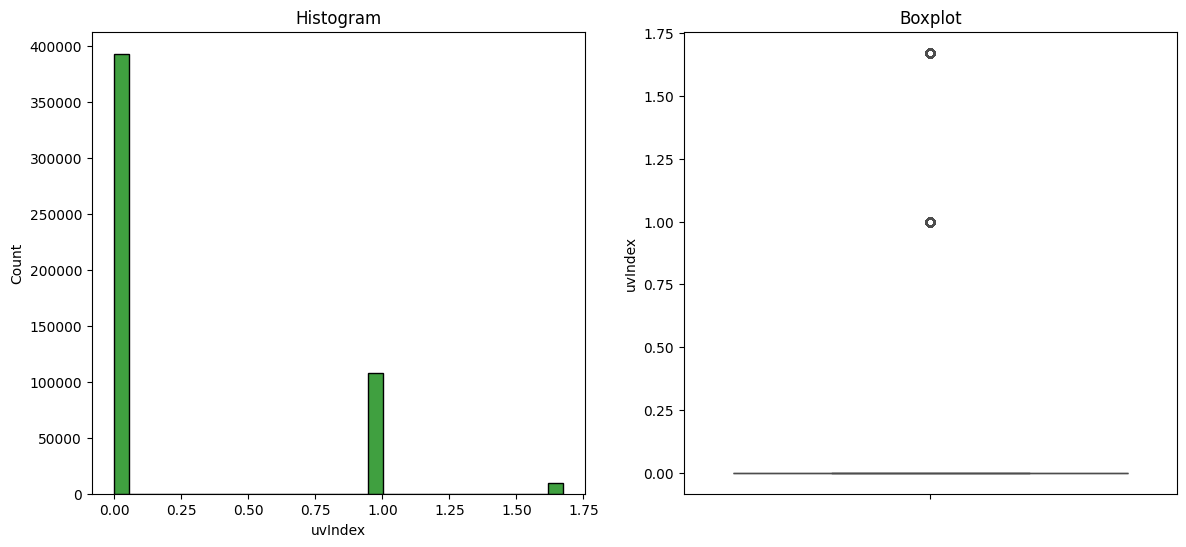

In [35]:
# Hasil yang telah diperoleh berdasarkan distribution normal dan skewed
distribusi_normal = ['timestamp', 'hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime']
distribusi_skewed = ['distance', 'surge_multiplier', 'latitude', 'temperature', 'precipIntensity', 'precipProbability', 'windGust', 'visibility', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'uvIndex', 'visibility.1', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMin', 'apparentTemperatureMax']

# Kolom distribusi skewed
skewed = ['distance', 'latitude', 'temperature', 'windGust', 'visibility', 'apparentTemperatureLow', 'windBearing', 'cloudCover', 'visibility.1', 'precipIntensityMax', 'temperatureMin', 'apparentTemperatureMin', 'apparentTemperatureMax']

# Kolom dengan distribusi normal & yang memiliki variansi rendah
normal = ['timestamp', 'hour', 'day', 'month', 'longitude', 'apparentTemperature', 'humidity', 'windSpeed', 'windGustTime', 'temperatureHigh', 'temperatureHighTime', 'temperatureLow', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLowTime', 'dewPoint', 'pressure', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMinTime', 'apparentTemperatureMaxTime', 'surge_multiplier', 'precipIntensity', 'precipProbability', 'uvIndex']

# Capping distribusi miring dengan metode IQR
winsoriser_skewed = Winsorizer(capping_method='iqr', 
                               tail='both', 
                               fold=3, 
                               variables=skewed)
X_train_capped_skewed = winsoriser_skewed.fit_transform(X_train)
X_test_capped_skewed = winsoriser_skewed.transform(X_test)

# Capping kolom variansi rendah dengan metode Gaussian
winsoriser_low_variance = Winsorizer(capping_method='gaussian', 
                                     tail='both', 
                                     fold=3, 
                                     variables=normal)
X_train_capped_low_variance = winsoriser_low_variance.fit_transform(X_train)
X_test_capped_low_variance = winsoriser_low_variance.transform(X_test)

# Visualisasi distribusi sebelum dan sesudah capping
# Kolom dengan distribusi skewed
print("Visualisasi Distribusi Sebelum dan Sesudah Capping - Kolom dengan distribusi skewed:")
for kolom in skewed:
    print(f'\n{kolom} - Sebelum Capping')
    diagnostic_plots(X_train, kolom)

    print(f'\n{kolom} - Sesudah Capping')
    diagnostic_plots(X_train_capped_skewed, kolom)

# Kolom dengan distribusi normal
print("Visualisasi Distribusi Sebelum dan Sesudah Capping - Kolom dengan distribusi normal:")
for kolom in normal:
    print(f'\n{kolom} - Sebelum Capping')
    diagnostic_plots(X_train, kolom)

    print(f'\n{kolom} - Sesudah Capping')
    diagnostic_plots(X_train_capped_low_variance, kolom)


**Drop Null Values**

In [36]:
Dataset.dropna(axis=0,inplace=True)

In [37]:
print('{} of data is NuLL after dropping'.format(
    str(round(Dataset.isna().sum().sum() / Dataset.size * 100,3))+'%'))

0.0% of data is NuLL after dropping


Kita sudah menghapus data yang memiliki nilai "NULL" yang bertujuan untuk memudahkan kita untuk proses selanjutnya karena data kita sudah bersih

# 3. Feature Engineering

In [38]:
# Membuat dataframe baru untuk melakukan uji korelasi
train_df = pd.concat([X_train, y_train], axis=1)

In [39]:
# Cek ulang mengenai missing value pada dataframe baru
train_df.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatureLow                 0
temperatur

Dari informasi data diatas kita lihat sudah tidak ada missing value yang menandakan data ini sudah siap untuk melakukan proses selanjutnya

**Cek Korelasi Antar Variabel Menggunakan Uji Statistik**
- jika nilai skewness dibawah 0.5, diuji menggunakan metode korelasi Pearson
- jika nilai skewness diatas 0.5, diuji menggunakan metode korelasi Spearman

**Menghitung korelasi antar kolom numerik**

Uji korelasi yang di gunakan adalah Spearman dan Pearson
- Pearson, data terdistribusi normal dan memiliki hubungan linear antar variabel. Maka metode Pearson menjadi pilihan yang tepat. Pearson cenderung memberikan hasil yang akurat ketika hubungan antar variabel dapat dijelaskan dengan baik oleh model linear.
- Spearman, tidak memerlukan data terdistribusi normal atau memiliki hubungan linear. Sehingga cocok digunakan ketika ingin mengeksplorasi korelasi antar variabel tanpa membatasi bentuk atau jenis distribusi dari data

In [40]:
# Inisialisasi daftar untuk menyimpan hasil analisis
hasil = []

# Iterasi melalui kolom-kolom yang Anda ingin analisis
for kolom in num_column:
    # Hitung skewness dari kolom saat ini
    skewness = train_df[kolom].skew()
    
    # Tentukan metode korelasi berdasarkan skewness
    if skewness < 0.5:
        # Uji korelasi menggunakan Pearson
        correlation_coefficient, p_value = pearsonr(train_df['price'], train_df[kolom])
        correlation_type = 'Pearson'
    else:
        # Uji korelasi menggunakan Spearman
        correlation_coefficient, p_value = spearmanr(train_df['price'], train_df[kolom])
        correlation_type = 'Spearman'
    
    # Tentukan keterangan korelasi berdasarkan p-value
    correlation_significance = 'Significant' if p_value <= 0.05 else 'Non Significant'
    
    # Tambahkan hasil analisis ke dalam daftar
    hasil.append({'Column': kolom, 'Corelation': correlation_coefficient, 'p-value': p_value, 'Metode': correlation_type, 'Explenation': correlation_significance})

# Hasil analisis dijadikan DataFrame
hasil_df = pd.DataFrame(hasil)

# Menyimpan hasil dalam DataFrame yang diurutkan berdasarkan nilai korelasi
sorted_hasil = hasil_df.sort_values(by='Corelation', ascending=False)

In [41]:
# Menampilkan hasil uji statistik diatas
sorted_hasil

Kolom  Korelasi   p-value    Metode  \
4                      distance  0.333202  0.000000  Spearman   
5              surge_multiplier  0.165549  0.000000  Spearman   
6                      latitude  0.002819  0.044032   Pearson   
43       apparentTemperatureMax  0.001031  0.461460  Spearman   
23       apparentTemperatureLow  0.000913  0.514188   Pearson   
3                         month  0.000830  0.553394   Pearson   
26                     pressure  0.000754  0.589880   Pearson   
16                   visibility  0.000746  0.594100   Pearson   
30                 visibility.1  0.000746  0.594100   Pearson   
28                   cloudCover  0.000598  0.668985   Pearson   
13                    windSpeed  0.000581  0.677871   Pearson   
1                          hour  0.000544  0.697707   Pearson   
9           apparentTemperature  0.000444  0.751132   Pearson   
8                   temperature  0.000372  0.790361   Pearson   
15                 windGustTime  0.000241  0.863104   Pearson   
42   apparentTemperatureMinTime  0.000216  0.877247   Pearson   
38           temperatureMinTime  0.000163  0.907540   Pearson   
0                     timestamp  0.000157  0.910534   Pearson   
36                  uvIndexTime  0.000132  0.924879   Pearson   
32                  sunriseTime  0.000128  0.927120   Pearson   
33                   sunsetTime  0.000128  0.927150   Pearson   
24   apparentTemperatureLowTime  0.000125  0.928746   Pearson   
40           temperatureMaxTime  0.000122  0.930467   Pearson   
18          temperatureHighTime  0.000112  0.936251   Pearson   
20           temperatureLowTime  0.000112  0.936470   Pearson   
44   apparentTemperatureMaxTime  0.000101  0.942265   Pearson   
22  apparentTemperatureHighTime  0.000093  0.946957   Pearson   
10              precipIntensity  0.000069  0.960577  Spearman   
11            precipProbability  0.000065  0.963096  Spearman   
29                      uvIndex  0.000047  0.972963  Spearman   
14                     windGust  0.000021  0.987833  Spearman   
19               temperatureLow  0.000010  0.994287   Pearson   
21      apparentTemperatureHigh -0.000039  0.977839   Pearson   
25                     dewPoint -0.000273  0.845298   Pearson   
35           precipIntensityMax -0.000296  0.832414  Spearman   
37               temperatureMin -0.000386  0.782666   Pearson   
41       apparentTemperatureMin -0.000391  0.779990   Pearson   
17              temperatureHigh -0.000395  0.777976   Pearson   
31                        ozone -0.000419  0.764640   Pearson   
39               temperatureMax -0.000502  0.719879   Pearson   
2                           day -0.001117  0.424931   Pearson   
34                    moonPhase -0.001152  0.410387   Pearson   
12                     humidity -0.001202  0.390591   Pearson   
7                     longitude -0.001354  0.333224   Pearson   
27                  windBearing -0.002017  0.149497   Pearson   

          Keterangan  
4         Signifikan  
5         Signifikan  
6         Signifikan  
43  Tidak Signifikan  
23  Tidak Signifikan  
3   Tidak Signifikan  
26  Tidak Signifikan  
16  Tidak Signifikan  
30  Tidak Signifikan  
28  Tidak Signifikan  
13  Tidak Signifikan  
1   Tidak Signifikan  
9   Tidak Signifikan  
8   Tidak Signifikan  
15  Tidak Signifikan  
42  Tidak Signifikan  
38  Tidak Signifikan  
0   Tidak Signifikan  
36  Tidak Signifikan  
32  Tidak Signifikan  
33  Tidak Signifikan  
24  Tidak Signifikan  
40  Tidak Signifikan  
18  Tidak Signifikan  
20  Tidak Signifikan  
44  Tidak Signifikan  
22  Tidak Signifikan  
10  Tidak Signifikan  
11  Tidak Signifikan  
29  Tidak Signifikan  
14  Tidak Signifikan  
19  Tidak Signifikan  
21  Tidak Signifikan  
25  Tidak Signifikan  
35  Tidak Signifikan  
37  Tidak Signifikan  
41  Tidak Signifikan  
17  Tidak Signifikan  
31  Tidak Signifikan  
39  Tidak Signifikan  
2   Tidak Signifikan  
34  Tidak Signifikan  
12  Tidak Signifikan  
7   Tidak Signifikan  


Dari data diatas bisa kita features/kolom numerikal yang berkolerasi kuat dengan price adalah distance, latitude dan surge_multiplier. Setelah kita mengetahui features/kolom yang berpengaruh terhadap price selanjutnya kita mencari tahu features/kolom yang berkolerasi pada kolom kategorikal.

**Menghitung kolerasi kolom/features kategorikal**

Pada uji korelasi untuk features - features kategorikal kita memutuskan untuk memakai kolerasi analisi kendall sebagai metode analisis didasarkan pada keunggulannya dalam mengukur tingkat hubungan atau korelasi antara dua variabel ordinal atau kategorikal. Metode ini tidak memerlukan asumsi distribusi dari variabel-variabel yang diuji, sehingga menawarkan fleksibilitas yang lebih tinggi dalam berbagai situasi analisis. Keunggulan ini membuat Kendall's Tau sangat cocok untuk diterapkan pada data yang tidak mengikuti distribusi normal, memberikan hasil yang lebih andal dan relevan dalam berbagai konteks penelitian.

Kolom ID, timestamp, datetime, timezone memiliki tipe data object akan tetapi 4 kolom tersebut tidak termasuk kolom kategorikal berarti kita akan melakukan pemisahan.

In [42]:
# Kolom yang tidak diikut sertakan dari kategori kolom
except_column = ['id', 'timestamp', 'datetime', 'timezone']

# Menyaring kolom yang bertipe kategorikal
categorikal_column = X_train.columns[(X_train.dtypes == 'object') & (~X_train.columns.isin(except_column))]


In [43]:
# Dictionary untuk menyimpan nilai korelasi Kendall dan p-value
kendall_correlation = {}

# Loop melalui setiap kolom kategori (cat_cols)
for kolom in categorikal_column:
    # Hitung korelasi Kendall antara kolom saat ini dan variabel target (price)
    kendall_corr, p_value = kendalltau(train_df['price'], train_df[kolom])
    
    # Tentukan keterangan korelasi berdasarkan p-value
    correlation_significance = 'Significant' if p_value <= 0.05 else 'Non Significant'
    
    # Simpan nilai korelasi dan p-value dalam dictionary
    kendall_correlation[kolom] = {'Kendall Correlation': kendall_corr, 'P-value': p_value, 'Explanation': correlation_significance}

# Konversi hasil analisis ke dalam DataFrame
kendall_df = pd.DataFrame.from_dict(kendall_correlation, orient='index')
kendall_df.index.name = 'Column'

# Tampilkan hasil dengan pengurutan berdasarkan p-value
kendall_df_sorted = kendall_df.sort_values(by='P-value')

In [44]:
# Menampilkan hasil analisis
kendall_df_sorted

Kendall Correlation        P-value      Explanation
Column                                                            
cab_type                 -0.056841   0.000000e+00      Significant
product_id                0.050775   0.000000e+00      Significant
name                     -0.397222   0.000000e+00      Significant
destination              -0.031516  4.214303e-223      Significant
source                   -0.012358   7.187636e-36      Significant
icon                      0.002088   4.488986e-02      Significant
long_summary              0.000542   5.967939e-01  Non Significant
short_summary             0.000030   9.770361e-01  Non Significant

Kesimpulan 

Dari data - data diatas kita sudah memisahkan antara kolom numerikal dan kategorikal, ini bertujuan untuk melihat kolom/features apa saja yang berpengaruh terhadap target. Ini bertujuan untuk mempermudah dalam melakukan modelling nantinya karena kita hanya menggunakkan kolom/features yang berkolerasi terhadap target(price) saja. Kolom/features yang kita tidak pakai memiliki alasan berbagai macam tetapi kita sudah melakukan uji statistik untuk melihat kolom apa saja yang bisa berpengaruh terhadap target. Uji tersebut mempercepat kita dalam memilih tanpa harus melihat isi kolom tersebut.

Kolom numerikal yang memiliki korelasi kuat dengan 'price' :
1. distance
2. surge multiplier

Kolom kategorikal yang memiliki korelasi kuat dengan 'price' :
1. cab_type
2. name
3. product_id (tidak termasuk kolom yang berkorelasi walaupun p-value nya menunjukan korelasi)
4. destination
5. source
6. icon

Tujuan dari pemisahan ini kita hanya ingin menggunakkan kolom/features yang berpengaruh terhadap target dan ini juga mempermudah nanti saat melakukan proses modelling

In [45]:
# Split antara kolom numerik dan kategorikal
selected_numeric_cols = ['distance', 'surge_multiplier']
selected_categorical_cols = ['cab_type', 'name', 'destination', 'source', 'icon']
df_selected = selected_numeric_cols + selected_categorical_cols

**Melakukan Scaling & Encoding**

In [46]:
# Split train set ke numerik dan kategorikal
X_train_num = X_train[selected_numeric_cols]
X_train_cat = X_train[selected_categorical_cols]

# Split test set ke numerik dan kategorikal
X_test_num = X_test[selected_numeric_cols]
X_test_cat = X_test[selected_categorical_cols]

# Menampilkan bentuk data
X_train_cat.head()

cab_type          name         destination            source  \
500082     Lyft  Lux Black XL            West End     South Station   
21973      Lyft       Lyft XL   Boston University          Back Bay   
476130     Lyft       Lyft XL           North End          West End   
555669     Lyft           Lux  Financial District     South Station   
292737     Uber     Black SUV              Fenway  Theatre District   

                         icon  
500082     partly-cloudy-day   
21973                   rain   
476130   partly-cloudy-night   
555669   partly-cloudy-night   
292737     partly-cloudy-day

In [47]:
# Menampilkan kolom numerikal
X_train_num.head()

distance  surge_multiplier
500082      1.66               1.0
21973       1.71               1.0
476130      1.10               1.0
555669      0.57               1.0
292737      2.66               1.0

Alasan kita memilih kolom/features diatas adalah
Untuk menentukan apakah variabel seperti `distance`, `surge_multiplier`, `cab_type`, `name`, `destination`, `source`, dan `weather` berpengaruh terhadap harga Uber, kita perlu memahami bagaimana masing-masing variabel ini dapat mempengaruhi harga. Berikut adalah penjelasan singkat tentang pengaruh potensial dari setiap variabel:

1. **Distance (Jarak)**: Semakin jauh jarak perjalanan, biasanya semakin tinggi harga Uber. Ini karena harga Uber/lyft biasanya dihitung berdasarkan jarak tempuh.

2. **Surge Multiplier (Pengganda Harga)**: Pengganda harga (surge multiplier) adalah faktor yang sangat mempengaruhi harga Uber. Pada saat permintaan tinggi, Uber menerapkan pengganda ini untuk menaikkan harga, sehingga penumpang membayar lebih untuk perjalanan yang sama. Biasanya terjadi saat jam pulang kerja, hari raya dan tanggal merah.

3. **Cab Type (Tipe Kendaraan)**: Tipe kendaraan yang dipilih (misalnya, UberX, Uber Black, UberPOOL) juga berpengaruh terhadap harga. Tipe kendaraan yang lebih mewah atau eksklusif biasanya memiliki tarif dasar yang lebih tinggi.

4. **Name (Nama Layanan)**: Nama layanan dalam konteks ini bisa merujuk pada jenis layanan spesifik dari Uber, seperti UberPOOL, UberX, UberXL, dsb. Masing-masing layanan ini memiliki struktur harga yang berbeda, sehingga jenis layanan yang dipilih akan mempengaruhi harga.

5. **Destination (Tujuan)**: Meskipun tujuan secara langsung tidak mempengaruhi harga, rute ke tujuan tersebut bisa berpengaruh. Misalnya, tujuan yang terletak di daerah dengan lalu lintas padat bisa menyebabkan kenaikan harga karena waktu tempuh yang lebih lama.

6. **Source (Sumber/Asal)**: Lokasi penjemputan juga bisa mempengaruhi harga. Misalnya, penjemputan dari lokasi yang sulit dijangkau atau daerah dengan permintaan tinggi bisa menyebabkan harga lebih tinggi.

7. **Icon (Cuaca)**: Kondisi cuaca buruk, seperti hujan lebat atau salju, dapat meningkatkan permintaan untuk layanan Uber/lyft, yang kemudian dapat memicu surge pricing dan meningkatkan harga. Selain itu, cuaca buruk bisa memperlambat perjalanan, sehingga meningkatkan biaya perjalanan.

Secara keseluruhan, berbagai variabel ini dapat mempengaruhi harga Uber dengan cara yang beragam dan kompleks. Setiap variabel membawa dampak unik terhadap penetapan tarif, berkontribusi melalui mekanisme yang berbeda. Dengan demikian, kombinasi dari faktor-faktor ini menciptakan model penetapan harga yang dinamis dan beragam untuk layanan Uber.

**Encoding**

 Alasan dipilihnya encoding jenis OneHotEncoder karena sangat sesuai untuk jenis data yang kategorinya bersifat nominal, yaitu data yang tidak memiliki hubungan ordinal atau tingkat urutan yang bermakna antar kategori. OneHotEncoder bekerja dengan cara mengubah setiap kategori unik menjadi kolom biner tersendiri, memastikan bahwa tidak ada nilai numerik yang dapat diinterpretasikan secara keliru sebagai urutan atau peringkat tertentu antara kategori-kategori tersebut. Teknik ini sangat efektif untuk memastikan bahwa model machine learning tidak menganggap adanya hierarki atau prioritas di antar kategori.

In [48]:
# Memanggil Encoder
encoder = OneHotEncoder()

# Fit the Encoder
encoder.fit(X_train_cat)

# Transform the data
X_train_cat_encode = encoder.transform(X_train_cat)
X_test_cat_encode = encoder.transform(X_test_cat)

In [49]:
# Gabungkan data numerikal dan data kategorikal yang telah diencode
X_train_encoded = pd.concat([X_train_num.reset_index(drop=True), pd.DataFrame(X_train_cat_encode.toarray())], axis=1)
X_test_encoded = pd.concat([X_test_num.reset_index(drop=True), pd.DataFrame(X_test_cat_encode.toarray())], axis=1)

X_train_encoded = pd.concat([X_train_num.reset_index(drop=True), pd.DataFrame(X_train_cat_encode.toarray())], axis=1)

**Scaling**

 Alasan dipilihnya MinMaxScaler karena kemampuannya yang unggul dalam memelihara rentang asli data, yang sangat penting untuk menjaga integritas dan konsistensi informasi. Selain itu, MinMaxScaler mampu menghindari perubahan distribusi data secara signifikan, sehingga struktur data tetap terjaga. Keunggulan lainnya adalah kemampuannya dalam mengurangi efek outlier, berkat rentang yang lebih kecil yang dihasilkan, sehingga outlier memiliki pengaruh yang lebih minimal terhadap keseluruhan dataset.

In [50]:
# Merubah nama kolom menjadi string
X_train_encoded.columns = [str(col) for col in X_train_encoded.columns]
X_test_encoded.columns = [str(col) for col in X_test_encoded.columns]

# Memanggil MinMaxScaler
scaler = MinMaxScaler()

# Fit scaler pada data numerikal 
scaler.fit(X_train_encoded)

# Transformasi data numerikal 
X_train_scaled = scaler.transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# 4. Model Definition

1. Algoritma yang dipakai adalah **Linear Regression**
   - Alasan : Karena target data yang akan diprediksi bernilai continuous yaitu total harga (price).

2. Metrics yang akan dipakai adalah **Mean Absolute Error (MAE)**
   * Alasan : Karena mudah untuk dipahami dan data numerik memiliki persentase outlier tidak signifikan (< 5%).

3. Metrics lain yang akan dipakai adalah **R2 - score**
   * Alasan : Untuk melihat performa model regresi linear berdasarkan kemampuan prediksi variance pada target (y = price)

# 5. Model Training

In [51]:
# Memanggil Model
Lr = LinearRegression()

In [52]:
# Train model 
Lr.fit(X_train_scaled, y_train)

LinearRegression()

Kesimpulan

- Model yang digunakan adalah **Linear Regression**, karena hubungan antara variabel dependen dan variabel independen bersifat linear. Ini berarti bahwa setiap perubahan pada variabel independen berkontribusi secara proporsional terhadap perubahan pada variabel dependen. Model ini dianggap efektif dalam menangkap pola dan tren linier yang mungkin ada dalam data, sehingga memungkinkan kita untuk memahami dan memprediksi perilaku variabel dependen berdasarkan perubahan pada variabel independen dengan akurasi yang lebih baik.

- **Linear Regression** sering kali diterapkan dalam berbagai kasus, seperti memprediksi nilai, rating dan harga karena memiliki sifat continue. Model ini tidak hanya membantu dalam memprediksi, tetapi juga memberikan wawasan yang berharga tentang hubungan antara variabel-variabel tersebut. Dengan menganalisis koefisien regresi, kita dapat memahami seberapa besar pengaruh setiap variabel independen terhadap variabel dependen, serta menentukan signifikansi dari masing-masing variabel dalam konteks model yang lebih luas. Model ini, dengan kemampuannya yang kuat untuk menjelaskan dan memprediksi, menjadi alat yang sangat berguna dalam analisis data dan pengambilan keputusan berbasis data.

Dan selanjutnya kita menggunakkan metode ordinary least square karena metode ini yang cocok di gunakan untuk data yang kita punya untuk melakukan prediksi.

# 6. Model Evaluation

In [53]:
# Mengevaluasi model performance train & test set
y_pred_train = Lr.predict(X_train_scaled)
y_pred_test = Lr.predict(X_test_scaled)

# Metric Evaluation
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set : ', mean_absolute_error(y_test, y_pred_test))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))
print('')

MAE - Train Set :  1.746090690762125
MAE - Test Set :  1.7597167663397215

MSE - Train Set  :  6.17451804746646
MSE - Test Set   :  6.337041257904451

RMSE - Train Set :  2.4848577519581396
RMSE - Test Set  :  2.5173480605399905

R2 Score - Train Set :  0.9288421976965573
R2 Score - Test Set  :  0.9276829952034736



c:\Users\62811\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\62811\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Kesimpulan

Tujuan utama dari evaluasi model adalah untuk mengukur kinerja dan efektivitas model yang telah dibangun dalam memecahkan masalah tertentu. Melalui proses evaluasi ini, kita dapat menilai apakah model tersebut memenuhi harapan dan standar yang ditetapkan, serta mengidentifikasi features - features yang memerlukan perbaikan atau penyempurnaan. Dengan demikian, evaluasi model bukan hanya berfungsi sebagai alat ukur, tetapi juga sebagai panduan untuk mengoptimalkan dan meningkatkan kualitas model secara keseluruhan.

- MAE mengukur rata-rata dari selisih nilai absolut/mutlak antara nilai prediksi dan nilai sebenarnya, dimana nilai MAE memberikan informasi tentang kesalahan prediksi secara langsung.
- R2 mengukur seberapa baik variabilitas dari variabel dependen. R2 memberikan gambaran mengenai seberapa baik model sesuai dengan data keseluruhan.
- Dalam konteks distribusi harga yang berkisar 0-40$, nilai MAE 1.75 dapat dianggap relatif baik. Hal ini menunjukkan bahwa rata-rata selisih antara nilai prediksi dan nilai aktual sekitar 1.75$. Dengan rentang harga tersebut, MAE 1.75 mungkin dianggap sebagai kesalahan yang cukup rendah.
- Dengan R2 sebesar 0.92 menandakan sekitar 92% variabilitas dalam variabel target (harga perjalanan) dapat dijelaskan oleh fitur atau variabel independen dalam model.

# 7. Model Saving

In [54]:
# Menyimpan list kolom kategorikal
with open('list_cat_cols.txt', 'w') as file_1:
  json.dump(selected_categorical_cols, file_1)

# Menyimpan list kolom numerikal;
with open('list_num_kols.txt', 'w') as file_2:
  json.dump(selected_numeric_cols, file_2)

# Menyimpan Encoder
with open('encoder.pkl', 'wb') as file_3:
  pickle.dump(encoder, file_3)

# Menyimpan scaler
with open('scaler.pkl', 'wb') as file_4:
  pickle.dump(scaler, file_4)

# Menyimpan model
with open('model.pkl', 'wb') as file_5:
  pickle.dump(Lr, file_5)

Setelah selesai melakukan pembuatan model. kita nanti akan menguji model yang telat kita buat ke data asli dari tugas ini untuk menguji model yang sudah dilatih sebelumnya.

# 8. Model Inference

In [55]:
# Memuat model
with open('model.pkl', 'rb') as file_1:
  Lr = pickle.load(file_1)

# Memuat list kolom numerikal
with open('list_num_kols.txt', 'r') as file_2:
    selected_numeric_cols = json.load(file_2)

# Memuat list kolom kategorikal from the JSON file
with open('list_cat_cols.txt', 'r') as file_3:
    selected_categorical_cols = json.load(file_3)

# Memuat encoder
with open('encoder.pkl', 'rb') as file_4:
  encoder = pickle.load(file_4)

# Memuat scaler
with open('scaler.pkl', 'rb') as file_5:
  scaler = pickle.load(file_5)

Membuat data sample dari data asli untuk melakukan prediksi model yang sudah kita buat.

In [56]:
dataset_sample = pd.DataFrame([{
    'id': '424553bb-7174-41ea-aeb4-fe06d4f4b9d7',
    'timestamp': 1543284023.677,
    'hour': 2,
    'day': 27,
    'month':11,
    'datetime':'2018-11-27',
    'timezone':'America/New_York',
    'source':'Haymarket Square',
    'destination':'North Station',
    'cab_type':'Lyft',
    'product_id':'lyft_premier',
    'name':'Lux',
    'price':11,
    'distance':0.44,
    'surge_multiplier':1,
    'latitude':42.2148,
    'longitude':-71.033,
    'temperature':43.58,
    'apparentTemperature':37.35,
    'short_summary':'Rain',
    'long_summary':'Rain until morning, starting again in the evening.',
    'precipIntensity':0.1299,
    'precipProbability':1,
    'humidity':0.94,
    'windSpeed':11.98,
    'windGust':11.98,
    'windGustTime':1543291200,
    'visibility':4.786,
    'temperatureHigh':47.3,
    'temperatureHighTime':1543251600,
    'temperatureLow':42.1,
    'temperatureLowTime':1543298400,
    'apparentTemperatureHigh':43.92,
    'apparentTemperatureHighTime':1543251600,
    'apparentTemperatureLow':36.2,
    'apparentTemperatureLowTime':1543291200,
    'icon':'rain',
    'dewPoint':41.83,
    'pressure':1003.97,
    'windBearing':90,
    'cloudCover':1,
    'uvIndex':0,
    'visibility.1':4.786,
    'ozone':291.1,
    'sunriseTime':1543232969,
    'sunsetTime':1543266992,
    'moonPhase':0.64,
    'precipIntensityMax':0.13,
    'uvIndexTime':1543251600,
    'temperatureMin':40.49,
    'temperatureMinTime':1543233600,
    'temperatureMax':47.3,
    'temperatureMaxTime':1543251600,
    'apparentTemperatureMin':36.2,
    'apparentTemperatureMinTime':1543291200,
    'apparentTemperatureMax':43.92,
    'apparentTemperatureMaxTime':1543251600
}])

dataset_sample

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.543284e+09     2   27     11   

     datetime          timezone            source    destination cab_type  \
0  2018-11-27  America/New_York  Haymarket Square  North Station     Lyft   

   ... precipIntensityMax uvIndexTime  temperatureMin  temperatureMinTime  \
0  ...               0.13  1543251600           40.49          1543233600   

   temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
0            47.3          1543251600                    36.2   

   apparentTemperatureMinTime  apparentTemperatureMax  \
0                  1543291200                   43.92   

  apparentTemperatureMaxTime  
0                 1543251600  

[1 rows x 57 columns]

**Inference Feature Engineering**

In [57]:
# Split kategorikal dan numerikal
Data_numerical = Dataset[selected_numeric_cols]
Data_categorical = Dataset[selected_categorical_cols]

# Encode kategorikal
data_cat_encode = encoder.transform(Data_categorical)

# Concatenate
data_final = np.concatenate([Data_numerical, data_cat_encode.toarray()], axis=1)

# Scale numerikal
data_scaled = scaler.transform(data_final)

c:\Users\62811\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


**Inference Prediction**

In [58]:
# Prediksi model
predictions = Lr.predict(data_scaled)

# Hasil yang diperoleh
print(f'Biaya ongkos perjalanan aplikasi ride hailing adalah {predictions[0]:,.2f}')

Biaya ongkos perjalanan aplikasi ride hailing adalah 1.47


In [59]:
# Intercept
intercept = Lr.intercept_
# Koefisien
coefficients = Lr.coef_
print("Intercept:", intercept)
print("Coefficients:", coefficients)

Intercept: 27229230703.880745
Coefficients: [ 2.26574988e+01  3.68435445e+01  3.77015151e+10  1.72078861e+11
 -4.54035273e+10 -4.54035272e+10  8.89738188e+10  8.89738188e+10
  8.89738188e+10  8.89738188e+10  8.89738188e+10  8.89738188e+10
 -4.54035273e+10 -4.54035273e+10 -4.54035273e+10 -4.54035273e+10
 -1.58185671e+11 -1.58185671e+11 -2.63365491e+11 -2.63365491e+11
 -1.58185671e+11 -2.63365491e+11 -2.63365491e+11 -1.58185671e+11
 -2.63365491e+11 -2.63365491e+11 -1.58185671e+11 -1.58185671e+11
  4.06657970e+09  4.06657970e+09 -1.01113241e+11 -1.01113241e+11
  4.06657970e+09 -1.01113241e+11 -1.01113241e+11  4.06657970e+09
 -1.01113241e+11 -1.01113241e+11  4.06657970e+09  4.06657970e+09
  1.05394347e+11  1.05394347e+11  1.05394347e+11  1.05394347e+11
  1.05394347e+11  1.05394347e+11  1.05394347e+11]


Penjelasan untuk intercept negatif dalam konteks harga perjalanan ride-hailing:

Intercept negatif dapat terjadi karena model regresi tidak mempertimbangkan semua faktor yang memengaruhi harga perjalanan. Misalnya, jika hanya jarak perjalanan dan surge multiplier yang dipertimbangkan, tanpa memasukkan waktu, cuaca, atau kondisi lalu lintas, intercept bisa menjadi negatif. Selain itu, perbedaan skala variabel independen (seperti jarak yang besar dibandingkan dengan surge multiplier) juga dapat mempengaruhi nilai intercept.

Penjelasan untuk slope negatif dalam konteks harga perjalanan ride-hailing:

Slope negatif menunjukkan hubungan terbalik antara variabel independen dan dependen. Sebagai contoh, koefisien negatif untuk jarak perjalanan bisa menunjukkan bahwa semakin jauh jaraknya, semakin rendah harga perjalanan karena adanya diskon untuk jarak yang lebih panjang. Variasi harga juga dapat dipengaruhi oleh faktor-faktor kompleks seperti waktu, permintaan, cuaca, dan promosi, yang mungkin tidak dimasukkan dalam model.

**Assumption of Linear Regression**
1. No or Little Multicollinearity
2. Multivariate Normality
3. No Auto-Correlation
4. Homoscedasticity

Tujuan dari Assumption of Linear Regression kita ingin melihat features/kolom apa saja yang memiliki kolerasi terhadap kolom target(price) dari menampilkan gambar - gambar mempermudah kita dalam mengambil kesimpulan nantinya

**1. No or Little Multicollinearity**

Multicollinearity merupakan fenomena di mana dua atau lebih variabel independen dalam model regresi memiliki korelasi yang tinggi satu sama lain. Kondisi ini bisa menyebabkan berbagai masalah dalam analisis regresi, termasuk inflasi variansi koefisien regresi, yang dapat membuat estimasi model menjadi tidak stabil dan sulit diinterpretasikan..

In [61]:
# Create a function to calculate Variance Inflation Factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [62]:
# Check Multicolinearity pada X
calc_vif(X_train_num)

variables      VIF
0          distance  4.61244
1  surge_multiplier  4.61244

Berdasarkan analisis nilai Variance Inflation Factor (VIF), kolom surge_multiplier menunjukkan nilai yang rendah. Dalam konteks statistik, nilai VIF yang dianggap rendah adalah yang berada di bawah angka 5. Oleh karena itu, nilai VIF yang rendah ini menunjukkan bahwa tidak terdapat multikolinearitas yang signifikan dalam kolom surge_multiplier. Dengan kata lain, kolom surge_multiplier tidak memiliki hubungan linear yang kuat dengan variabel independen lainnya dalam model regresi, yang memastikan bahwa hasil analisis regresi tidak terdistorsi oleh multikolinearitas.

**2. Multivariate Normality**

Asumsi bahwa sekelompok variabel mengikuti distribusi normal multivariat. Ini berarti bahwa setiap variabel dalam kelompok tersebut, serta semua kombinasi linear dari variabel-variabel tersebut, memiliki distribusi normal.

In [63]:
# Get residuals
y_test_residuals = y_test - y_pred_test
y_test_residuals

440790   -3.737236
485427   -0.831825
601883   -1.480141
88553    -1.822136
243796   -0.720253
            ...   
384276    0.404121
346884   -0.732170
607122   -0.055977
193665   -0.303886
161611   -2.603462
Name: price, Length: 127586, dtype: float64

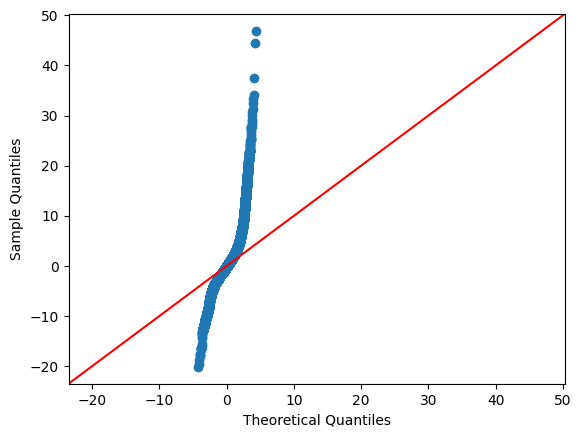

In [64]:
# Menampilkan QQ plot
import statsmodels.api as sm
sm.qqplot(y_test_residuals, line ='45')
plt.show()

Plot QQ menunjukkan bahwa distribusi data tidak sepenuhnya mengikuti distribusi normal. Meskipun distribusi data tidak sepenuhnya normal, masih ada kemungkinan untuk menerapkan metode yang memerlukan asumsi normalitas dalam analisis data.
Dengan plot seperti ini, terdapat kemungkinan bahwa hasil analisis tidak akan optimal dan dapat menyebabkan pelanggaran terhadap asumsi multivariate normality.

**3. No Auto-Corellation**

Asumsi di mana residual atau error dari model regresi tidak menunjukkan pola berurutan dan tidak saling berkorelasi satu sama lain. Artinya, nilai error pada satu waktu tidak dipengaruhi oleh nilai error pada waktu sebelumnya.

In [65]:
durbin_watson(y_test_residuals)

1.9931643178345326

Hasil yang diperoleh sebesar 1.993. Rentang ideal untuk tes ini adalah antara 1.5 hingga 2.5, sehingga nilai ini menunjukkan bahwa no auto korelasi pada model regresi linear ini tidak menjadi masalah. Dengan kata lain, nilai 1.993 berada dalam batas toleransi yang diakui, menandakan bahwa error residual dalam model tidak menunjukkan pola no auto korelasi yang signifikan.

**4. Homoscedasticity**

Homoscedasticity adalah kondisi di mana varians dari kesalahan (error terms) atau residual dalam model regresi tetap konstan di seluruh rentang nilai variabel dependen. Dalam kondisi homoscedasticity, penyebaran residual tidak berubah seiring dengan perubahan nilai prediksi variabel dependen. penyebab dari homoscedasticity adalah
- Outlier
- Nilai Leverage Ekstrim
- Struktur Data yang Berubah

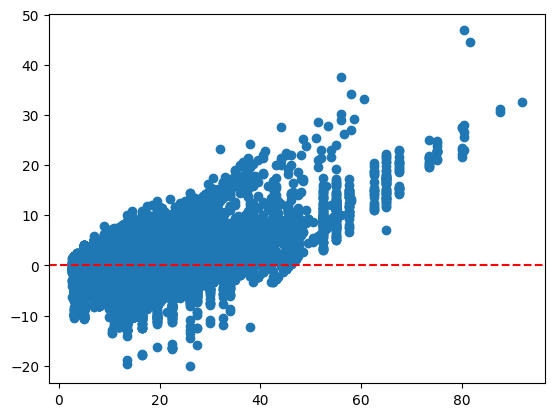

In [66]:
plt.scatter(y_test, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

Kesimpulan

Dari scatter plot antara y_test_residuals dan y_test, terdapat pola linear yang cenderung sedikit naik, menandakan adanya heteroskedastisitas. Heteroskedastisitas adalah kondisi di mana variabilitas kesalahan tidak konstan di seluruh rentang nilai prediktor. Ini mempengaruhi penurunan ketepatan estimasi, meningkatkan ketidakpastian dalam prediksi, dan menurunkan ketepatan uji hipotesis. Heteroskedastisitas dapat mengakibatkan koefisien regresi yang bias dan varians yang tidak akurat, sehingga interpretasi hasil model menjadi kurang dapat diandalkan.

# 9. Kesimpulan

**Tingkat Kehadiran Pola dalam Data**

Analisis harga perjalanan pada platform ride-hailing menunjukkan adanya pola dalam distribusi harga. Pola ini mungkin dipengaruhi oleh berbagai faktor seperti jarak perjalanan, waktu, kondisi cuaca, dan jenis layanan taksi yang dipilih.

**Pengaruh Variabel-variabel Independen**

Variabel-variabel independen seperti jarak perjalanan, waktu, dan cuaca dapat memiliki pengaruh signifikan terhadap harga perjalanan. Analisis regresi memungkinkan kita memahami seberapa kuat hubungan antara variabel-variabel ini dengan harga, serta mengidentifikasi faktor-faktor yang paling berpengaruh.

**Evaluasi Model**

Evaluasi model regresi, menggunakan metrik seperti Mean Absolute Error (MAE) dan R-squared, memberikan gambaran tentang seberapa baik model dapat memprediksi harga perjalanan. MAE yang rendah menunjukkan kesalahan prediksi yang minimal, sedangkan R-squared yang tinggi menunjukkan bahwa model mampu menjelaskan sebagian besar perkiraan dalam harga perjalanan.

**Asumsi Model**

Penting untuk memeriksa asumsi-asumsi dalam model regresi, seperti linearitas, normalitas, dan tidak adanya multikolinearitas. Pelanggaran terhadap asumsi-asumsi ini dapat mempengaruhi keandalan dan interpretasi hasil model, sehingga perlu diperhatikan untuk menjaga validitas analisis.

**Insight Bisnis**

Analisis data dapat memberikan wawasan bisnis yang berharga, seperti pola preferensi pengguna, tren harga sepanjang waktu, dan dampak faktor-faktor eksternal seperti cuaca terhadap permintaan layanan. Wawasan ini dapat membantu dalam mengidentifikasi peluang dan tantangan dalam operasional platform ride-hailing.

**Kesimpulan**

Kesimpulan dari analisis ini dapat menjadi dasar untuk pengambilan keputusan dan perencanaan strategi lebih lanjut terkait harga perjalanan pada platform ride-hailing. Selain itu, hasil analisis dapat digunakan sebagai landasan untuk mengembangkan model yang lebih baik dan lebih akurat di masa depan.

**Saran**

Mungkin dengan mempertimbangkan pemilihan model, kita dapat mencoba menggunakan model yang tidak sensitif terhadap outlier seperti Random Forest, KNN, atau model lainnya. Selain itu, untuk meningkatkan akurasi model, kita bisa menambahkan proses tuning hyperparameter dan menerapkan cross-validation. Ini akan membantu memastikan bahwa model yang kita buat benar-benar memiliki tingkat akurasi yang konsisten.

### Conceptual Problems

**1.Sebutkan dan jelaskan asumsi yang dipakai oleh Linear Regression ! (Gunakan bahasa anda sendiri)**

Linear Regression mengasumsikan bahwa hubungan antara variabel independen (fitur) dan variabel dependen (target) adalah linier. Asumsi ini menyiratkan bahwa setiap perubahan dalam variabel independen secara proporsional mempengaruhi variabel dependen. Selain itu, tidak boleh ada multicollinearity yang signifikan antara fitur-fitur, residual harus memiliki distribusi normal (multivariate normality), tidak ada autokorelasi antara residual, dan variasi dari residual harus konstan (homoscedasticity) sepanjang rentang nilai fitur independen.



**2.Tunjukkan dan tafsirkan arti dari slope dan intercept yang didapat dari model yang telah Anda bangun !**

Setelah membangun model Linear Regression, slope (koefisien) menggambarkan seberapa besar perubahan yang diharapkan dalam nilai target ketika fitur tertentu mengalami kenaikan satu unit, dengan semua fitur lainnya tetap konstan. Slope positif menunjukkan bahwa kenaikan dalam fitur tersebut berkontribusi pada peningkatan nilai target, sedangkan slope negatif menunjukkan sebaliknya.

- Slope (Koefisien):

Setiap koefisien dalam model regresi menjelaskan dampak perubahan satu satuan pada fitur terkait terhadap nilai target (harga), dengan asumsi semua fitur lain tetap konstan. Koefisien positif menandakan bahwa kenaikan dalam fitur tersebut akan meningkatkan nilai target, sementara koefisien negatif menunjukkan sebaliknya. Misalnya, jika koefisien untuk fitur "jarak" adalah 5, setiap kenaikan satu unit dalam jarak akan meningkatkan harga sebesar 5 unit, asalkan fitur lainnya tidak berubah. Meskipun tidak ada informasi langsung tentang nilai koefisien atau pengaruh spesifik pada prediksi 12.47, diasumsikan bahwa setiap koefisien dalam model regresi, termasuk dari semua fitur yang terlibat, berperan dalam hasil akhir prediksi tersebut.

- Intercept:

Intercept adalah titik di mana garis regresi memotong sumbu y (nilai target) ketika semua fitur memiliki nilai nol. Ini memberikan nilai prediksi dasar (harga minimum yang diharapkan) ketika semua fitur memiliki nilai nol. Jika intercept besar dan positif, nilai dasar yang diharapkan untuk harga juga besar; jika negatif, nilai dasar yang diharapkan lebih kecil. Misalnya, intercept 10 berarti harga minimum yang diharapkan adalah 10. Jika prediksi adalah 12.47, ini menunjukkan harga dasar yang diharapkan adalah 12.47, tanpa mempertimbangkan nilai fitur lainnya.

Dalam konteks ini, slope dan intercept digunakan untuk menentukan persamaan garis regresi. Persamaan ini digunakan untuk memprediksi harga berdasarkan nilai fitur-fitur yang diberikan. Dengan memasukkan nilai-nilai fitur ke dalam persamaan garis regresi, kita dapat menghitung prediksi harga yang diinginkan.